In [40]:
from AIAnswerEvaluationSystem.neo4j_Manager import Neo4jManager
from AIAnswerEvaluationSystem.logger import logger
import os


NEO4J_URI = os.getenv("NEO4J_URI", "neo4j://localhost:7687")
NEO4J_USER = os.getenv("NEO4J_USER", "neo4j")
NEO4J_PASSWORD = os.getenv("NEO4J_PASSWORD", "your_secure_password")


neo4j_manager = Neo4jManager.get_instance(NEO4J_URI, NEO4J_USER, NEO4J_PASSWORD)


In [41]:
query = """MATCH (sub:Subject)-[:HAS_QUESTION]->(q:Question)
WHERE sub.name = "Artificial Intelligence"
RETURN q.id, q.text, sub.name
ORDER BY q.id;"""

In [42]:
try:
    with neo4j_manager.get_connection().session() as session:
        # Define the query
        query = """
        MATCH (sub:Subject)-[:HAS_QUESTION]->(q:Question)
        WHERE sub.name = $subject_name
        RETURN q.id, q.text, sub.name
        ORDER BY q.id
        """
        
        # Execute the query with parameters
        results = session.execute_read(
            lambda tx: list(tx.run(query, subject_name="Artificial Intelligence"))
        )
        
        if not results:
            logger.info(" No questions found for the specified subject.")
            print(" No questions found for the specified subject.")
        else:
            print(results)
            
except Exception as e:
    logger.error(f" Database error while fetching questions: {str(e)}")

[<Record q.id='AI001_Q1' q.text='Define Artificial Intelligence' sub.name='Artificial Intelligence'>, <Record q.id='AI001_Q2' q.text='What is Machine Learning?' sub.name='Artificial Intelligence'>, <Record q.id='AI001_Q3' q.text='Explain the difference between Supervised and Unsupervised Learning.' sub.name='Artificial Intelligence'>, <Record q.id='AI001_Q4' q.text='What are Neural Networks?' sub.name='Artificial Intelligence'>, <Record q.id='AI001_Q5' q.text='Describe the Turing Test.' sub.name='Artificial Intelligence'>, <Record q.id='AI001_Q6' q.text='What are the main applications of AI?' sub.name='Artificial Intelligence'>]


In [43]:
try:
    with neo4j_manager.get_connection().session() as session:
        query = """
        MATCH (sub:Subject)-[:HAS_QUESTION]->(q:Question)
        WHERE sub.name = $subject_name
        RETURN q.id, q.text, sub.name
        ORDER BY q.id
        """
        
        results = session.execute_read(
            lambda tx: list(tx.run(query, subject_name="Artificial Intelligence"))
        )
        
        if not results:
            logger.info(" No questions found for the specified subject.")
            print(" No questions found for the specified subject.")
        else:
            # Print results line by line
            print("Question ID | Question Text | Subject")
            print("-" * 80)
            for record in results:
                print(f"{record['q.id']} | {record['q.text']} | {record['sub.name']}")
            
except Exception as e:
    logger.error(f" Database error while fetching questions: {str(e)}")

Question ID | Question Text | Subject
--------------------------------------------------------------------------------
AI001_Q1 | Define Artificial Intelligence | Artificial Intelligence
AI001_Q2 | What is Machine Learning? | Artificial Intelligence
AI001_Q3 | Explain the difference between Supervised and Unsupervised Learning. | Artificial Intelligence
AI001_Q4 | What are Neural Networks? | Artificial Intelligence
AI001_Q5 | Describe the Turing Test. | Artificial Intelligence
AI001_Q6 | What are the main applications of AI? | Artificial Intelligence


In [44]:
try:
    with neo4j_manager.get_connection().session() as session:
        query = """MATCH (sub:Subject)-[:HAS_QUESTION]->(q:Question)-[:HAS_ANSWER]->(a:Answer)
        WHERE sub.name = "Artificial Intelligence"
        RETURN sub.name, q.id, q.text, a.text AS answer_text
        ORDER BY q.id;"""

        results = session.execute_read(
            lambda tx: list(tx.run(query, subject_name="Artificial Intelligence"))
        )
        if not results:
            logger.info(" No answers found for the specified subject.")
            print(" No answers found for the specified subject.")

        else:
            print("Subject | Question ID | Question Text | Answer Text")
            print("-" * 80)
            for record in results:
                print(f"{record['sub.name']} | {record['q.id']} | {record['q.text']} | {record['answer_text']}")

except Exception as e:
    logger.error(f" Database error while fetching answers: {str(e)}")

Subject | Question ID | Question Text | Answer Text
--------------------------------------------------------------------------------
Artificial Intelligence | AI001_Q1 | Define Artificial Intelligence | AI simulates human intelligence in machines


In [47]:
try:
    with neo4j_manager.get_connection().session() as session:
        query = """MATCH (s:Student {roll_no: "2115500007"})
                    MATCH (s)-[:SUBMITTED]->(e:ExamSubmission)
                    MATCH (e)-[:FOR_SUBJECT]->(sub:Subject)
                    MATCH (e)-[:HAS_ANSWER]->(a:Answer)
                    WHERE sub.name = "Artificial Intelligence"
                    RETURN 
                        sub.name as subject,
                        a.id as answer_id,
                        a.text as student_answer
                    ORDER BY answer_id"""

        results = session.execute_read(
            lambda tx: list(tx.run(query, subject_name=" Chemistry"))
        )
        if not results:
            logger.info(" No answers found for the specified subject.")
            print(" No answers found for the specified subject.")

        else:
            print("Subject | Answer ID | Answer Text | ")
            print("-" * 80)
            for record in results:
                print(f"{record['subject']} | {record['answer_id']} | {record['student_answer']} ")

except Exception as e:
    logger.error(f" Database error while fetching answers: {str(e)}")

 No answers found for the specified subject.


In [39]:
try:
    with neo4j_manager.get_connection().session() as session:
        query = """// Compare student answers with correct answers
                MATCH (s:Student {roll_no: "2115500007"})
                MATCH (s)-[:SUBMITTED]->(e:ExamSubmission)-[:FOR_SUBJECT]->(sub:Subject {name: "Artificial Intelligence"})
                MATCH (e)-[:HAS_ANSWER]->(sa:Answer)-[:FOR_QUESTION]->(q:Question)
                WITH s, q, sa
                MATCH (sub:Subject)-[:HAS_QUESTION]->(q)-[:HAS_ANSWER]->(ca:Answer)
                WHERE sub.name = "Artificial Intelligence"
                RETURN 
                    s.roll_no as student_roll,
                    s.name as student_name,
                    q.id as question_id,
                    q.text as question_text,
                    sa.text as student_answer,
                    ca.text as correct_answer
                ORDER BY q.id"""
        
        results = session.execute_read(
            lambda tx: list(tx.run(query))
        )

        if not results:
            logger.info("No answers found for the specified subject.")
            print("No answers found for the specified subject.")

        else:
            print("Student Roll No | Student Name| Question ID | Question Text | Student Answer | Correct Answer")
            print("-" * 80)
            for record in results:
                print(f"{record['student_roll']} | {record['student_name']} | {record['question_id']} | {record['question_text']} | {record['student_answer']} | {record['correct_answer']}")
except Exception as e:
    logger.error(f" Database error while fetching answers: {str(e)}")

NameError: name 'logger' is not defined

In [13]:
from typing import Optional
from langchain_ollama import OllamaLLM
from AIAnswerEvaluationSystem.logger import logging

class LLMSS:
    def __init__(self, llm: Optional[OllamaLLM] = None):
        """
        Initialize the LLMSS with an optional LLM.
        
        :param llm: Optional pre-configured OllamaLLM instance
        """
        try:
            self.llm = llm if llm is not None else OllamaLLM(model="llama3.2:latest")
            logging.info("LLMSS initialized successfully")
        except Exception as e:
            logging.error(f"Failed to initialize LLMSS: {e}")
            raise




In [ ]:
from typing import Optional, Dict, List, Union, Tuple
from langchain_ollama import OllamaLLM
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from AIAnswerEvaluationSystem.logger import logging
import json
import re

class LLMSS:
    def __init__(self, llm: Optional[OllamaLLM] = None):
        """
        Initialize the LLMSS with an optional LLM.
        
        :param llm: Optional pre-configured OllamaLLM instance
        """
        try:
            self.llm = llm if llm is not None else OllamaLLM(model="llama3.2:latest")
            logging.info("LLMSS initialized successfully")
        except Exception as e:
            logging.error(f"Failed to initialize LLMSS: {e}")
            raise


class GradingSystem:
    """Handles converting evaluation scores to letter grades and determining pass/fail status."""
    
    # Grade scale mapping percentage ranges to letter grades
    GRADE_SCALE = {
        (90, 100): 'A',
        (80, 89.99): 'B',
        (70, 79.99): 'C',
        (60, 69.99): 'D',
        (0, 59.99): 'F'
    }
    
    # Minimum passing grade threshold (as a percentage)
    PASSING_THRESHOLD = 60.0
    
    @classmethod
    def calculate_percentage(cls, score: int, max_score: int) -> float:
        """
        Calculate percentage score.
        
        :param score: Achieved score
        :param max_score: Maximum possible score
        :return: Percentage as float
        """
        if max_score <= 0:
            logging.error("Invalid max_score (must be > 0)")
            return 0.0
        
        return (score / max_score) * 100
    
    @classmethod
    def determine_letter_grade(cls, percentage: float) -> str:
        """
        Convert percentage to letter grade.
        
        :param percentage: Score as percentage
        :return: Letter grade (A-F)
        """
        for score_range, grade in cls.GRADE_SCALE.items():
            if score_range[0] <= percentage <= score_range[1]:
                return grade
        
        logging.error(f"Unable to determine grade for percentage: {percentage}")
        return 'N/A'
    
    @classmethod
    def is_passing(cls, percentage: float) -> bool:
        """
        Determine if the score is passing.
        
        :param percentage: Score as percentage
        :return: True if passing, False otherwise
        """
        return percentage >= cls.PASSING_THRESHOLD
    
    @classmethod
    def grade_evaluation(cls, evaluation: Dict, max_score: int = 40) -> Dict:
        """
        Add grading information to an evaluation result.
        
        :param evaluation: Evaluation dictionary with scores
        :param max_score: Maximum possible score (default: 40 based on our scoring criteria)
        :return: Evaluation with added grading information
        """
        try:
            total_score = evaluation.get('total_score', 0)
            percentage = cls.calculate_percentage(total_score, max_score)
            letter_grade = cls.determine_letter_grade(percentage)
            passing = cls.is_passing(percentage)
            
            # Add grading information to the evaluation
            evaluation.update({
                'percentage': round(percentage, 2),
                'letter_grade': letter_grade,
                'passing': passing
            })
            
            return evaluation
        except Exception as e:
            logging.error(f"Error in grading evaluation: {e}")
            # Return original evaluation with error information
            evaluation.update({
                'grading_error': str(e)
            })
            return evaluation


class StudentAnswerEvaluator:
    def __init__(self, llmss: LLMSS):
        """
        Initialize the StudentAnswerEvaluator with an LLMSS instance.
        
        :param llmss: An initialized LLMSS instance
        """
        self.llmss = llmss
        self._setup_evaluation_chain()
        logging.info("StudentAnswerEvaluator initialized successfully")
    
    def _setup_evaluation_chain(self):
        """Set up the evaluation chain with appropriate prompt templates."""
        evaluation_template = """
        You are an expert educator tasked with evaluating student answers.
        
        Question: {question}
        
        Correct Answer: {correct_answer}
        
        Student Answer: {student_answer}
        
        Question Mark Value: {max_marks}
        
        Evaluate the student's answer based on the following criteria:
        1. Correctness (0-10): How factually correct is the answer?
        2. Completeness (0-10): Does the answer cover all required elements?
        3. Clarity (0-10): How clear and well-articulated is the answer?
        4. Critical Thinking (0-10): Does the answer demonstrate understanding and critical thinking?
        
        Provide a total score out of 40, which will be converted to a score out of the maximum marks ({max_marks}).
        
        Also provide:
        - Specific feedback on what was good
        - Specific feedback on what could be improved
        - Suggested correct answer or improvements
        
        Your response MUST be in valid JSON format like this:
        {{
            "correctness_score": 8,
            "completeness_score": 7,
            "clarity_score": 9,
            "critical_thinking_score": 6,
            "total_score": 30,
            "marks_awarded": 15.0,
            "positive_feedback": "The student demonstrated good understanding of...",
            "areas_for_improvement": "The student could improve by...",
            "suggested_improvements": "A more complete answer would include..."
        }}
        
        Do not include any text outside the JSON object. The JSON must be properly formatted with no trailing commas.
        """
        
        self.evaluation_prompt = PromptTemplate(
            input_variables=["question", "correct_answer", "student_answer", "max_marks"],
            template=evaluation_template,
        )
        
        self.evaluation_chain = LLMChain(
            llm=self.llmss.llm,
            prompt=self.evaluation_prompt,
            verbose=False
        )
    
    def _extract_json(self, text: str) -> Dict:
        """
        Extract a valid JSON object from text, with improved error handling.
        
        :param text: Text potentially containing JSON
        :return: Extracted JSON as dictionary or error dict
        """
        # First try direct parsing
        text = text.strip()
        try:
            return json.loads(text)
        except json.JSONDecodeError:
            pass  # Continue to other extraction methods
        
        # Look for JSON with regex - find content between curly braces
        try:
            json_match = re.search(r'({[\s\S]*?})(?:\s*$|\n)', text)
            if json_match:
                json_str = json_match.group(1)
                return json.loads(json_str)
        except (json.JSONDecodeError, AttributeError):
            pass
        
        # Try to fix common JSON formatting issues
        try:
            # Replace single quotes with double quotes
            fixed_text = text.replace("'", '"')
            return json.loads(fixed_text)
        except json.JSONDecodeError:
            pass
        
        # If all extraction methods fail, create a default evaluation
        logging.error(f"All JSON extraction methods failed. Raw text: {text[:100]}...")
        return {
            "error": "Failed to parse result as JSON",
            "raw_output": text
        }
    
    def evaluate_answer(self, question: str, correct_answer: str, student_answer: str, max_marks: float = 10.0) -> Dict:
        """
        Evaluate a student's answer against the correct answer for a given question.
        
        :param question: The question being answered
        :param correct_answer: The correct or model answer
        :param student_answer: The student's submitted answer
        :param max_marks: Maximum marks for this question
        :return: Dictionary containing evaluation scores and feedback
        """
        try:
            logging.info(f"Evaluating answer for question: {question[:50]}...")
            
            # Create a default evaluation with required fields
            default_evaluation = {
                "correctness_score": 0,
                "completeness_score": 0,
                "clarity_score": 0,
                "critical_thinking_score": 0,
                "total_score": 0,
                "marks_awarded": 0.0,
                "positive_feedback": "",
                "areas_for_improvement": "",
                "suggested_improvements": ""
            }
            
            result = self.evaluation_chain.invoke({
                "question": question,
                "correct_answer": correct_answer,
                "student_answer": student_answer,
                "max_marks": max_marks
            })
            
            # Extract JSON from the result with improved handling
            evaluation = self._extract_json(result['text'])
            
            # If there was an error in extraction, return the error info
            if "error" in evaluation:
                return evaluation
            
            # Update default evaluation with extracted values (ensures all keys exist)
            default_evaluation.update(evaluation)
            
            # Calculate marks awarded if not already in the result
            if 'marks_awarded' not in evaluation:
                default_evaluation['marks_awarded'] = (default_evaluation['total_score'] / 40) * max_marks
            
            # Apply grading to the evaluation
            graded_evaluation = GradingSystem.grade_evaluation(default_evaluation)
            
            logging.info(f"Evaluation complete. Total score: {graded_evaluation.get('total_score', 'N/A')}, Grade: {graded_evaluation.get('letter_grade', 'N/A')}")
            return graded_evaluation
        except Exception as e:
            logging.error(f"Error during answer evaluation: {e}")
            return {
                "error": f"Evaluation failed: {str(e)}",
                "correctness_score": 0,
                "completeness_score": 0,
                "clarity_score": 0,
                "critical_thinking_score": 0,
                "total_score": 0,
                "marks_awarded": 0.0,
                "positive_feedback": "Unable to evaluate.",
                "areas_for_improvement": "Unable to evaluate.",
                "suggested_improvements": "Unable to evaluate."
            }
    
    def batch_evaluate(self, evaluations: List[Dict]) -> List[Dict]:
        """
        Batch evaluate multiple student answers.
        
        :param evaluations: List of dictionaries, each containing 'question', 'correct_answer', 'student_answer', and optional 'max_marks'
        :return: List of evaluation results
        """
        results = []
        for item in evaluations:
            try:
                max_marks = item.get('max_marks', 10.0)
                result = self.evaluate_answer(
                    item['question'], 
                    item['correct_answer'], 
                    item['student_answer'],
                    max_marks
                )
                results.append({
                    "question": item['question'],
                    "student_id": item.get('student_id', 'unknown'),
                    "max_marks": max_marks,
                    "evaluation": result
                })
            except Exception as e:
                logging.error(f"Error evaluating item: {e}")
                results.append({
                    "question": item['question'],
                    "student_id": item.get('student_id', 'unknown'),
                    "max_marks": item.get('max_marks', 10.0),
                    "evaluation": {"error": str(e)}
                })
        
        return results
    
    def generate_corrected_answer(self, question: str, student_answer: str) -> str:
        """
        Generate a corrected version of the student's answer.
        
        :param question: The question being answered
        :param student_answer: The student's submitted answer
        :return: A corrected version of the answer
        """
        correction_template = """
        Question: {question}
        
        Student Answer: {student_answer}
        
        Please provide a corrected and improved version of this answer that addresses any errors, 
        misconceptions, or omissions while maintaining the student's original approach where valid.
        The corrected answer should be comprehensive, accurate, and well-structured.
        """
        
        correction_prompt = PromptTemplate(
            input_variables=["question", "student_answer"],
            template=correction_template,
        )
        
        correction_chain = LLMChain(
            llm=self.llmss.llm,
            prompt=correction_prompt,
            verbose=False
        )
        
        try:
            result = correction_chain.invoke({
                "question": question,
                "student_answer": student_answer
            })
            
            return result['text']
        except Exception as e:
            logging.error(f"Error generating corrected answer: {e}")
            return f"Error generating correction: {str(e)}"


class AnswerEvaluationSystem:
    def __init__(self, llm: Optional[OllamaLLM] = None):
        """
        Initialize the complete Answer Evaluation System.
        
        :param llm: Optional pre-configured LLM
        """
        self.llmss = LLMSS(llm)
        self.evaluator = StudentAnswerEvaluator(self.llmss)
        logging.info("AnswerEvaluationSystem initialized successfully")
    
    def evaluate_submission(self, 
                           question: str, 
                           correct_answer: str, 
                           student_answer: str, 
                           max_marks: float = 10.0,
                           generate_correction: bool = False) -> Dict:
        """
        Evaluate a student submission and optionally generate a correction.
        
        :param question: The question being answered
        :param correct_answer: The correct or model answer
        :param student_answer: The student's submitted answer
        :param max_marks: Maximum marks for this question
        :param generate_correction: Whether to generate a corrected answer
        :return: Dictionary with evaluation and optional correction
        """
        evaluation = self.evaluator.evaluate_answer(question, correct_answer, student_answer, max_marks)
        
        result = {
            "evaluation": evaluation
        }
        
        if generate_correction:
            correction = self.evaluator.generate_corrected_answer(question, student_answer)
            result["corrected_answer"] = correction
        
        return result
    
    def process_submissions(self, 
                           submissions: List[Dict], 
                           generate_corrections: bool = False) -> Dict[str, List[Dict]]:
        """
        Process multiple student submissions.
        
        :param submissions: List of submission dictionaries
        :param generate_corrections: Whether to generate corrections
        :return: Dictionary with processed results
        """
        results = []
        
        for submission in submissions:
            try:
                max_marks = submission.get('max_marks', 10.0)
                result = self.evaluate_submission(
                    submission['question'],
                    submission['correct_answer'],
                    submission['student_answer'],
                    max_marks,
                    generate_corrections
                )
                
                results.append({
                    "student_id": submission.get('student_id', 'unknown'),
                    "question_id": submission.get('question_id', 'unknown'),
                    "max_marks": max_marks,
                    "result": result
                })
            except Exception as e:
                logging.error(f"Error processing submission: {e}")
                results.append({
                    "student_id": submission.get('student_id', 'unknown'),
                    "question_id": submission.get('question_id', 'unknown'),
                    "max_marks": submission.get('max_marks', 10.0),
                    "error": str(e)
                })
        
        return {
            "processed_count": len(results),
            "results": results
        }
    
    def generate_grade_report(self, student_results: List[Dict]) -> Dict:
        """
        Generate a comprehensive grade report from multiple evaluations for a student.
        
        :param student_results: List of evaluation results for a student
        :return: Dictionary containing grade report
        """
        if not student_results:
            return {
                "error": "No results provided for grade report generation"
            }
        
        try:
            # Extract student ID from first result
            student_id = student_results[0].get("student_id", "unknown")
            
            total_marks_earned = 0
            total_marks_possible = 0
            evaluations = []
            
            # Process each result
            for result in student_results:
                if "error" in result:
                    evaluations.append({
                        "question_id": result.get("question_id", "unknown"),
                        "error": result["error"]
                    })
                    continue
                
                max_marks = result.get("max_marks", 10.0)
                evaluation = result.get("result", {}).get("evaluation", {})
                
                marks_awarded = evaluation.get("marks_awarded", 0)
                total_marks_earned += marks_awarded
                total_marks_possible += max_marks
                
                evaluations.append({
                    "question_id": result.get("question_id", "unknown"),
                    "max_marks": max_marks,
                    "marks_awarded": marks_awarded,
                    "letter_grade": evaluation.get("letter_grade", "N/A"),
                    "feedback": {
                        "positive": evaluation.get("positive_feedback", ""),
                        "improvement": evaluation.get("areas_for_improvement", "")
                    }
                })
            
            # Calculate overall statistics
            overall_percentage = (total_marks_earned / total_marks_possible * 100) if total_marks_possible > 0 else 0
            overall_letter_grade = GradingSystem.determine_letter_grade(overall_percentage)
            passing = GradingSystem.is_passing(overall_percentage)
            
            return {
                "student_id": student_id,
                "overall_results": {
                    "total_marks_earned": round(total_marks_earned, 2),
                    "total_marks_possible": total_marks_possible,
                    "percentage": round(overall_percentage, 2),
                    "letter_grade": overall_letter_grade,
                    "passing": passing
                },
                "question_evaluations": evaluations
            }
        except Exception as e:
            logging.error(f"Error generating grade report: {e}")
            return {
                "student_id": student_id if 'student_id' in locals() else "unknown",
                "error": f"Failed to generate grade report: {str(e)}"
            }


# Example usage
if __name__ == "__main__":
    # Initialize the system
    evaluation_system = AnswerEvaluationSystem()
    
    # Example data
    question = "Explain the concept of photosynthesis and its importance for life on Earth."
    correct_answer = """
    Photosynthesis is the process by which green plants, algae, and some bacteria convert light energy, 
    usually from the sun, into chemical energy in the form of glucose or other sugars. The process primarily 
    takes place in the chloroplasts of plant cells, specifically using the green pigment chlorophyll.
    
    The basic equation for photosynthesis is: 
    6CO₂ + 6H₂O + light energy → C₆H₁₂O₆ (glucose) + 6O₂
    
    Photosynthesis is crucial for life on Earth for several reasons:
    1. It produces oxygen, which most organisms need for respiration
    2. It converts inorganic carbon (CO₂) to organic compounds, forming the base of food chains
    3. It helps regulate atmospheric CO₂ levels, playing a role in climate regulation
    4. It provides the energy that drives virtually all ecosystems
    """
    
    student_answer = """
    Photosynthesis is how plants make food using sunlight. They take in carbon dioxide and water and 
    produce oxygen and glucose. This is important because it gives us oxygen to breathe and food to eat.
    Plants have chlorophyll which makes them green and helps them capture sunlight.
    """
    
    # Evaluate a single submission with marks
    result = evaluation_system.evaluate_submission(
        question, 
        correct_answer, 
        student_answer,
        max_marks=20.0,  # This question is worth 20 marks
        generate_correction=True
    )
    
    print(json.dumps(result, indent=2))
    
    # Process multiple submissions with different mark values
    submissions = [
        {
            "student_id": "S12345",
            "question_id": "Q1",
            "question": question,
            "correct_answer": correct_answer,
            "student_answer": student_answer,
            "max_marks": 20.0
        },
        {
            "student_id": "S12345",
            "question_id": "Q2",
            "question": "Describe the process of cellular respiration.",
            "correct_answer": "Cellular respiration is the process by which cells convert glucose into energy in the form of ATP...",
            "student_answer": "Cellular respiration is how cells make energy from glucose. They use oxygen and produce CO2.",
            "max_marks": 15.0
        },
        {
            "student_id": "S67890",
            "question_id": "Q1",
            "question": question,
            "correct_answer": correct_answer,
            "student_answer": "Photosynthesis is the process of plants converting sunlight to energy.",
            "max_marks": 20.0
        }
    ]
    
    batch_results = evaluation_system.process_submissions(submissions, generate_corrections=True)
    print(f"Processed {batch_results['processed_count']} submissions")
    
    # Generate a grade report for student S12345
    student_results = [result for result in batch_results["results"] if result.get("student_id") == "S12345"]
    grade_report = evaluation_system.generate_grade_report(student_results)
    print(json.dumps(grade_report, indent=2))

INFO:root:LLMSS initialized successfully
INFO:root:StudentAnswerEvaluator initialized successfully
INFO:root:AnswerEvaluationSystem initialized successfully
INFO:root:Evaluating answer for question: Explain the concept of photosynthesis and its impo...
INFO:httpx:HTTP Request: POST http://127.0.0.1:11434/api/generate "HTTP/1.1 200 OK"
INFO:root:Evaluation complete. Total score: 23, Grade: F
INFO:httpx:HTTP Request: POST http://127.0.0.1:11434/api/generate "HTTP/1.1 200 OK"
INFO:root:Evaluating answer for question: Explain the concept of photosynthesis and its impo...


{
  "evaluation": {
    "correctness_score": 6,
    "completeness_score": 4,
    "clarity_score": 8,
    "critical_thinking_score": 5,
    "total_score": 23,
    "marks_awarded": 11.5,
    "positive_feedback": "The student demonstrated good understanding of the basic concept of photosynthesis, including its role in producing oxygen and glucose.",
    "areas_for_improvement": "The student could improve by providing more detail about the process, explaining the importance of chlorophyll, and discussing other critical aspects such as the role of CO\u2082 and O\u2082 in the equation.",
    "suggested_improvements": "A more complete answer would include a clear explanation of the photosynthesis equation and its significance in regulating atmospheric CO\u2082 levels.",
    "percentage": 57.5,
    "letter_grade": "F",
    "passing": false
  },
  "corrected_answer": "Here's a revised version of the student's answer:\n\nPhotosynthesis is the process by which plants, algae, and some bacteria con

INFO:httpx:HTTP Request: POST http://127.0.0.1:11434/api/generate "HTTP/1.1 200 OK"
INFO:root:Evaluation complete. Total score: 20, Grade: F
INFO:httpx:HTTP Request: POST http://127.0.0.1:11434/api/generate "HTTP/1.1 200 OK"
INFO:root:Evaluating answer for question: Describe the process of cellular respiration....
INFO:httpx:HTTP Request: POST http://127.0.0.1:11434/api/generate "HTTP/1.1 200 OK"
INFO:root:Evaluation complete. Total score: 22, Grade: F
INFO:httpx:HTTP Request: POST http://127.0.0.1:11434/api/generate "HTTP/1.1 200 OK"
INFO:root:Evaluating answer for question: Explain the concept of photosynthesis and its impo...
INFO:httpx:HTTP Request: POST http://127.0.0.1:11434/api/generate "HTTP/1.1 200 OK"
INFO:root:Evaluation complete. Total score: 28, Grade: C
INFO:httpx:HTTP Request: POST http://127.0.0.1:11434/api/generate "HTTP/1.1 200 OK"


Processed 3 submissions
{
  "student_id": "S12345",
  "overall_results": {
    "total_marks_earned": 21.0,
    "total_marks_possible": 35.0,
    "percentage": 60.0,
    "letter_grade": "D",
    "passing": true
  },
  "question_evaluations": [
    {
      "question_id": "Q1",
      "max_marks": 20.0,
      "marks_awarded": 10.0,
      "letter_grade": "F",
      "feedback": {
        "positive": "The student demonstrated some good understanding of the basic process and its importance for human life.",
        "improvement": "The student could improve by providing more detail about the equation, explaining the role of chlorophyll in photosynthesis, and discussing other important reasons why photosynthesis is crucial for life on Earth."
      }
    },
    {
      "question_id": "Q2",
      "max_marks": 15.0,
      "marks_awarded": 11.0,
      "letter_grade": "F",
      "feedback": {
        "positive": "The student demonstrated a good understanding of the basic process of cellular respirat

In [12]:
from typing import Optional, Dict, List, Union, Tuple
from langchain_ollama import OllamaLLM
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from AIAnswerEvaluationSystem.logger import logging
import json
import re
from neo4j import GraphDatabase

class Neo4jManager:
    """Manages connections and queries to Neo4j database"""
    
    def __init__(self, uri: str, username: str, password: str):
        """
        Initialize the Neo4j connection manager.
        
        :param uri: Neo4j database URI
        :param username: Neo4j username
        :param password: Neo4j password
        """
        try:
            self.driver = GraphDatabase.driver(uri, auth=(username, password))
            logging.info("Connected to Neo4j database successfully")
        except Exception as e:
            logging.error(f"Failed to connect to Neo4j: {e}")
            raise
    
    def close(self):
        """Close the Neo4j connection"""
        if hasattr(self, 'driver'):
            self.driver.close()
    
    def fetch_student_answers_with_correct_answers(self, student_roll_no: str, subject_name: str) -> List[Dict]:
        """
        Fetch student answers with corresponding correct answers from Neo4j.
        
        :param student_roll_no: Student's roll number
        :param subject_name: Subject name
        :return: List of dictionaries containing questions, student answers, and correct answers
        """
        query = """
        MATCH (s:Student {roll_no: $roll_no})
        MATCH (s)-[:SUBMITTED]->(e:ExamSubmission)-[:FOR_SUBJECT]->(sub:Subject {name: $subject_name})
        MATCH (e)-[:HAS_ANSWER]->(sa:Answer)-[:FOR_QUESTION]->(q:Question)
        WITH s, q, sa
        MATCH (sub:Subject)-[:HAS_QUESTION]->(q)-[:HAS_ANSWER]->(ca:Answer)
        WHERE sub.name = $subject_name
        RETURN 
            s.roll_no as student_roll,
            s.name as student_name,
            q.id as question_id,
            q.text as question_text,
            sa.text as student_answer,
            ca.text as correct_answer
        ORDER BY q.id
        """
        
        try:
            with self.driver.session() as session:
                result = session.run(query, roll_no=student_roll_no, subject_name=subject_name)
                records = [record.data() for record in result]
                
                if not records:
                    logging.warning(f"No answers found for student {student_roll_no} in subject {subject_name}")
                print(records)
                return records
        except Exception as e:
            logging.error(f"Error fetching answers from Neo4j: {e}")
            raise

class LLMSS:
    def __init__(self, llm: Optional[OllamaLLM] = None):
        """
        Initialize the LLMSS with an optional LLM.
        
        :param llm: Optional pre-configured OllamaLLM instance
        """
        try:
            self.llm = llm if llm is not None else OllamaLLM(model="llama3.2:latest")
            logging.info("LLMSS initialized successfully")
        except Exception as e:
            logging.error(f"Failed to initialize LLMSS: {e}")
            raise


class GradingSystem:
    """Handles converting evaluation scores to letter grades and determining pass/fail status."""
    
    # Grade scale mapping percentage ranges to letter grades
    GRADE_SCALE = {
        (90, 100): 'A',
        (80, 89.99): 'B',
        (70, 79.99): 'C',
        (60, 69.99): 'D',
        (0, 59.99): 'F'
    }
    
    # Minimum passing grade threshold (as a percentage)
    PASSING_THRESHOLD = 60.0
    
    @classmethod
    def calculate_percentage(cls, score: int, max_score: int) -> float:
        """
        Calculate percentage score.
        
        :param score: Achieved score
        :param max_score: Maximum possible score
        :return: Percentage as float
        """
        if max_score <= 0:
            logging.error("Invalid max_score (must be > 0)")
            return 0.0
        
        return (score / max_score) * 100
    
    @classmethod
    def determine_letter_grade(cls, percentage: float) -> str:
        """
        Convert percentage to letter grade.
        
        :param percentage: Score as percentage
        :return: Letter grade (A-F)
        """
        for score_range, grade in cls.GRADE_SCALE.items():
            if score_range[0] <= percentage <= score_range[1]:
                return grade
        
        logging.error(f"Unable to determine grade for percentage: {percentage}")
        return 'N/A'
    
    @classmethod
    def is_passing(cls, percentage: float) -> bool:
        """
        Determine if the score is passing.
        
        :param percentage: Score as percentage
        :return: True if passing, False otherwise
        """
        return percentage >= cls.PASSING_THRESHOLD
    
    @classmethod
    def grade_evaluation(cls, evaluation: Dict, max_score: int = 40) -> Dict:
        """
        Add grading information to an evaluation result.
        
        :param evaluation: Evaluation dictionary with scores
        :param max_score: Maximum possible score (default: 40 based on our scoring criteria)
        :return: Evaluation with added grading information
        """
        try:
            total_score = evaluation.get('total_score', 0)
            percentage = cls.calculate_percentage(total_score, max_score)
            letter_grade = cls.determine_letter_grade(percentage)
            passing = cls.is_passing(percentage)
            
            # Add grading information to the evaluation
            evaluation.update({
                'percentage': round(percentage, 2),
                'letter_grade': letter_grade,
                'passing': passing
            })
            
            return evaluation
        except Exception as e:
            logging.error(f"Error in grading evaluation: {e}")
            # Return original evaluation with error information
            evaluation.update({
                'grading_error': str(e)
            })
            return evaluation


class StudentAnswerEvaluator:
    def __init__(self, llmss: LLMSS):
        """
        Initialize the StudentAnswerEvaluator with an LLMSS instance.
        
        :param llmss: An initialized LLMSS instance
        """
        self.llmss = llmss
        self._setup_evaluation_chain()
        logging.info("StudentAnswerEvaluator initialized successfully")
    
    def _setup_evaluation_chain(self):
        """Set up the evaluation chain with appropriate prompt templates."""
        evaluation_template = """
        You are an expert educator tasked with evaluating student answers.
        
        Question: {question}
        
        Correct Answer: {correct_answer}
        
        Student Answer: {student_answer}
        
        Question Mark Value: {max_marks}
        
        Evaluate the student's answer based on the following criteria:
        1. Correctness (0-10): How factually correct is the answer?
        2. Completeness (0-10): Does the answer cover all required elements?
        3. Clarity (0-10): How clear and well-articulated is the answer?
        4. Critical Thinking (0-10): Does the answer demonstrate understanding and critical thinking?
        
        Provide a total score out of 40, which will be converted to a score out of the maximum marks ({max_marks}).
        
        Also provide:
        - Specific feedback on what was good
        - Specific feedback on what could be improved
        - Suggested correct answer or improvements
        
        Your response MUST be in valid JSON format like this:
        {{
            "correctness_score": 8,
            "completeness_score": 7,
            "clarity_score": 9,
            "critical_thinking_score": 6,
            "total_score": 30,
            "marks_awarded": 15.0,
            "positive_feedback": "The student demonstrated good understanding of...",
            "areas_for_improvement": "The student could improve by...",
            "suggested_improvements": "A more complete answer would include..."
        }}
        
        Do not include any text outside the JSON object. The JSON must be properly formatted with no trailing commas.
        """
        
        self.evaluation_prompt = PromptTemplate(
            input_variables=["question", "correct_answer", "student_answer", "max_marks"],
            template=evaluation_template,
        )
        
        self.evaluation_chain = LLMChain(
            llm=self.llmss.llm,
            prompt=self.evaluation_prompt,
            verbose=False
        )
    
    def _extract_json(self, text: str) -> Dict:
        """
        Extract a valid JSON object from text, with improved error handling.
        
        :param text: Text potentially containing JSON
        :return: Extracted JSON as dictionary or error dict
        """
        # First try direct parsing
        text = text.strip()
        try:
            return json.loads(text)
        except json.JSONDecodeError:
            pass  # Continue to other extraction methods
        
        # Look for JSON with regex - find content between curly braces
        try:
            json_match = re.search(r'({[\s\S]*?})(?:\s*$|\n)', text)
            if json_match:
                json_str = json_match.group(1)
                return json.loads(json_str)
        except (json.JSONDecodeError, AttributeError):
            pass
        
        # Try to fix common JSON formatting issues
        try:
            # Replace single quotes with double quotes
            fixed_text = text.replace("'", '"')
            return json.loads(fixed_text)
        except json.JSONDecodeError:
            pass
        
        # If all extraction methods fail, create a default evaluation
        logging.error(f"All JSON extraction methods failed. Raw text: {text[:100]}...")
        return {
            "error": "Failed to parse result as JSON",
            "raw_output": text
        }
    
    def evaluate_answer(self, question: str, correct_answer: str, student_answer: str, max_marks: float = 10.0) -> Dict:
        """
        Evaluate a student's answer against the correct answer for a given question.
        
        :param question: The question being answered
        :param correct_answer: The correct or model answer
        :param student_answer: The student's submitted answer
        :param max_marks: Maximum marks for this question
        :return: Dictionary containing evaluation scores and feedback
        """
        try:
            logging.info(f"Evaluating answer for question: {question[:50]}...")
            
            # Create a default evaluation with required fields
            default_evaluation = {
                "correctness_score": 0,
                "completeness_score": 0,
                "clarity_score": 0,
                "critical_thinking_score": 0,
                "total_score": 0,
                "marks_awarded": 0.0,
                "positive_feedback": "",
                "areas_for_improvement": "",
                "suggested_improvements": ""
            }
            
            result = self.evaluation_chain.invoke({
                "question": question,
                "correct_answer": correct_answer,
                "student_answer": student_answer,
                "max_marks": max_marks
            })
            
            # Extract JSON from the result with improved handling
            evaluation = self._extract_json(result['text'])
            
            # If there was an error in extraction, return the error info
            if "error" in evaluation:
                return evaluation
            
            # Update default evaluation with extracted values (ensures all keys exist)
            default_evaluation.update(evaluation)
            
            # Calculate marks awarded if not already in the result
            if 'marks_awarded' not in evaluation:
                default_evaluation['marks_awarded'] = (default_evaluation['total_score'] / 40) * max_marks
            
            # Apply grading to the evaluation
            graded_evaluation = GradingSystem.grade_evaluation(default_evaluation)
            
            logging.info(f"Evaluation complete. Total score: {graded_evaluation.get('total_score', 'N/A')}, Grade: {graded_evaluation.get('letter_grade', 'N/A')}")
            return graded_evaluation
        except Exception as e:
            logging.error(f"Error during answer evaluation: {e}")
            return {
                "error": f"Evaluation failed: {str(e)}",
                "correctness_score": 0,
                "completeness_score": 0,
                "clarity_score": 0,
                "critical_thinking_score": 0,
                "total_score": 0,
                "marks_awarded": 0.0,
                "positive_feedback": "Unable to evaluate.",
                "areas_for_improvement": "Unable to evaluate.",
                "suggested_improvements": "Unable to evaluate."
            }
    
    def batch_evaluate(self, evaluations: List[Dict]) -> List[Dict]:
        """
        Batch evaluate multiple student answers.
        
        :param evaluations: List of dictionaries, each containing 'question', 'correct_answer', 'student_answer', and optional 'max_marks'
        :return: List of evaluation results
        """
        results = []
        for item in evaluations:
            try:
                max_marks = item.get('max_marks', 10.0)
                result = self.evaluate_answer(
                    item['question'], 
                    item['correct_answer'], 
                    item['student_answer'],
                    max_marks
                )
                results.append({
                    "question": item['question'],
                    "student_id": item.get('student_id', 'unknown'),
                    "max_marks": max_marks,
                    "evaluation": result
                })
            except Exception as e:
                logging.error(f"Error evaluating item: {e}")
                results.append({
                    "question": item['question'],
                    "student_id": item.get('student_id', 'unknown'),
                    "max_marks": item.get('max_marks', 10.0),
                    "evaluation": {"error": str(e)}
                })
        
        return results
    
    def generate_corrected_answer(self, question: str, student_answer: str) -> str:
        """
        Generate a corrected version of the student's answer.
        
        :param question: The question being answered
        :param student_answer: The student's submitted answer
        :return: A corrected version of the answer
        """
        correction_template = """
        Question: {question}
        
        Student Answer: {student_answer}
        
        Please provide a corrected and improved version of this answer that addresses any errors, 
        misconceptions, or omissions while maintaining the student's original approach where valid.
        The corrected answer should be comprehensive, accurate, and well-structured.
        """
        
        correction_prompt = PromptTemplate(
            input_variables=["question", "student_answer"],
            template=correction_template,
        )
        
        correction_chain = LLMChain(
            llm=self.llmss.llm,
            prompt=correction_prompt,
            verbose=False
        )
        
        try:
            result = correction_chain.invoke({
                "question": question,
                "student_answer": student_answer
            })
            
            return result['text']
        except Exception as e:
            logging.error(f"Error generating corrected answer: {e}")
            return f"Error generating correction: {str(e)}"


class Neo4jAnswerEvaluationSystem:
    def __init__(self, neo4j_uri: str, neo4j_username: str, neo4j_password: str, llm: Optional[OllamaLLM] = None):
        """
        Initialize the Neo4j-based Answer Evaluation System.
        
        :param neo4j_uri: URI for Neo4j database
        :param neo4j_username: Neo4j username
        :param neo4j_password: Neo4j password
        :param llm: Optional pre-configured LLM
        """
        self.neo4j = Neo4jManager(neo4j_uri, neo4j_username, neo4j_password)
        self.llmss = LLMSS(llm)
        self.evaluator = StudentAnswerEvaluator(self.llmss)
        logging.info("Neo4jAnswerEvaluationSystem initialized successfully")
    
    def close(self):
        """Close Neo4j connection when system is no longer needed"""
        self.neo4j.close()
    
    def evaluate_student_subject(self, 
                                student_roll_no: str, 
                                subject_name: str, 
                                max_marks_per_question: float = 10.0,
                                generate_corrections: bool = False) -> Dict:
        """
        Evaluate all answers from a student for a specific subject.
        
        :param student_roll_no: Student's roll number
        :param subject_name: Subject name
        :param max_marks_per_question: Maximum marks per question (can be overridden)
        :param generate_corrections: Whether to generate corrections for answers
        :return: Dictionary with complete evaluation results
        """
        try:
            # Fetch student answers with correct answers from Neo4j
            records = self.neo4j.fetch_student_answers_with_correct_answers(student_roll_no, subject_name)
            
            if not records:
                return {
                    "status": "warning",
                    "message": f"No answers found for student {student_roll_no} in subject {subject_name}"
                }
            
            # Process each question and answer
            results = []
            for record in records:
                question_text = record.get("question_text", "")
                student_answer = record.get("student_answer", "")
                correct_answer = record.get("correct_answer", "")
                question_id = record.get("question_id", "unknown")
                
                # Evaluate the answer
                evaluation = self.evaluator.evaluate_answer(
                    question_text,
                    correct_answer,
                    student_answer,
                    max_marks_per_question
                )
                
                result = {
                    "question_id": question_id,
                    "evaluation": evaluation
                }
                
                # Generate correction if requested
                if generate_corrections:
                    correction = self.evaluator.generate_corrected_answer(question_text, student_answer)
                    result["corrected_answer"] = correction
                
                results.append(result)
            
            # Generate the complete grade report
            student_name = records[0].get("student_name", "Unknown Student")
            grade_report = self.generate_grade_report(results, student_roll_no, student_name, subject_name)
            
            return {
                "status": "success",
                "student_roll": student_roll_no,
                "student_name": student_name,
                "subject": subject_name,
                "question_count": len(results),
                "grade_report": grade_report,
                "question_evaluations": results
            }
        except Exception as e:
            logging.error(f"Error evaluating student subject: {e}")
            return {
                "status": "error",
                "message": f"Failed to evaluate answers: {str(e)}",
                "student_roll": student_roll_no,
                "subject": subject_name
            }
    
    def generate_grade_report(self, 
                              evaluations: List[Dict], 
                              student_roll: str, 
                              student_name: str, 
                              subject_name: str) -> Dict:
        """
        Generate a comprehensive grade report from evaluations.
        
        :param evaluations: List of evaluation results
        :param student_roll: Student's roll number
        :param student_name: Student's name
        :param subject_name: Subject name
        :return: Dictionary containing grade report
        """
        if not evaluations:
            return {
                "error": "No evaluations provided for grade report generation"
            }
        
        try:
            total_marks_earned = 0
            total_marks_possible = 0
            question_summaries = []
            
            # Process each evaluation
            for result in evaluations:
                evaluation = result.get("evaluation", {})
                if "error" in evaluation:
                    question_summaries.append({
                        "question_id": result.get("question_id", "unknown"),
                        "error": evaluation["error"]
                    })
                    continue
                
                marks_awarded = evaluation.get("marks_awarded", 0)
                max_marks = evaluation.get("max_marks", 10.0)
                
                total_marks_earned += marks_awarded
                total_marks_possible += max_marks
                
                question_summaries.append({
                    "question_id": result.get("question_id", "unknown"),
                    "marks_awarded": marks_awarded,
                    "max_marks": max_marks,
                    "letter_grade": evaluation.get("letter_grade", "N/A"),
                    "feedback": {
                        "positive": evaluation.get("positive_feedback", ""),
                        "improvement": evaluation.get("areas_for_improvement", "")
                    }
                })
            
            # Calculate overall statistics
            overall_percentage = (total_marks_earned / total_marks_possible * 100) if total_marks_possible > 0 else 0
            overall_letter_grade = GradingSystem.determine_letter_grade(overall_percentage)
            passing = GradingSystem.is_passing(overall_percentage)
            
            return {
                "student_roll": student_roll,
                "student_name": student_name,
                "subject": subject_name,
                "overall_results": {
                    "total_marks_earned": round(total_marks_earned, 2),
                    "total_marks_possible": total_marks_possible,
                    "percentage": round(overall_percentage, 2),
                    "letter_grade": overall_letter_grade,
                    "passing": passing
                },
                "question_summaries": question_summaries,
                "generated_at": "datetime.now().isoformat()"  # This would be actual datetime in real code
            }
        except Exception as e:
            logging.error(f"Error generating grade report: {e}")
            return {
                "error": f"Failed to generate grade report: {str(e)}",
                "student_roll": student_roll,
                "student_name": student_name,
                "subject": subject_name
            }
    
    def batch_evaluate_multiple_students(self, 
                                        student_roll_numbers: List[str], 
                                        subject_name: str,
                                        max_marks_per_question: float = 10.0,
                                        generate_corrections: bool = False) -> Dict:
        """
        Batch evaluate multiple students for a specific subject.
        
        :param student_roll_numbers: List of student roll numbers
        :param subject_name: Subject name
        :param max_marks_per_question: Maximum marks per question
        :param generate_corrections: Whether to generate corrections
        :return: Dictionary with batch results
        """
        results = []
        
        for roll_no in student_roll_numbers:
            try:
                result = self.evaluate_student_subject(
                    roll_no,
                    subject_name,
                    max_marks_per_question,
                    generate_corrections
                )
                results.append(result)
            except Exception as e:
                logging.error(f"Error evaluating student {roll_no}: {e}")
                results.append({
                    "status": "error",
                    "message": f"Failed to evaluate student {roll_no}: {str(e)}",
                    "student_roll": roll_no,
                    "subject": subject_name
                })
        
        return {
            "status": "complete",
            "subject": subject_name,
            "student_count": len(results),
            "successful_evaluations": sum(1 for r in results if r.get("status") == "success"),
            "results": results
        }


# Example usage
if __name__ == "__main__":
    # Database connection credentials
    NEO4J_URI = "bolt://localhost:7687"  # Replace with actual Neo4j URI
    NEO4J_USERNAME = "neo4j"  # Replace with actual Neo4j username
    NEO4J_PASSWORD = "akashgola"  # Replace with actual Neo4j password
    
    # Initialize the system
    evaluation_system = Neo4jAnswerEvaluationSystem(
        neo4j_uri=NEO4J_URI,
        neo4j_username=NEO4J_USERNAME,
        neo4j_password=NEO4J_PASSWORD
    )
    
    try:
        # Evaluate a single student's answers for Artificial Intelligence
        result = evaluation_system.evaluate_student_subject(
            student_roll_no="2115500009",
            subject_name="Artificial Intelligence",
            max_marks_per_question=10.0,
            generate_corrections=True
        )
        
        print(json.dumps(result, indent=2))
        
        # Batch evaluate multiple students
        student_rolls = ["2115500007", "2115500009"]  # Add actual roll numbers
        batch_results = evaluation_system.batch_evaluate_multiple_students(
            student_roll_numbers=student_rolls,
            subject_name="Artificial Intelligence",
            max_marks_per_question=10.0,
            generate_corrections=False
        )
        
        print(f"Evaluated {batch_results['student_count']} students")
        print(f"Successful evaluations: {batch_results['successful_evaluations']}")
    finally:
        # Always close the Neo4j connection when done
        evaluation_system.close()

[{'student_roll': '2115500009', 'student_name': 'Akash', 'question_id': 'AI001_Q1', 'question_text': 'Define Artificial Intelligence', 'student_answer': 'dkujcdkjcbdcnidsvduvd', 'correct_answer': 'AI simulates human intelligence in machines'}]
{
  "status": "success",
  "student_roll": "2115500009",
  "student_name": "Akash",
  "subject": "Artificial Intelligence",
  "question_count": 1,
  "grade_report": {
    "student_roll": "2115500009",
    "student_name": "Akash",
    "subject": "Artificial Intelligence",
    "overall_results": {
      "total_marks_earned": 0.0,
      "total_marks_possible": 10.0,
      "percentage": 0.0,
      "letter_grade": "F",
      "passing": false
    },
    "question_summaries": [
      {
        "question_id": "AI001_Q1",
        "marks_awarded": 0.0,
        "max_marks": 10.0,
        "letter_grade": "F",
        "feedback": {
          "positive": "",
          "improvement": ""
        }
      }
    ],
    "generated_at": "datetime.now().isoformat()"
 

In [15]:
from typing import Optional, Dict, List, Union, Tuple
from langchain_ollama import OllamaLLM
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from AIAnswerEvaluationSystem.logger import logging
import json
import re
from neo4j import GraphDatabase
from datetime import datetime

# --------------------------- Database Manager ---------------------------
class Neo4jManager:
    """Manages connections and queries to Neo4j database"""
    
    def __init__(self, uri: str, username: str, password: str):
        self.driver = self._init_driver(uri, username, password)
    
    def _init_driver(self, uri: str, username: str, password: str):
        """Initialize Neo4j driver with error handling"""
        try:
            driver = GraphDatabase.driver(uri, auth=(username, password))
            logging.info("Connected to Neo4j database successfully")
            return driver
        except Exception as e:
            logging.error(f"Failed to connect to Neo4j: {e}")
            raise
    
    def close(self):
        """Close the Neo4j connection"""
        if hasattr(self, 'driver'):
            self.driver.close()
    
    def submit_student_answer(self, student_roll: str, subject: str, question_id: str, answer: str) -> bool:
        """Submit a student answer to the database"""
        query = """
        MERGE (s:Student {roll_no: $roll})
        MERGE (sub:Subject {name: $subject})
        MERGE (q:Question {id: $qid})
        CREATE (s)-[:SUBMITTED]->(:ExamSubmission {
            timestamp: datetime()
        })-[:HAS_ANSWER]->(:Answer {
            text: $answer
        })-[:FOR_QUESTION]->(q)
        """
        try:
            with self.driver.session() as session:
                session.run(query, {
                    'roll': student_roll,
                    'subject': subject,
                    'qid': question_id,
                    'answer': answer
                })
            return True
        except Exception as e:
            logging.error(f"Submission failed: {e}")
            return False
    
    def fetch_answers(self, student_roll: str, subject: str) -> List[Dict]:
        """Fetch student answers with correct answers"""
        query = """
        MATCH (s:Student {roll_no: $roll})-[:SUBMITTED]->()-[:HAS_ANSWER]->(a:Answer)-[:FOR_QUESTION]->(q:Question)
        MATCH (q)-[:HAS_ANSWER]->(ca:Answer)
        RETURN q.text as question, a.text as student_answer, ca.text as correct_answer
        """
        try:
            with self.driver.session() as session:
                result = session.run(query, {'roll': student_roll, 'subject': subject})
                return [dict(record) for record in result]
        except Exception as e:
            logging.error(f"Fetch failed: {e}")
            return []
    
    def store_evaluation(self, student_roll: str, subject: str, evaluation: Dict) -> bool:
        """Store evaluation results in the database"""
        query = """
        MATCH (s:Student {roll_no: $roll})-[:SUBMITTED]->(e:ExamSubmission)
        SET e.evaluated = true,
            e.total_score = $total,
            e.grade = $grade,
            e.passing = $passing,
            e.evaluation_date = datetime()
        """
        try:
            with self.driver.session() as session:
                session.run(query, {
                    'roll': student_roll,
                    'total': evaluation['total_score'],
                    'grade': evaluation['letter_grade'],
                    'passing': evaluation['passing']
                })
            return True
        except Exception as e:
            logging.error(f"Evaluation storage failed: {e}")
            return False

# --------------------------- AI Evaluation System ---------------------------
class GradingSystem:
    """Handles score-to-grade conversions and pass/fail determinations"""
    
    GRADE_SCALE = {
        (90, 100): 'A', (80, 89.99): 'B',
        (70, 79.99): 'C', (60, 69.99): 'D',
        (0, 59.99): 'F'
    }
    PASSING_THRESHOLD = 60.0

    @classmethod
    def calculate_percentage(cls, score: int, max_score: int) -> float:
        return (score / max_score) * 100 if max_score else 0.0

    @classmethod
    def determine_grade(cls, percentage: float) -> Tuple[str, bool]:
        for (low, high), grade in cls.GRADE_SCALE.items():
            if low <= percentage <= high:
                return grade, percentage >= cls.PASSING_THRESHOLD
        return 'N/A', False

class AnswerEvaluator:
    """Handles answer evaluation using LLM"""
    
    def __init__(self, model: str = "llama3.2:latest"):
        self.llm = OllamaLLM(model=model)
        self.eval_chain = self._create_evaluation_chain()
    
    def _create_evaluation_chain(self) -> LLMChain:
        template = """[INST]Evaluate student answer:
        Question: {question}
        Correct Answer: {correct_answer}
        Student Answer: {student_answer}
        
        Scoring Criteria (0-10 points each):
        - Correctness
        - Completeness  
        - Clarity
        - Critical Thinking
        
        Return JSON format:
        {{
            "scores": {{
                "correctness": 8,
                "completeness": 7,
                "clarity": 6,
                "critical_thinking": 5
            }},
            "total": 26,
            "feedback": {{
                "strengths": "Good understanding of...",
                "weaknesses": "Needs improvement in...",
                "suggestions": "Consider adding..."
            }}
        }}[/INST]"""
        
        return LLMChain(
            llm=self.llm,
            prompt=PromptTemplate.from_template(template),
            verbose=False
        )
    
    def evaluate(self, question: str, correct: str, student: str) -> Dict:
        try:
            response = self.eval_chain.invoke({
                'question': question,
                'correct_answer': correct,
                'student_answer': student
            })
            return self._parse_response(response['text'])
        except Exception as e:
            logging.error(f"Evaluation error: {e}")
            return {'error': str(e)}

    def _parse_response(self, text: str) -> Dict:
        try:
            return json.loads(text.split('```json')[-1].split('```')[0])
        except:
            logging.warning("Using fallback JSON parsing")
            return json.loads(re.search(r'\{.*\}', text, re.DOTALL).group())

# --------------------------- Main Application ---------------------------
class AutoGradingSystem:
    """Main application handling submission and evaluation workflow"""
    
    def __init__(self, neo4j_uri: str, neo4j_auth: Tuple[str, str]):
        self.db = Neo4jManager(*neo4j_auth, neo4j_uri)
        self.evaluator = AnswerEvaluator()
    
    def submit_and_evaluate(self, student_roll: str, subject: str, 
                          qa_pairs: List[Dict]) -> Dict:
        """Submit answers and trigger immediate evaluation"""
        # Store answers
        for qa in qa_pairs:
            self.db.submit_student_answer(
                student_roll, subject,
                qa['question_id'], qa['answer']
            )
        
        # Evaluate all answers
        answers = self.db.fetch_answers(student_roll, subject)
        total = 0
        max_score = len(answers) * 10  # Assuming 10 points per question
        
        evaluations = []
        for record in answers:
            evaluation = self.evaluator.evaluate(
                record['question'],
                record['correct_answer'],
                record['student_answer']
            )
            evaluations.append(evaluation)
            total += evaluation.get('total', 0)
        
        # Calculate final grade
        percentage = GradingSystem.calculate_percentage(total, max_score)
        grade, passing = GradingSystem.determine_grade(percentage)
        
        # Store final evaluation
        result = {
            'total_score': total,
            'percentage': percentage,
            'letter_grade': grade,
            'passing': passing,
            'evaluations': evaluations
        }
        self.db.store_evaluation(student_roll, subject, result)
        
        return result
    
    def check_results(self, student_roll: str, subject: str) -> Dict:
        """Retrieve stored evaluation results"""
        query = """
        MATCH (s:Student {roll_no: $roll})-[:SUBMITTED]->(e:ExamSubmission)
        RETURN e { .total_score, .grade, .passing, .evaluation_date } as result
        ORDER BY e.evaluation_date DESC LIMIT 1
        """
        try:
            with self.db.driver.session() as session:
                result = session.run(query, {'roll': student_roll, 'subject': subject})
                return [dict(record['result']) for record in result][0]
        except:
            return {'error': 'No results found'}

# --------------------------- Usage Example ---------------------------
if __name__ == "__main__":
    # Configuration
    NEO4J_URI = "neo4j://localhost:7687"
    NEO4J_AUTH = ("neo4j", "akashgola")
    
    # Initialize system
    grading_system = AutoGradingSystem(NEO4J_URI, NEO4J_AUTH)
    
    # Example submission
    submission = {
        'student_roll': "2115500009",
        'subject': "Artificial Intelligence",
        'qa_pairs': [
            {'question_id': "AI-101", 'answer': "ML is a subset of AI focusing on algorithms..."},
            {'question_id': "AI-102", 'answer': "Neural networks are computational models..."}
        ]
    }
    
    # Submit and evaluate
    results = grading_system.submit_and_evaluate(**submission)
    print(f"Immediate Evaluation Results: {json.dumps(results, indent=2)}")
    
    # Check stored results later
    stored_results = grading_system.check_results("2115500009", "Artificial Intelligence")
    print(f"Stored Evaluation: {json.dumps(stored_results, indent=2)}")
    
    # Cleanup
    grading_system.db.close()

ConfigurationError: URI scheme '' is not supported. Supported URI schemes are ['bolt', 'bolt+ssc', 'bolt+s', 'neo4j', 'neo4j+ssc', 'neo4j+s']. Examples: bolt://host[:port] or neo4j://host[:port][?routing_context]

In [18]:
from neo4j import GraphDatabase
import uuid

class ExamDatabase:
    def __init__(self, uri, username, password):
        self.driver = GraphDatabase.driver(uri, auth=(username, password))
        
    def close(self):
        self.driver.close()
        
    def create_or_get_subject(self, subject_name):
        with self.driver.session() as session:
            result = session.write_transaction(
                self._create_or_get_subject_node, subject_name)
            return result
            
    @staticmethod
    def _create_or_get_subject_node(tx, subject_name):
        # First check if subject exists
        query_check = (
            "MATCH (s:Subject {name: $subject_name}) "
            "RETURN s.id AS subject_id"
        )
        result = tx.run(query_check, subject_name=subject_name)
        record = result.single()
        
        # If subject exists, return its ID
        if record:
            return record["subject_id"]
        
        # Otherwise create a new subject
        query_create = (
            "CREATE (s:Subject {name: $subject_name, id: $id}) "
            "RETURN s.id AS subject_id"
        )
        result = tx.run(query_create, subject_name=subject_name, id=str(uuid.uuid4()))
        return result.single()["subject_id"]
        
    def create_question(self, subject_id, question_text, answer_text, context=None, tags=None):
        with self.driver.session() as session:
            result = session.write_transaction(
                self._create_question_node, subject_id, question_text, answer_text, context, tags)
            return result
            
    @staticmethod
    def _create_question_node(tx, subject_id, question_text, answer_text, context, tags):
        question_id = str(uuid.uuid4())
        
        # Create question node
        query = (
            "MATCH (s:Subject {id: $subject_id}) "
            "CREATE (q:Question {id: $question_id, text: $question_text}) "
            "CREATE (a:Answer {id: $answer_id, text: $answer_text}) "
            "CREATE (s)-[:CONTAINS]->(q) "
            "CREATE (q)-[:HAS_ANSWER]->(a) "
        )
        
        params = {
            "subject_id": subject_id,
            "question_id": question_id,
            "question_text": question_text,
            "answer_id": str(uuid.uuid4()),
            "answer_text": answer_text
        }
        
        # Add context if provided
        if context:
            query += (
                "CREATE (c:Context {id: $context_id, text: $context_text}) "
                "CREATE (q)-[:HAS_CONTEXT]->(c) "
            )
            params["context_id"] = str(uuid.uuid4())
            params["context_text"] = context
            
        # Add tags if provided
        if tags and len(tags) > 0:
            for i, tag in enumerate(tags):
                tag_param = f"tag_{i}"
                query += (
                    f"MERGE (t{i}:Tag {{name: ${tag_param}}}) "
                    f"CREATE (q)-[:TAGGED_WITH]->(t{i}) "
                )
                params[tag_param] = tag
        
        query += "RETURN q.id AS question_id"
        
        result = tx.run(query, **params)
        return result.single()["question_id"]
    
    def link_related_questions(self, question_id1, question_id2, relationship_type="RELATED_TO"):
        with self.driver.session() as session:
            session.write_transaction(
                self._create_question_relationship, question_id1, question_id2, relationship_type)
    
    @staticmethod
    def _create_question_relationship(tx, question_id1, question_id2, relationship_type):
        # Check if relationship already exists to avoid duplicates
        check_query = (
            f"MATCH (q1:Question {{id: $qid1}})-[r:{relationship_type}]->(q2:Question {{id: $qid2}}) "
            f"RETURN COUNT(r) AS relationship_count"
        )
        result = tx.run(check_query, qid1=question_id1, qid2=question_id2)
        if result.single()["relationship_count"] > 0:
            return  # Relationship already exists
        
        # Create relationship if it doesn't exist
        query = (
            f"MATCH (q1:Question {{id: $qid1}}), (q2:Question {{id: $qid2}}) "
            f"WHERE q1 <> q2 "
            f"CREATE (q1)-[:{relationship_type}]->(q2) "
        )
        tx.run(query, qid1=question_id1, qid2=question_id2)
    
    def get_exam_by_subject(self, subject_name):
        with self.driver.session() as session:
            result = session.read_transaction(self._get_questions_by_subject, subject_name)
            return result
            
    @staticmethod
    def _get_questions_by_subject(tx, subject_name):
        query = (
            "MATCH (s:Subject {name: $subject_name})-[:CONTAINS]->(q:Question) "
            "MATCH (q)-[:HAS_ANSWER]->(a) "
            "OPTIONAL MATCH (q)-[:HAS_CONTEXT]->(c) "
            "OPTIONAL MATCH (q)-[:TAGGED_WITH]->(t) "
            "RETURN q.id AS qid, q.text AS question, a.text AS answer, "
            "c.text AS context, collect(DISTINCT t.name) AS tags"
        )
        result = tx.run(query, subject_name=subject_name)
        return [record for record in result]
    
    def get_related_questions(self, question_id):
        with self.driver.session() as session:
            result = session.read_transaction(self._get_related_questions, question_id)
            return result
    
    @staticmethod
    def _get_related_questions(tx, question_id):
        query = (
            "MATCH (q:Question {id: $qid})-[r]->(related:Question) "
            "RETURN related.id AS related_id, related.text AS related_text, "
            "type(r) AS relationship_type"
        )
        result = tx.run(query, qid=question_id)
        return [record for record in result]
    
    def get_all_subjects(self):
        with self.driver.session() as session:
            result = session.read_transaction(self._get_all_subjects)
            return result
    
    @staticmethod
    def _get_all_subjects(tx):
        query = "MATCH (s:Subject) RETURN s.id AS id, s.name AS name"
        result = tx.run(query)
        return [{"id": record["id"], "name": record["name"]} for record in result]


class ExamCreator:
    def __init__(self, db_connection):
        self.db = db_connection
        
    def create_or_get_subject(self, subject_name):
        """Create a subject if it doesn't exist, or get existing subject id"""
        return self.db.create_or_get_subject(subject_name)
        
    def add_question(self, subject_id, question_text, answer_text, context=None, tags=None):
        return self.db.create_question(subject_id, question_text, answer_text, context, tags)
    
    def link_questions(self, question_id1, question_id2, relationship_type="RELATED_TO"):
        self.db.link_related_questions(question_id1, question_id2, relationship_type)
        
    def generate_exam(self, subject_name):
        questions = self.db.get_exam_by_subject(subject_name)
        exam_data = {
            "subject": subject_name,
            "questions": []
        }
        
        for q in questions:
            question_data = {
                "qid": q["qid"],
                "question": q["question"],
                "answer": q["answer"]
            }
            
            if q["context"]:
                question_data["context"] = q["context"]
                
            if q["tags"] and len(q["tags"]) > 0:
                question_data["tags"] = q["tags"]
                
            # Get related questions
            related = self.db.get_related_questions(q["qid"])
            if related and len(related) > 0:
                question_data["related"] = [{
                    "id": r["related_id"],
                    "text": r["related_text"],
                    "relationship": r["relationship_type"]
                } for r in related]
                
            exam_data["questions"].append(question_data)
            
        return exam_data
    
    def list_all_subjects(self):
        """Get all subjects from the database"""
        return self.db.get_all_subjects()


# Example usage
def main():
    # Connect to Neo4j database
    db = ExamDatabase("neo4j://localhost:7687", "neo4j", "akashgola")
    
    # Create exam creator
    exam_creator = ExamCreator(db)
    
    # Get or create subject (won't create duplicate subjects)
    math_subject_id = exam_creator.create_or_get_subject("Mathematics")
    print(f"Working with subject ID: {math_subject_id}")
    
    # List all subjects in the database
    subjects = exam_creator.list_all_subjects()
    print("Available subjects:")
    for subject in subjects:
        print(f"- {subject['name']} (ID: {subject['id']})")
    
    # Add questions to the subject with tags
    q1_id = exam_creator.add_question(
        math_subject_id,
        "What is the formula for the area of a circle?",
        "A = πr²",
        "r represents the radius of the circle",
        ["geometry", "formulas"]
    )
    
    q2_id = exam_creator.add_question(
        math_subject_id,
        "Solve for x in the equation 2x + 5 = 13",
        "x = 4",
        "Subtract 5 from both sides, then divide by 2",
        ["algebra", "equations"]
    )
    
    q3_id = exam_creator.add_question(
        math_subject_id,
        "What is the formula for the circumference of a circle?",
        "C = 2πr",
        "r represents the radius of the circle",
        ["geometry", "formulas"]
    )
    
    # Link related questions (with duplicate prevention)
    exam_creator.link_questions(q1_id, q3_id, "SAME_TOPIC")
    
    # Generate an exam
    math_exam = exam_creator.generate_exam("Mathematics")
    
    # Print the exam
    print(f"Subject: {math_exam['subject']}")
    for q in math_exam["questions"]:
        print(f"Question ID: {q['qid']}")
        print(f"Question: {q['question']}")
        print(f"Answer: {q['answer']}")
        if 'context' in q:
            print(f"Context: {q['context']}")
        if 'tags' in q:
            print(f"Tags: {', '.join(q['tags'])}")
        if 'related' in q:
            print("Related Questions:")
            for rel in q['related']:
                print(f"  - {rel['text']} (Relationship: {rel['relationship']})")
        print("---")
    
    # Close database connection
    db.close()


if __name__ == "__main__":
    main()

Working with subject ID: MATH001
Available subjects:
- Mathematics (ID: MATH001)
- Physics (ID: PHY001)
- Chemistry (ID: CHEM001)
- Artificial Intelligence (ID: AI001)
- Hindi (ID: HIN001)
Subject: Mathematics
Question ID: 9451b5b2-7d30-4701-a7da-d3e6ef836105
Question: What is the formula for the circumference of a circle?
Answer: C = 2πr
Context: r represents the radius of the circle
Tags: geometry, formulas
---
Question ID: e9291723-e794-42e8-864b-00cee9b7c296
Question: Solve for x in the equation 2x + 5 = 13
Answer: x = 4
Context: Subtract 5 from both sides, then divide by 2
Tags: equations, algebra
---
Question ID: 74e9ef38-2ac6-40a7-b906-c262f87666d5
Question: What is the formula for the area of a circle?
Answer: A = πr²
Context: r represents the radius of the circle
Tags: formulas, geometry
Related Questions:
  - What is the formula for the circumference of a circle? (Relationship: SAME_TOPIC)
---
Question ID: cc6e50be-86be-4a08-92ed-65e46f92a307
Question: What is the formula for

/tmp/ipykernel_6185/2430201336.py:13: DeprecationWarning: write_transaction has been renamed to execute_write
  result = session.write_transaction(
/tmp/ipykernel_6185/2430201336.py:149: DeprecationWarning: read_transaction has been renamed to execute_read
  result = session.read_transaction(self._get_all_subjects)
/tmp/ipykernel_6185/2430201336.py:41: DeprecationWarning: write_transaction has been renamed to execute_write
  result = session.write_transaction(
/tmp/ipykernel_6185/2430201336.py:92: DeprecationWarning: write_transaction has been renamed to execute_write
  session.write_transaction(
/tmp/ipykernel_6185/2430201336.py:116: DeprecationWarning: read_transaction has been renamed to execute_read
  result = session.read_transaction(self._get_questions_by_subject, subject_name)
/tmp/ipykernel_6185/2430201336.py:134: DeprecationWarning: read_transaction has been renamed to execute_read
  result = session.read_transaction(self._get_related_questions, question_id)


In [21]:
# from neo4j import GraphDatabase
# import uuid

# class ExamGraph:
#     def __init__(self, uri, user, password):
#         self.driver = GraphDatabase.driver(uri, auth=(user, password))

#     def close(self):
#         self.driver.close()

#     def add_question(self, subject_name, question_text, answer_text):
#         with self.driver.session() as session:
#             subject_id = session.write_transaction(self._create_or_get_subject_node, subject_name)
#             question_id, answer_id = session.write_transaction(self._create_question_node, subject_id, question_text, answer_text)
#             session.write_transaction(self._link_all_questions, subject_id, question_id)

#     @staticmethod
#     def _create_or_get_subject_node(tx, subject_name):
#         query = (
#             "MERGE (s:Subject {name: $subject_name}) "
#             "ON CREATE SET s.id = $id "
#             "RETURN s.id AS subject_id"
#         )
#         result = tx.run(query, subject_name=subject_name, id=str(uuid.uuid4()))
#         return result.single()["subject_id"]

#     @staticmethod
#     def _create_question_node(tx, subject_id, question_text, answer_text):
#         question_id = str(uuid.uuid4())
#         answer_id = str(uuid.uuid4())
        
#         query = (
#             "MATCH (s:Subject {id: $subject_id}) "
#             "CREATE (q:Question {id: $question_id, text: $question_text}) "
#             "CREATE (s)-[:CONTAINS]->(q) "
#             "CREATE (a:Answer {id: $answer_id, text: $answer_text}) "
#             "CREATE (q)-[:HAS_ANSWER]->(a) "
#             "RETURN q.id, a.id"
#         )
        
#         result = tx.run(query, subject_id=subject_id, question_id=question_id, question_text=question_text, answer_id=answer_id, answer_text=answer_text)
#         return result.single()["q.id"], result.single()["a.id"]

#     @staticmethod
#     def _link_all_questions(tx, subject_id, new_question_id):
#         query = (
#             "MATCH (s:Subject {id: $subject_id})-[:CONTAINS]->(q:Question), "
#             "(s)-[:CONTAINS]->(new_q:Question {id: $new_question_id}) "
#             "WHERE q.id <> new_q.id "
#             "MERGE (q)-[:RELATED_TO]->(new_q)"
#         )
#         tx.run(query, subject_id=subject_id, new_question_id=new_question_id)

#     def generate_exam(self, subject_name):
#         with self.driver.session() as session:
#             return session.read_transaction(self._get_exam_questions, subject_name)

#     @staticmethod
#     def _get_exam_questions(tx, subject_name):
#         query = (
#             "MATCH (s:Subject {name: $subject_name})-[:CONTAINS]->(q:Question) "
#             "OPTIONAL MATCH (q)-[:HAS_ANSWER]->(a:Answer) "
#             "RETURN q.id AS question_id, q.text AS question_text, a.text AS answer_text"
#         )
#         result = tx.run(query, subject_name=subject_name)
#         return [{"id": record["question_id"], "question": record["question_text"], "answer": record["answer_text"]} for record in result]
    



from neo4j import GraphDatabase
import uuid

class ExamDatabase:
    def __init__(self, uri, username, password):
        self.driver = GraphDatabase.driver(uri, auth=(username, password))
        
    def close(self):
        self.driver.close()
        
    def create_or_get_subject(self, subject_name):
        with self.driver.session() as session:
            return session.write_transaction(self._create_or_get_subject_node, subject_name)
            
    @staticmethod
    def _create_or_get_subject_node(tx, subject_name):
        query = (
            "MERGE (s:Subject {name: $subject_name}) "
            "ON CREATE SET s.id = $id "
            "RETURN s.id AS subject_id"
        )
        result = tx.run(query, subject_name=subject_name, id=str(uuid.uuid4()))
        return result.single()["subject_id"]
        
    def create_question(self, subject_id, question_text, answer_text, context=None, tags=None):
        with self.driver.session() as session:
            return session.write_transaction(
                self._create_question_node, subject_id, question_text, answer_text, context, tags)
            
    @staticmethod
    def _create_question_node(tx, subject_id, question_text, answer_text, context, tags):
        question_id = str(uuid.uuid4())
        answer_id = str(uuid.uuid4())
        query = (
            "MATCH (s:Subject {id: $subject_id}) "
            "CREATE (q:Question {id: $question_id, text: $question_text})-[:HAS_ANSWER]->(a:Answer {id: $answer_id, text: $answer_text}) "
            "CREATE (s)-[:CONTAINS]->(q) "
        )
        params = {
            "subject_id": subject_id,
            "question_id": question_id,
            "question_text": question_text,
            "answer_id": answer_id,
            "answer_text": answer_text
        }
        if context:
            context_id = str(uuid.uuid4())
            query += "CREATE (q)-[:HAS_CONTEXT]->(c:Context {id: $context_id, text: $context_text}) "
            params.update({"context_id": context_id, "context_text": context})
        if tags:
            for i, tag in enumerate(tags):
                tag_param = f"tag_{i}"
                query += f"MERGE (t{i}:Tag {{name: ${tag_param}}}) CREATE (q)-[:TAGGED_WITH]->(t{i}) "
                params[tag_param] = tag
        query += "RETURN q.id AS question_id"
        result = tx.run(query, **params)
        return result.single()["question_id"]
    
    def link_all_questions(self, subject_id):
        with self.driver.session() as session:
            session.write_transaction(self._link_questions_in_subject, subject_id)
    
    @staticmethod
    def _link_questions_in_subject(tx, subject_id):
        query = (
            "MATCH (s:Subject {id: $subject_id})-[:CONTAINS]->(q1:Question), "
            "(s)-[:CONTAINS]->(q2:Question) "
            "WHERE q1 <> q2 "
            "MERGE (q1)-[:RELATED_TO]->(q2)"
        )
        tx.run(query, subject_id=subject_id)
    
    def get_exam_by_subject(self, subject_name):
        with self.driver.session() as session:
            return session.read_transaction(self._get_questions_by_subject, subject_name)
            
    @staticmethod
    def _get_questions_by_subject(tx, subject_name):
        query = (
            "MATCH (s:Subject {name: $subject_name})-[:CONTAINS]->(q:Question) "
            "MATCH (q)-[:HAS_ANSWER]->(a) "
            "OPTIONAL MATCH (q)-[:HAS_CONTEXT]->(c) "
            "OPTIONAL MATCH (q)-[:TAGGED_WITH]->(t) "
            "RETURN q.id AS qid, q.text AS question, a.text AS answer, "
            "c.text AS context, collect(DISTINCT t.name) AS tags"
        )
        result = tx.run(query, subject_name=subject_name)
        return [record for record in result]

class ExamCreator:
    def __init__(self, db_connection):
        self.db = db_connection
        
    def create_or_get_subject(self, subject_name):
        return self.db.create_or_get_subject(subject_name)
        
    def add_question(self, subject_id, question_text, answer_text, context=None, tags=None):
        return self.db.create_question(subject_id, question_text, answer_text, context, tags)
    
    def generate_exam(self, subject_name):
        questions = self.db.get_exam_by_subject(subject_name)
        return {"subject": subject_name, "questions": questions}
    
# Example usage
def main():
    db = ExamDatabase("neo4j://localhost:7687", "neo4j", "akashgola")
    exam_creator = ExamCreator(db)
    subject_id = exam_creator.create_or_get_subject("Mathematics")
    
    q1_id = exam_creator.add_question(subject_id, "What is 2+2?", "4", "Basic arithmetic", ["math"])
    q2_id = exam_creator.add_question(subject_id, "What is 5x5?", "25", "Multiplication basics", ["math"])
    q3_id = exam_creator.add_question(subject_id, "What is the square root of 16?", "4", "Square roots", ["math"])
    
    db.link_all_questions(subject_id)
    
    exam = exam_creator.generate_exam("Mathematics")
    print(exam)
    db.close()

if __name__ == "__main__":
    main()



/tmp/ipykernel_6185/766083136.py:83: DeprecationWarning: write_transaction has been renamed to execute_write
  return session.write_transaction(self._create_or_get_subject_node, subject_name)
/tmp/ipykernel_6185/766083136.py:97: DeprecationWarning: write_transaction has been renamed to execute_write
  return session.write_transaction(


{'subject': 'Mathematics', 'questions': [<Record qid='c92f8dc7-688c-4ebe-8661-47452ad60993' question='What is the square root of 16?' answer='4' context='Square roots' tags=['math']>, <Record qid='cd32661c-aadd-4bd5-b381-96ed17d3c985' question='What is 5x5?' answer='25' context='Multiplication basics' tags=['math']>, <Record qid='5bc3c029-fca9-4060-89a8-a6ae7469fc12' question='What is 2+2?' answer='4' context='Basic arithmetic' tags=['math']>, <Record qid='9451b5b2-7d30-4701-a7da-d3e6ef836105' question='What is the formula for the circumference of a circle?' answer='C = 2πr' context='r represents the radius of the circle' tags=['geometry', 'formulas']>, <Record qid='e9291723-e794-42e8-864b-00cee9b7c296' question='Solve for x in the equation 2x + 5 = 13' answer='x = 4' context='Subtract 5 from both sides, then divide by 2' tags=['equations', 'algebra']>, <Record qid='74e9ef38-2ac6-40a7-b906-c262f87666d5' question='What is the formula for the area of a circle?' answer='A = πr²' context='

/tmp/ipykernel_6185/766083136.py:131: DeprecationWarning: write_transaction has been renamed to execute_write
  session.write_transaction(self._link_questions_in_subject, subject_id)
/tmp/ipykernel_6185/766083136.py:145: DeprecationWarning: read_transaction has been renamed to execute_read
  return session.read_transaction(self._get_questions_by_subject, subject_name)


In [31]:
import uuid
from AIAnswerEvaluationSystem.neo4j_Manager import Neo4jManager

class ExamDatabase:
    def __init__(self, uri, user, password):
        """
        Initializes the Neo4j connection.
        
        :param uri: Neo4j database URI
        :param user: Neo4j username
        :param password: Neo4j password
        """
        self.neo4j_manager = Neo4jManager.get_instance(uri, user, password)
        
    def close(self):
        self.driver.close()
        
    def create_or_get_subject(self, subject_name):
        with self.neo4j_manager.session() as session:
            return session.write_transaction(self._create_or_get_subject_node, subject_name)
            
    @staticmethod
    def _create_or_get_subject_node(tx, subject_name):
        query = (
            "MERGE (s:Subject {name: $subject_name}) "
            "ON CREATE SET s.id = $id "
            "RETURN s.id AS subject_id"
        )
        result = tx.run(query, subject_name=subject_name, id=str(uuid.uuid4()))
        return result.single()["subject_id"]
    
    def create_question_if_not_exists(self, subject_id, question_text, answer_text, context=None, tags=None):
        """Create a question only if it doesn't already exist with the same text"""
        with self.neo4j_manager.session() as session:
            return session.write_transaction(
                self._create_question_if_not_exists, subject_id, question_text, answer_text, context, tags)
            
    @staticmethod
    def _create_question_if_not_exists(tx, subject_id, question_text, answer_text, context, tags):
        # First check if the question already exists
        check_query = (
            "MATCH (s:Subject {id: $subject_id})-[:CONTAINS]->(q:Question {text: $question_text}) "
            "RETURN q.id AS question_id"
        )
        result = tx.run(check_query, subject_id=subject_id, question_text=question_text)
        record = result.single()
        
        # If question exists, return its ID
        if record:
            return record["question_id"]
        
        # Otherwise create new question
        question_id = str(uuid.uuid4())
        answer_id = str(uuid.uuid4())
        query = (
            "MATCH (s:Subject {id: $subject_id}) "
            "CREATE (q:Question {id: $question_id, text: $question_text})-[:HAS_ANSWER]->(a:Answer {id: $answer_id, text: $answer_text}) "
            "CREATE (s)-[:CONTAINS]->(q) "
        )
        params = {
            "subject_id": subject_id,
            "question_id": question_id,
            "question_text": question_text,
            "answer_id": answer_id,
            "answer_text": answer_text
        }
        if context:
            context_id = str(uuid.uuid4())
            query += "CREATE (q)-[:HAS_CONTEXT]->(c:Context {id: $context_id, text: $context_text}) "
            params.update({"context_id": context_id, "context_text": context})
        if tags:
            for i, tag in enumerate(tags):
                tag_param = f"tag_{i}"
                query += f"MERGE (t{i}:Tag {{name: ${tag_param}}}) CREATE (q)-[:TAGGED_WITH]->(t{i}) "
                params[tag_param] = tag
        query += "RETURN q.id AS question_id"
        result = tx.run(query, **params)
        return result.single()["question_id"]
    
    def link_all_questions(self, subject_id):
        with self.driver.session() as session:
            session.write_transaction(self._link_questions_in_subject, subject_id)
    
    @staticmethod
    def _link_questions_in_subject(tx, subject_id):
        # Modified to avoid creating duplicate relationships
        query = (
            "MATCH (s:Subject {id: $subject_id})-[:CONTAINS]->(q1:Question), "
            "(s)-[:CONTAINS]->(q2:Question) "
            "WHERE q1 <> q2 "
            "AND NOT EXISTS((q1)-[:RELATED_TO]->(q2)) "  # Only create relationship if it doesn't exist
            "MERGE (q1)-[:RELATED_TO]->(q2)"
        )
        tx.run(query, subject_id=subject_id)
    
    def get_exam_by_subject(self, subject_name):
        with self.driver.session() as session:
            return session.read_transaction(self._get_questions_by_subject, subject_name)
            
    @staticmethod
    def _get_questions_by_subject(tx, subject_name):
        query = (
            "MATCH (s:Subject {name: $subject_name})-[:CONTAINS]->(q:Question) "
            "MATCH (q)-[:HAS_ANSWER]->(a) "
            "OPTIONAL MATCH (q)-[:HAS_CONTEXT]->(c) "
            "OPTIONAL MATCH (q)-[:TAGGED_WITH]->(t) "
            "RETURN q.id AS qid, q.text AS question, a.text AS answer, "
            "c.text AS context, collect(DISTINCT t.name) AS tags"
        )
        result = tx.run(query, subject_name=subject_name)
        return [record for record in result]
    
    def count_questions_by_subject(self, subject_name):
        """Count how many questions exist for a given subject"""
        with self.driver.session() as session:
            return session.read_transaction(self._count_questions, subject_name)
    
    @staticmethod
    def _count_questions(tx, subject_name):
        query = (
            "MATCH (s:Subject {name: $subject_name})-[:CONTAINS]->(q:Question) "
            "RETURN count(q) AS question_count"
        )
        result = tx.run(query, subject_name=subject_name)
        return result.single()["question_count"]

class ExamCreator:
    def __init__(self, db_connection):
        self.db = db_connection
        
    def create_or_get_subject(self, subject_name):
        return self.db.create_or_get_subject(subject_name)
        
    def add_question(self, subject_id, question_text, answer_text, context=None, tags=None):
        return self.db.create_question_if_not_exists(subject_id, question_text, answer_text, context, tags)
    
    def generate_exam(self, subject_name):
        questions = self.db.get_exam_by_subject(subject_name)
        return {"subject": subject_name, "questions": questions}
    
    def get_question_count(self, subject_name):
        return self.db.count_questions_by_subject(subject_name)

# Example usage
def main():
    db = ExamDatabase("neo4j://localhost:7687", "neo4j", "akashgola")
    exam_creator = ExamCreator(db)
    
    # Create subjects
    subject_id_chemistry = exam_creator.create_or_get_subject("Chemistry")
    subject_id_physics = exam_creator.create_or_get_subject("Physics")
    
    # Print the current count of questions before adding new ones
    print(f"Chemistry questions before: {exam_creator.get_question_count('Chemistry')}")
    print(f"Physics questions before: {exam_creator.get_question_count('Physics')}")
    
    # Add questions to Chemistry
    exam_creator.add_question(subject_id_chemistry, "What are Atoms?", 
                          "The proton, neutron, and electron make up an atom, which is the smallest recognised division of a chemical element.", 
                          "Basic Chemistry", ["Chemistry"])
    
    # Add another chemistry question
    exam_creator.add_question(subject_id_chemistry, "What is the periodic table?", 
                          "The periodic table is a tabular arrangement of chemical elements organized by atomic number, electron configuration, and recurring chemical properties.", 
                          "Basic Chemistry", ["Chemistry", "Periodic Table"])
    
    # Add questions to Physics
    exam_creator.add_question(subject_id_physics, "What is Newton's second Law?", 
                          "Newton's second law of motion states that the acceleration of an object is directly proportional to the net force acting on it and inversely proportional to its mass.", 
                          "Newton's laws", ["Physics"])
    
    # Add another physics question
    exam_creator.add_question(subject_id_physics, "What is the law of conservation of energy?", 
                          "The law of conservation of energy states that energy can neither be created nor destroyed, only converted from one form to another.", 
                          "Energy", ["Physics", "Conservation Laws"])
    
    # Link all questions within each subject
    db.link_all_questions(subject_id_chemistry)
    db.link_all_questions(subject_id_physics)
    
    # Print the current count of questions after adding new ones
    print(f"Chemistry questions after: {exam_creator.get_question_count('Chemistry')}")
    print(f"Physics questions after: {exam_creator.get_question_count('Physics')}")
    
    # Generate and print exam for Chemistry
    exam_chemistry = exam_creator.generate_exam("Chemistry")
    print("\nChemistry Exam:")
    for i, q in enumerate(exam_chemistry["questions"], 1):
        print(f"Q{i}: {q['question']}")
        print(f"A: {q['answer']}")
        print(f"Context: {q['context']}")
        print(f"Tags: {q['tags']}")
        print()
    
    # Generate and print exam for Physics
    exam_physics = exam_creator.generate_exam("Physics")
    print("\nPhysics Exam:")
    for i, q in enumerate(exam_physics["questions"], 1):
        print(f"Q{i}: {q['question']}")
        print(f"A: {q['answer']}")
        print(f"Context: {q['context']}")
        print(f"Tags: {q['tags']}")
        print()
    
    db.close()

if __name__ == "__main__":
    main()

AttributeError: 'Neo4jManager' object has no attribute 'session'

Error executing write transaction: 'Neo4jManager' object has no attribute 'session'
Error executing write transaction: 'Neo4jManager' object has no attribute 'session'
Error executing read transaction: 'Neo4jManager' object has no attribute 'session'
Chemistry questions before: 0
Error executing read transaction: 'Neo4jManager' object has no attribute 'session'
Physics questions before: 0
Error executing write transaction: 'Neo4jManager' object has no attribute 'session'
Error executing write transaction: 'Neo4jManager' object has no attribute 'session'
Error executing write transaction: 'Neo4jManager' object has no attribute 'session'
Error executing write transaction: 'Neo4jManager' object has no attribute 'session'
Error executing write transaction: 'Neo4jManager' object has no attribute 'session'
Error executing write transaction: 'Neo4jManager' object has no attribute 'session'
Error executing read transaction: 'Neo4jManager' object has no attribute 'session'
Chemistry questions a

In [38]:
from neo4j import GraphDatabase
import uuid

class ExamDatabase:
    def __init__(self, uri, username, password):
        """
        Initializes the Neo4j connection.
        
        :param uri: Neo4j database URI
        :param username: Neo4j username
        :param password: Neo4j password
        """
        self.driver = GraphDatabase.driver(uri, auth=(username, password))
        
    def close(self):
        """Close the Neo4j connection"""
        self.driver.close()
        
    def _execute_read_transaction(self, func, *args):
        """
        Execute a read transaction using the Neo4j driver.
        """
        try:
            with self.driver.session() as session:
                return session.read_transaction(func, *args)
        except Exception as e:
            print(f"Error executing read transaction: {e}")
            return None

    def _execute_write_transaction(self, func, *args):
        """
        Execute a write transaction using the Neo4j driver.
        """
        try:
            with self.driver.session() as session:
                return session.write_transaction(func, *args)
        except Exception as e:
            print(f"Error executing write transaction: {e}")
            return None
            
    def create_or_get_subject(self, subject_name):
        """
        Creates a subject if it doesn't exist, or returns the existing one.
        
        :param subject_name: Name of the subject
        :return: Subject ID
        """
        return self._execute_write_transaction(self._create_or_get_subject_node, subject_name)
            
    @staticmethod
    def _create_or_get_subject_node(tx, subject_name):
        """
        Transaction function to create or get a subject node.
        """
        query = (
            "MERGE (s:Subject {name: $subject_name}) "
            "ON CREATE SET s.id = $id "
            "RETURN s.id AS subject_id"
        )
        result = tx.run(query, subject_name=subject_name, id=str(uuid.uuid4()))
        return result.single()["subject_id"]
    
    def create_question_if_not_exists(self, subject_id, question_text, answer_text, context=None, tags=None):
        """
        Create a question only if it doesn't already exist with the same text.
        
        :param subject_id: ID of the subject
        :param question_text: Text of the question
        :param answer_text: Text of the answer
        :param context: Optional context for the question
        :param tags: Optional list of tags for the question
        :return: Question ID
        """
        return self._execute_write_transaction(
            self._create_question_if_not_exists, subject_id, question_text, answer_text, context, tags)
            
    @staticmethod
    def _create_question_if_not_exists(tx, subject_id, question_text, answer_text, context, tags):
        # First check if the question already exists
        check_query = (
            "MATCH (s:Subject {id: $subject_id})-[:CONTAINS]->(q:Question {text: $question_text}) "
            "RETURN q.id AS question_id"
        )
        result = tx.run(check_query, subject_id=subject_id, question_text=question_text)
        record = result.single()
        if record:
            return record["question_id"]
        
        # Otherwise create new question
        question_id = str(uuid.uuid4())
        answer_id = str(uuid.uuid4())
        query = (
            "MATCH (s:Subject {id: $subject_id}) "
            "CREATE (q:Question {id: $question_id, text: $question_text})-[:HAS_ANSWER]->(a:Answer {id: $answer_id, text: $answer_text}) "
            "CREATE (s)-[:CONTAINS]->(q) "
        )
        params = {
            "subject_id": subject_id,
            "question_id": question_id,
            "question_text": question_text,
            "answer_id": answer_id,
            "answer_text": answer_text
        }
        if context:
            context_id = str(uuid.uuid4())
            query += "CREATE (q)-[:HAS_CONTEXT]->(c:Context {id: $context_id, text: $context_text}) "
            params.update({"context_id": context_id, "context_text": context})
        if tags:
            for i, tag in enumerate(tags):
                tag_param = f"tag_{i}"
                query += f"MERGE (t{i}:Tag {{name: ${tag_param}}}) CREATE (q)-[:TAGGED_WITH]->(t{i}) "
                params[tag_param] = tag
        query += "RETURN q.id AS question_id"
        result = tx.run(query, **params)
        return result.single()["question_id"]
    
    def create_question(self, subject_id, question_text, answer_text, context=None, tags=None):
        """
        Creates a new question regardless of whether it already exists.
        Maintained for backward compatibility.
        
        :param subject_id: ID of the subject
        :param question_text: Text of the question
        :param answer_text: Text of the answer
        :param context: Optional context for the question
        :param tags: Optional list of tags for the question
        :return: Question ID
        """
        return self._execute_write_transaction(self._create_question_node, subject_id, question_text, answer_text, context, tags)
    
    @staticmethod
    def _create_question_node(tx, subject_id, question_text, answer_text, context, tags):
        question_id = str(uuid.uuid4())
        answer_id = str(uuid.uuid4())
        query = (
            "MATCH (s:Subject {id: $subject_id}) "
            "CREATE (q:Question {id: $question_id, text: $question_text})-[:HAS_ANSWER]->(a:Answer {id: $answer_id, text: $answer_text}) "
            "CREATE (s)-[:CONTAINS]->(q) "
        )
        params = {
            "subject_id": subject_id,
            "question_id": question_id,
            "question_text": question_text,
            "answer_id": answer_id,
            "answer_text": answer_text
        }
        if context:
            context_id = str(uuid.uuid4())
            query += "CREATE (q)-[:HAS_CONTEXT]->(c:Context {id: $context_id, text: $context_text}) "
            params.update({"context_id": context_id, "context_text": context})
        if tags:
            for i, tag in enumerate(tags):
                tag_param = f"tag_{i}"
                query += f"MERGE (t{i}:Tag {{name: ${tag_param}}}) CREATE (q)-[:TAGGED_WITH]->(t{i}) "
                params[tag_param] = tag
        query += "RETURN q.id AS question_id"
        result = tx.run(query, **params)
        return result.single()["question_id"]
    
    def link_all_questions(self, subject_id):
        """
        Links all questions within a subject to each other.
        
        :param subject_id: ID of the subject
        """
        self._execute_write_transaction(self._link_questions_in_subject, subject_id)
    
    @staticmethod
    def _link_questions_in_subject(tx, subject_id):
        query = (
            "MATCH (s:Subject {id: $subject_id})-[:CONTAINS]->(q1:Question) "
            "MATCH (s)-[:CONTAINS]->(q2:Question) "
            "WHERE q1 <> q2 AND q1.id < q2.id "  # Using ID comparison to avoid duplicates
            "AND NOT EXISTS((q1)-[:RELATED_TO]->(q2)) "
            "WITH q1, q2 LIMIT 1000 "  # Process in batches of 1000
            "CREATE (q1)-[:RELATED_TO]->(q2) "
            "CREATE (q2)-[:RELATED_TO]->(q1)"   # Creating bidirectional relationships
        )
        tx.run(query, subject_id=subject_id)
        return None
    
    def get_exam_by_subject(self, subject_name):
        """
        Gets all questions for a subject.
        
        :param subject_name: Name of the subject
        :return: List of question dictionaries
        """
        result = self._execute_read_transaction(self._get_questions_by_subject, subject_name)
        return result if result else []
            
    @staticmethod
    def _get_questions_by_subject(tx, subject_name):
        query = (
            "MATCH (s:Subject {name: $subject_name})-[:CONTAINS]->(q:Question) "
            "MATCH (q)-[:HAS_ANSWER]->(a) "
            "OPTIONAL MATCH (q)-[:HAS_CONTEXT]->(c) "
            "OPTIONAL MATCH (q)-[:TAGGED_WITH]->(t) "
            "RETURN q.id AS qid, q.text AS question, a.text AS answer, "
            "c.text AS context, collect(DISTINCT t.name) AS tags"
        )
        result = tx.run(query, subject_name=subject_name)
        return [record for record in result]
    
    def count_questions_by_subject(self, subject_name):
        """
        Count how many questions exist for a given subject.
        
        :param subject_name: Name of the subject
        :return: Number of questions for the subject
        """
        result = self._execute_read_transaction(self._count_questions, subject_name)
        return result if result else 0
    
    @staticmethod
    def _count_questions(tx, subject_name):
        query = (
            "MATCH (s:Subject {name: $subject_name})-[:CONTAINS]->(q:Question) "
            "RETURN count(q) AS question_count"
        )
        result = tx.run(query, subject_name=subject_name)
        return result.single()["question_count"]

    def get_questions_by_tag(self, tag_name):
        """
        Gets all questions with a specific tag.
        
        :param tag_name: Name of the tag
        :return: List of question dictionaries
        """
        result = self._execute_read_transaction(self._get_questions_by_tag, tag_name)
        return result if result else []
    
    @staticmethod
    def _get_questions_by_tag(tx, tag_name):
        query = (
            "MATCH (t:Tag {name: $tag_name})<-[:TAGGED_WITH]-(q:Question) "
            "MATCH (q)-[:HAS_ANSWER]->(a) "
            "OPTIONAL MATCH (q)-[:HAS_CONTEXT]->(c) "
            "OPTIONAL MATCH (s:Subject)-[:CONTAINS]->(q) "
            "RETURN q.id AS qid, q.text AS question, a.text AS answer, "
            "c.text AS context, s.name AS subject"
        )
        result = tx.run(query, tag_name=tag_name)
        return [record for record in result]
    
    def delete_question(self, question_id):
        """
        Deletes a question and all its relationships.
        
        :param question_id: ID of the question to delete
        :return: True if successful, False otherwise
        """
        result = self._execute_write_transaction(self._delete_question, question_id)
        return bool(result) if result is not None else False
    
    @staticmethod
    def _delete_question(tx, question_id):
        query = (
            "MATCH (q:Question {id: $question_id}) "
            "OPTIONAL MATCH (q)-[r]-() "
            "DELETE r "
            "WITH q "
            "MATCH (q)-[:HAS_ANSWER]->(a) "
            "OPTIONAL MATCH (q)-[:HAS_CONTEXT]->(c) "
            "DELETE q, a, c "
            "RETURN count(q) > 0 AS deleted"
        )
        result = tx.run(query, question_id=question_id)
        return result.single()["deleted"]

class ExamCreator:
    def __init__(self, db_connection):
        """
        Initializes the ExamCreator with a database connection.
        
        :param db_connection: Instance of ExamDatabase
        """
        self.db = db_connection
        
    def create_or_get_subject(self, subject_name):
        """
        Creates a subject if it doesn't exist, or returns the existing one.
        
        :param subject_name: Name of the subject
        :return: Subject ID
        """
        return self.db.create_or_get_subject(subject_name)
        
    def add_question(self, subject_id, question_text, answer_text, context=None, tags=None):
        """
        Adds a question to a subject.
        
        :param subject_id: ID of the subject
        :param question_text: Text of the question
        :param answer_text: Text of the answer
        :param context: Optional context for the question
        :param tags: Optional list of tags for the question
        :return: Question ID
        """
        return self.db.create_question_if_not_exists(subject_id, question_text, answer_text, context, tags)
    
    def generate_exam(self, subject_name):
        """
        Generates an exam for a subject.
        
        :param subject_name: Name of the subject
        :return: Dictionary with subject name and questions
        """
        questions = self.db.get_exam_by_subject(subject_name)
        return {"subject": subject_name, "questions": questions}
    
    def get_question_count(self, subject_name):
        """
        Gets the number of questions for a subject.
        
        :param subject_name: Name of the subject
        :return: Number of questions
        """
        return self.db.count_questions_by_subject(subject_name)
    
    def delete_question(self, question_id):
        """
        Deletes a question.
        
        :param question_id: ID of the question to delete
        :return: True if successful, False otherwise
        """
        return self.db.delete_question(question_id)
    
    def get_questions_by_tag(self, tag_name):
        """
        Gets all questions with a specific tag.
        
        :param tag_name: Name of the tag
        :return: List of question dictionaries
        """
        return self.db.get_questions_by_tag(tag_name)
    
    def create_custom_exam(self, subject_name, num_questions=None, specific_tags=None):
        """
        Creates a custom exam with specific criteria.
        
        :param subject_name: Name of the subject
        :param num_questions: Number of questions to include (None for all)
        :param specific_tags: List of tags to filter by (None for all)
        :return: Dictionary with subject name and questions
        """
        try:
            with self.db.driver.session() as session:
                # Build the query based on criteria
                query = (
                    "MATCH (s:Subject {name: $subject_name})-[:CONTAINS]->(q:Question) "
                    "MATCH (q)-[:HAS_ANSWER]->(a) "
                    "OPTIONAL MATCH (q)-[:HAS_CONTEXT]->(c) "
                )
                
                # Add tag filtering if specified
                if specific_tags:
                    query += "MATCH (q)-[:TAGGED_WITH]->(t:Tag) WHERE t.name IN $tags "
                
                # Complete the query
                query += (
                    "OPTIONAL MATCH (q)-[:TAGGED_WITH]->(t) "
                    "WITH q, a, c, collect(DISTINCT t.name) AS tags "
                )
                
                # Add randomization and limiting if num_questions is specified
                if num_questions:
                    query += "ORDER BY rand() LIMIT $limit "
                
                # Final return statement
                query += "RETURN q.id AS qid, q.text AS question, a.text AS answer, c.text AS context, tags"
                
                # Prepare parameters
                params = {"subject_name": subject_name}
                if specific_tags:
                    params["tags"] = specific_tags
                if num_questions:
                    params["limit"] = num_questions
                
                # Execute the query
                result = session.run(query, **params)
                questions = [record for record in result]
                
                return {"subject": subject_name, "questions": questions}
        except Exception as e:
            print(f"Error creating custom exam: {e}")
            return {"subject": subject_name, "questions": []}

# Example usage
def main():
    try:
        db = ExamDatabase("neo4j://localhost:7687", "neo4j", "akashgola")
        exam_creator = ExamCreator(db)
        
        # Create subjects
        subject_id_math = exam_creator.create_or_get_subject("Mathematics")
        subject_id_physics = exam_creator.create_or_get_subject("Physics")
        subject_id_chemistry = exam_creator.create_or_get_subject("Chemistry")
        
        # Print the current count of questions before adding new ones
        print(f"Mathematics questions before: {exam_creator.get_question_count('Mathematics')}")
        print(f"Physics questions before: {exam_creator.get_question_count('Physics')}")
        print(f"Chemistry questions before: {exam_creator.get_question_count('Chemistry')}")
        
        # Add questions to Mathematics
        exam_creator.add_question(subject_id_math, "What is 2+2?", "4", "Basic arithmetic", ["math"])
        exam_creator.add_question(subject_id_math, "What is 5x5?", "25", "Multiplication basics", ["math"])
        exam_creator.add_question(subject_id_math, "What is the square root of 16?", "4", "Square roots", ["math"])
        
        # Add questions to Physics
        exam_creator.add_question(subject_id_physics, "What is Newton's First Law?", 
                            "An object remains at rest unless acted upon by a force", 
                            "Newton's laws", ["physics"])
        
        exam_creator.add_question(subject_id_physics, "What is Newton's second Law?", 
                            "Newton's second law of motion states that the acceleration of an object is directly proportional to the net force acting on it and inversely proportional to its mass.", 
                            "Newton's laws", ["physics"])
        
        # Add questions to Chemistry
        exam_creator.add_question(subject_id_chemistry, "What are Atoms?", 
                            "The proton, neutron, and electron make up an atom, which is the smallest recognised division of a chemical element.", 
                            "Basic Chemistry", ["chemistry"])
        
        # Link all questions within each subject
        db.link_all_questions(subject_id_math)
        db.link_all_questions(subject_id_physics)
        db.link_all_questions(subject_id_chemistry)
        
        # Print the current count of questions after adding new ones
        print(f"Mathematics questions after: {exam_creator.get_question_count('Mathematics')}")
        print(f"Physics questions after: {exam_creator.get_question_count('Physics')}")
        print(f"Chemistry questions after: {exam_creator.get_question_count('Chemistry')}")
        
        # Generate and print exam for Mathematics
        exam_math = exam_creator.generate_exam("Mathematics")
        print("\nMathematics Exam:")
        for i, q in enumerate(exam_math["questions"], 1):
            print(f"Q{i}: {q['question']}")
            print(f"A: {q['answer']}")
            print(f"Context: {q['context']}")
            print(f"Tags: {q['tags']}")
            print()
        
        # Generate a custom exam with specific criteria
        custom_exam = exam_creator.create_custom_exam("Mathematics", num_questions=2)
        print("\nCustom Mathematics Exam (2 random questions):")
        for i, q in enumerate(custom_exam["questions"], 1):
            print(f"Q{i}: {q['question']}")
            print(f"A: {q['answer']}")
            print(f"Context: {q['context']}")
            print(f"Tags: {q['tags']}")
            print()
            
        db.close()
    except Exception as e:
        print(f"An error occurred in main: {e}")

if __name__ == "__main__":
    main()

/tmp/ipykernel_6185/3666555344.py:36: DeprecationWarning: write_transaction has been renamed to execute_write
  return session.write_transaction(func, *args)
/tmp/ipykernel_6185/3666555344.py:25: DeprecationWarning: read_transaction has been renamed to execute_read
  return session.read_transaction(func, *args)


Mathematics questions before: 9
Physics questions before: 5
Chemistry questions before: 5


/home/gola/anaconda3/envs/GRAPH_RAG/lib/python3.10/site-packages/neo4j/_sync/work/result.py:625: UserWarning: Expected a result with a single record, but found multiple.
  warn(


Mathematics questions after: 9
Physics questions after: 6
Chemistry questions after: 5

Mathematics Exam:
Q1: What is the square root of 16?
A: 4
Context: Square roots
Tags: ['math']

Q2: What is 5x5?
A: 25
Context: Multiplication basics
Tags: ['math']

Q3: What is 2+2?
A: 4
Context: Basic arithmetic
Tags: ['math']

Q4: What is the formula for the circumference of a circle?
A: C = 2πr
Context: r represents the radius of the circle
Tags: ['geometry', 'formulas']

Q5: Solve for x in the equation 2x + 5 = 13
A: x = 4
Context: Subtract 5 from both sides, then divide by 2
Tags: ['equations', 'algebra']

Q6: What is the formula for the area of a circle?
A: A = πr²
Context: r represents the radius of the circle
Tags: ['formulas', 'geometry']

Q7: What is the formula for the circumference of a circle?
A: C = 2πr
Context: r represents the radius of the circle
Tags: ['formulas', 'geometry']

Q8: Solve for x in the equation 2x + 5 = 13
A: x = 4
Context: Subtract 5 from both sides, then divide by 

In [50]:
from neo4j import GraphDatabase
import uuid

class ExamDatabase:
    def __init__(self, uri, username, password):
        """
        Initializes the Neo4j connection.
        
        :param uri: Neo4j database URI
        :param username: Neo4j username
        :param password: Neo4j password
        """
        self.driver = GraphDatabase.driver(uri, auth=(username, password))
        
    def close(self):
        """Close the Neo4j connection"""
        self.driver.close()
        
    def _execute_read_transaction(self, func, *args):
        """
        Execute a read transaction using the Neo4j driver.
        """
        try:
            with self.driver.session() as session:
                return session.read_transaction(func, *args)
        except Exception as e:
            print(f"Error executing read transaction: {e}")
            return None

    def _execute_write_transaction(self, func, *args):
        """
        Execute a write transaction using the Neo4j driver.
        """
        try:
            with self.driver.session() as session:
                return session.write_transaction(func, *args)
        except Exception as e:
            print(f"Error executing write transaction: {e}")
            return None
            
    def create_or_get_subject(self, subject_name):
        """
        Creates a subject if it doesn't exist, or returns the existing one.
        
        :param subject_name: Name of the subject
        :return: Subject ID and subject code (e.g., MATH, PHYS, CHEM)
        """
        return self._execute_write_transaction(self._create_or_get_subject_node, subject_name)
            
    @staticmethod
    def _create_or_get_subject_node(tx, subject_name):
        """
        Transaction function to create or get a subject node.
        Generate a code field for each subject (taking first 4 letters, e.g., MATH for Mathematics)
        """
        # Generate subject code based on the subject name (first 4 letters, uppercase)
        subject_code = subject_name[:4].upper()
        
        query = (
            "MERGE (s:Subject {name: $subject_name}) "
            "ON CREATE SET s.id = $id, s.code = $subject_code, s.next_question_number = 1 "
            "ON MATCH SET s.code = $subject_code "
            "RETURN s.id AS subject_id, s.code AS subject_code"
        )
        result = tx.run(query, subject_name=subject_name, id=str(uuid.uuid4()), subject_code=subject_code)
        record = result.single()
        return record["subject_id"], record["subject_code"]
    
    def _get_next_question_number(self, subject_id):
        """
        Get and increment the next question number for a subject.
        
        :param subject_id: ID of the subject
        :return: Next question number
        """
        return self._execute_write_transaction(self._increment_question_number, subject_id)
    
    @staticmethod
    def _increment_question_number(tx, subject_id):
        """
        Transaction function to get and increment the next question number.
        """
        query = (
            "MATCH (s:Subject {id: $subject_id}) "
            "WITH s, s.next_question_number AS current_number "
            "SET s.next_question_number = current_number + 1 "
            "RETURN current_number"
        )
        result = tx.run(query, subject_id=subject_id)
        return result.single()["current_number"]
    
    def create_question_if_not_exists(self, subject_info, question_text, answer_text, context=None, tags=None):
        """
        Create a question only if it doesn't already exist with the same text.
        
        :param subject_info: Tuple containing (subject_id, subject_code)
        :param question_text: Text of the question
        :param answer_text: Text of the answer
        :param context: Optional context for the question
        :param tags: Optional list of tags for the question
        :return: Question ID in format "SUBJ001_Q1"
        """
        subject_id, subject_code = subject_info
        return self._execute_write_transaction(
            self._create_question_if_not_exists, subject_id, subject_code, question_text, answer_text, context, tags)
            
    @staticmethod
    def _create_question_if_not_exists(tx, subject_id, subject_code, question_text, answer_text, context, tags):
        # First check if the question already exists
        check_query = (
            "MATCH (s:Subject {id: $subject_id})-[:CONTAINS]->(q:Question {text: $question_text}) "
            "RETURN q.id AS question_id"
        )
        result = tx.run(check_query, subject_id=subject_id, question_text=question_text)
        record = result.single()
        if record:
            return record["question_id"]
        
        # Get the next question number for this subject
        number_query = (
            "MATCH (s:Subject {id: $subject_id}) "
            "WITH s, s.next_question_number AS current_number "
            "SET s.next_question_number = current_number + 1 "
            "RETURN current_number"
        )
        number_result = tx.run(number_query, subject_id=subject_id)
        question_number = number_result.single()["current_number"]
        
        # Format the question ID as SUBJ001_Q1
        formatted_number = f"{question_number:03d}"
        question_id = f"{subject_code}{formatted_number}_Q{question_number}"
        answer_id = str(uuid.uuid4())
        
        # Create the question
        query = (
            "MATCH (s:Subject {id: $subject_id}) "
            "CREATE (q:Question {id: $question_id, text: $question_text, number: $question_number})"
            "-[:HAS_ANSWER]->(a:Answer {id: $answer_id, text: $answer_text}) "
            "CREATE (s)-[:CONTAINS]->(q) "
        )
        params = {
            "subject_id": subject_id,
            "question_id": question_id,
            "question_text": question_text,
            "question_number": question_number,
            "answer_id": answer_id,
            "answer_text": answer_text
        }
        if context:
            context_id = str(uuid.uuid4())
            query += "CREATE (q)-[:HAS_CONTEXT]->(c:Context {id: $context_id, text: $context_text}) "
            params.update({"context_id": context_id, "context_text": context})
        if tags:
            for i, tag in enumerate(tags):
                tag_param = f"tag_{i}"
                query += f"MERGE (t{i}:Tag {{name: ${tag_param}}}) CREATE (q)-[:TAGGED_WITH]->(t{i}) "
                params[tag_param] = tag
        query += "RETURN q.id AS question_id"
        result = tx.run(query, **params)
        return result.single()["question_id"]
    
    def create_question(self, subject_info, question_text, answer_text, context=None, tags=None):
        """
        Creates a new question regardless of whether it already exists.
        Maintained for backward compatibility.
        
        :param subject_info: Tuple containing (subject_id, subject_code)
        :param question_text: Text of the question
        :param answer_text: Text of the answer
        :param context: Optional context for the question
        :param tags: Optional list of tags for the question
        :return: Question ID in format "SUBJ001_Q1"
        """
        subject_id, subject_code = subject_info
        return self._execute_write_transaction(
            self._create_question_node, subject_id, subject_code, question_text, answer_text, context, tags)
    
    @staticmethod
    def _create_question_node(tx, subject_id, subject_code, question_text, answer_text, context, tags):
        # Get the next question number for this subject
        number_query = (
            "MATCH (s:Subject {id: $subject_id}) "
            "WITH s, s.next_question_number AS current_number "
            "SET s.next_question_number = current_number + 1 "
            "RETURN current_number"
        )
        number_result = tx.run(number_query, subject_id=subject_id)
        question_number = number_result.single()["current_number"]
        
        # Format the question ID as SUBJ001_Q1
        formatted_number = f"{question_number:03d}"
        question_id = f"{subject_code}{formatted_number}_Q{question_number}"
        answer_id = str(uuid.uuid4())
        
        # Create the question
        query = (
            "MATCH (s:Subject {id: $subject_id}) "
            "CREATE (q:Question {id: $question_id, text: $question_text, number: $question_number})"
            "-[:HAS_ANSWER]->(a:Answer {id: $answer_id, text: $answer_text}) "
            "CREATE (s)-[:CONTAINS]->(q) "
        )
        params = {
            "subject_id": subject_id,
            "question_id": question_id,
            "question_text": question_text,
            "question_number": question_number,
            "answer_id": answer_id,
            "answer_text": answer_text
        }
        if context:
            context_id = str(uuid.uuid4())
            query += "CREATE (q)-[:HAS_CONTEXT]->(c:Context {id: $context_id, text: $context_text}) "
            params.update({"context_id": context_id, "context_text": context})
        if tags:
            for i, tag in enumerate(tags):
                tag_param = f"tag_{i}"
                query += f"MERGE (t{i}:Tag {{name: ${tag_param}}}) CREATE (q)-[:TAGGED_WITH]->(t{i}) "
                params[tag_param] = tag
        query += "RETURN q.id AS question_id"
        result = tx.run(query, **params)
        return result.single()["question_id"]
    
    def link_all_questions(self, subject_id):
        """
        Links all questions within a subject to each other.
        
        :param subject_id: ID of the subject
        """
        self._execute_write_transaction(self._link_questions_in_subject, subject_id)
    
    @staticmethod
    def _link_questions_in_subject(tx, subject_id):
        query = (
            "MATCH (s:Subject {id: $subject_id})-[:CONTAINS]->(q1:Question) "
            "MATCH (s)-[:CONTAINS]->(q2:Question) "
            "WHERE q1 <> q2 AND q1.id < q2.id "  # Using ID comparison to avoid duplicates
            "AND NOT EXISTS((q1)-[:RELATED_TO]->(q2)) "
            "WITH q1, q2 LIMIT 1000 "  # Process in batches of 1000
            "CREATE (q1)-[:RELATED_TO]->(q2) "
            "CREATE (q2)-[:RELATED_TO]->(q1)"   # Creating bidirectional relationships
        )
        tx.run(query, subject_id=subject_id)
        return None
    
    def get_exam_by_subject(self, subject_name):
        """
        Gets all questions for a subject.
        
        :param subject_name: Name of the subject
        :return: List of question dictionaries
        """
        result = self._execute_read_transaction(self._get_questions_by_subject, subject_name)
        return result if result else []
            
    @staticmethod
    def _get_questions_by_subject(tx, subject_name):
        # Fixed query with proper handling of aggregation
        query = (
            "MATCH (s:Subject {name: $subject_name})-[:CONTAINS]->(q:Question) "
            "MATCH (q)-[:HAS_ANSWER]->(a) "
            "OPTIONAL MATCH (q)-[:HAS_CONTEXT]->(c) "
            "OPTIONAL MATCH (q)-[:TAGGED_WITH]->(t) "
            "WITH q, a, c, collect(DISTINCT t.name) AS tags "  # Group by q, a, c first
            "ORDER BY q.number "  # Then order
            "RETURN q.id AS qid, q.text AS question, a.text AS answer, "
            "c.text AS context, tags"  # Return the collected tags
        )
        result = tx.run(query, subject_name=subject_name)
        return [record for record in result]
    
    def count_questions_by_subject(self, subject_name):
        """
        Count how many questions exist for a given subject.
        
        :param subject_name: Name of the subject
        :return: Number of questions for the subject
        """
        result = self._execute_read_transaction(self._count_questions, subject_name)
        return result if result else 0
    
    @staticmethod
    def _count_questions(tx, subject_name):
        query = (
            "MATCH (s:Subject {name: $subject_name})-[:CONTAINS]->(q:Question) "
            "RETURN count(q) AS question_count"
        )
        result = tx.run(query, subject_name=subject_name)
        return result.single()["question_count"]

    def get_questions_by_tag(self, tag_name):
        """
        Gets all questions with a specific tag.
        
        :param tag_name: Name of the tag
        :return: List of question dictionaries
        """
        result = self._execute_read_transaction(self._get_questions_by_tag, tag_name)
        return result if result else []
    
    @staticmethod
    def _get_questions_by_tag(tx, tag_name):
        # Fixed query with proper handling of ordering after collecting data
        query = (
            "MATCH (t:Tag {name: $tag_name})<-[:TAGGED_WITH]-(q:Question) "
            "MATCH (q)-[:HAS_ANSWER]->(a) "
            "OPTIONAL MATCH (q)-[:HAS_CONTEXT]->(c) "
            "OPTIONAL MATCH (s:Subject)-[:CONTAINS]->(q) "
            "WITH q, a, c, s "  # Group these first
            "ORDER BY q.number "  # Then order
            "RETURN q.id AS qid, q.text AS question, a.text AS answer, "
            "c.text AS context, s.name AS subject"
        )
        result = tx.run(query, tag_name=tag_name)
        return [record for record in result]
    
    def delete_question(self, question_id):
        """
        Deletes a question and all its relationships.
        
        :param question_id: ID of the question to delete
        :return: True if successful, False otherwise
        """
        result = self._execute_write_transaction(self._delete_question, question_id)
        return bool(result) if result is not None else False
    
    @staticmethod
    def _delete_question(tx, question_id):
        query = (
            "MATCH (q:Question {id: $question_id}) "
            "OPTIONAL MATCH (q)-[r]-() "
            "DELETE r "
            "WITH q "
            "MATCH (q)-[:HAS_ANSWER]->(a) "
            "OPTIONAL MATCH (q)-[:HAS_CONTEXT]->(c) "
            "DELETE q, a, c "
            "RETURN count(q) > 0 AS deleted"
        )
        result = tx.run(query, question_id=question_id)
        return result.single()["deleted"]

class ExamCreator:
    def __init__(self, db_connection):
        """
        Initializes the ExamCreator with a database connection.
        
        :param db_connection: Instance of ExamDatabase
        """
        self.db = db_connection
        
    def create_or_get_subject(self, subject_name):
        """
        Creates a subject if it doesn't exist, or returns the existing one.
        
        :param subject_name: Name of the subject
        :return: Subject info (id, code)
        """
        return self.db.create_or_get_subject(subject_name)
        
    def add_question(self, subject_info, question_text, answer_text, context=None, tags=None):
        """
        Adds a question to a subject, ensuring consistent ID format "SUBJ001_Q1".
        
        :param subject_info: Tuple containing (subject_id, subject_code)
        :param question_text: Text of the question
        :param answer_text: Text of the answer
        :param context: Optional context for the question
        :param tags: Optional list of tags for the question
        :return: Question ID
        """
        return self.db.create_question_if_not_exists(subject_info, question_text, answer_text, context, tags)
    
    def generate_exam(self, subject_name):
        """
        Generates an exam for a subject.
        
        :param subject_name: Name of the subject
        :return: Dictionary with subject name and questions
        """
        questions = self.db.get_exam_by_subject(subject_name)
        return {"subject": subject_name, "questions": questions}
    
    def get_question_count(self, subject_name):
        """
        Gets the number of questions for a subject.
        
        :param subject_name: Name of the subject
        :return: Number of questions
        """
        return self.db.count_questions_by_subject(subject_name)
    
    def delete_question(self, question_id):
        """
        Deletes a question.
        
        :param question_id: ID of the question to delete
        :return: True if successful, False otherwise
        """
        return self.db.delete_question(question_id)
    
    def get_questions_by_tag(self, tag_name):
        """
        Gets all questions with a specific tag.
        
        :param tag_name: Name of the tag
        :return: List of question dictionaries
        """
        return self.db.get_questions_by_tag(tag_name)
    
    def create_custom_exam(self, subject_name, num_questions=None, specific_tags=None):
        """
        Creates a custom exam with specific criteria.
        
        :param subject_name: Name of the subject
        :param num_questions: Number of questions to include (None for all)
        :param specific_tags: List of tags to filter by (None for all)
        :return: Dictionary with subject name and questions
        """
        try:
            with self.db.driver.session() as session:
                # Build the query based on criteria
                query = (
                    "MATCH (s:Subject {name: $subject_name})-[:CONTAINS]->(q:Question) "
                    "MATCH (q)-[:HAS_ANSWER]->(a) "
                    "OPTIONAL MATCH (q)-[:HAS_CONTEXT]->(c) "
                )
                
                # Add tag filtering if specified
                if specific_tags:
                    query += "MATCH (q)-[:TAGGED_WITH]->(t:Tag) WHERE t.name IN $tags "
                
                # Complete the query with proper handling of tags collection
                query += (
                    "OPTIONAL MATCH (q)-[:TAGGED_WITH]->(t) "
                    "WITH q, a, c, collect(DISTINCT t.name) AS tags "
                )
                
                # Add randomization and limiting if num_questions is specified
                if num_questions:
                    query += "ORDER BY rand() LIMIT $limit "
                else:
                    query += "ORDER BY q.number "  # Order by question number if not random
                
                # Final return statement
                query += "RETURN q.id AS qid, q.text AS question, a.text AS answer, c.text AS context, tags"
                
                # Prepare parameters
                params = {"subject_name": subject_name}
                if specific_tags:
                    params["tags"] = specific_tags
                if num_questions:
                    params["limit"] = num_questions
                
                # Execute the query
                result = session.run(query, **params)
                questions = [record for record in result]
                
                return {"subject": subject_name, "questions": questions}
        except Exception as e:
            print(f"Error creating custom exam: {e}")
            return {"subject": subject_name, "questions": []}

# Example usage
def main():
    try:
        # Connect to Neo4j
        db = ExamDatabase("neo4j://localhost:7687", "neo4j", "your_password")
        exam_creator = ExamCreator(db)
        
        # Create subjects with consistent 4-letter codes
        subject_info_math = exam_creator.create_or_get_subject("Mathematics")       # Code: MATH
        subject_info_physics = exam_creator.create_or_get_subject("Physics")        # Code: PHYS
        subject_info_chemistry = exam_creator.create_or_get_subject("Chemistry")    # Code: CHEM
        subject_info_ai = exam_creator.create_or_get_subject("Artificial Intelligence")  # Code: ARTI
        subject_info_hindi = exam_creator.create_or_get_subject("Hindi")           # Code: HIND
        
        # Print the current count of questions before adding new ones
        print(f"Mathematics questions before: {exam_creator.get_question_count('Mathematics')}")
        print(f"Physics questions before: {exam_creator.get_question_count('Physics')}")
        print(f"Chemistry questions before: {exam_creator.get_question_count('Chemistry')}")
        print(f"AI questions before: {exam_creator.get_question_count('Artificial Intelligence')}")
        print(f"Hindi questions before: {exam_creator.get_question_count('Hindi')}")
        
        # Add questions to Mathematics
        q1_id = exam_creator.add_question(subject_info_math, "What is the formula for the circumference of a circle?", 
                                         "2πr", "Circle geometry", ["geometry", "math"])
        
        q2_id = exam_creator.add_question(subject_info_math, "Solve for x in the equation 2x + 13", 
                                         "x = -6.5", "Basic algebra", ["algebra", "math"])
                                         
        q3_id = exam_creator.add_question(subject_info_math, "Solve x² - 5x + 6 = 0", 
                                         "x = 2 or x = 3", "Quadratic equations", ["algebra", "math"])
        
        # Add questions to Physics
        q4_id = exam_creator.add_question(subject_info_physics, "Explain Newton's First Law", 
                            "An object at rest stays at rest and an object in motion stays in motion with the same speed and in the same direction unless acted upon by an external force.", 
                            "Newton's laws", ["mechanics", "physics"])
        
        # Add questions to Chemistry
        q5_id = exam_creator.add_question(subject_info_chemistry, "Balance Na + H₂O reaction", 
                            "2Na + 2H₂O → 2NaOH + H₂", 
                            "Chemical reactions", ["reactions", "chemistry"])
        
        # Add questions to AI
        q6_id = exam_creator.add_question(subject_info_ai, "Define Artificial Intelligence", 
                            "Artificial Intelligence (AI) is the simulation of human intelligence processes by machines, especially computer systems.", 
                            "AI basics", ["ai", "computer science"])
                            
        # Add questions to Hindi
        q7_id = exam_creator.add_question(subject_info_hindi, "संस्कृत भाषा का महत्व क्या है?", 
                            "संस्कृत भारत की प्राचीनतम भाषाओं में से एक है और इसे 'देववाणी' भी कहा जाता है।", 
                            "भाषा", ["संस्कृत", "भाषा"])
        
        # Link all questions within each subject
        db.link_all_questions(subject_info_math[0])
        db.link_all_questions(subject_info_physics[0])
        db.link_all_questions(subject_info_chemistry[0])
        db.link_all_questions(subject_info_ai[0])
        db.link_all_questions(subject_info_hindi[0])
        
        # Print the question IDs to verify format
        print(f"\nQuestion IDs:")
        print(f"Mathematics Q1: {q1_id}")  # Should be MATH001_Q1
        print(f"Mathematics Q2: {q2_id}")  # Should be MATH002_Q1
        print(f"Mathematics Q3: {q3_id}")  # Should be MATH003_Q1
        print(f"Physics Q1: {q4_id}")      # Should be PHYS001_Q1
        print(f"Chemistry Q1: {q5_id}")    # Should be CHEM001_Q1
        print(f"AI Q1: {q6_id}")           # Should be ARTI001_Q1
        print(f"Hindi Q1: {q7_id}")        # Should be HIND001_Q1
        
        # Print the current count of questions after adding new ones
        print(f"\nMathematics questions after: {exam_creator.get_question_count('Mathematics')}")
        print(f"Physics questions after: {exam_creator.get_question_count('Physics')}")
        print(f"Chemistry questions after: {exam_creator.get_question_count('Chemistry')}")
        print(f"AI questions after: {exam_creator.get_question_count('Artificial Intelligence')}")
        print(f"Hindi questions after: {exam_creator.get_question_count('Hindi')}")
        
        # Generate and print exam for Mathematics
        exam_math = exam_creator.generate_exam("Mathematics")
        print("\nMathematics Exam:")
        for i, q in enumerate(exam_math["questions"], 1):
            print(f"ID: {q['qid']}")
            print(f"Q: {q['question']}")
            print(f"A: {q['answer']}")
            print(f"Context: {q['context']}")
            print(f"Tags: {q['tags']}")
            print()
        
        # Generate a custom exam with specific criteria
        custom_exam = exam_creator.create_custom_exam("Mathematics", num_questions=2)
        print("\nCustom Mathematics Exam (2 random questions):")
        for i, q in enumerate(custom_exam["questions"], 1):
            print(f"ID: {q['qid']}")
            print(f"Q: {q['question']}")
            print(f"A: {q['answer']}")
            print(f"Context: {q['context']}")
            print(f"Tags: {q['tags']}")
            print()
            
        db.close()
    except Exception as e:
        print(f"An error occurred in main: {e}")

if __name__ == "__main__":
    main()

/tmp/ipykernel_6185/508905744.py:36: DeprecationWarning: write_transaction has been renamed to execute_write
  return session.write_transaction(func, *args)
/tmp/ipykernel_6185/508905744.py:25: DeprecationWarning: read_transaction has been renamed to execute_read
  return session.read_transaction(func, *args)


Mathematics questions before: 9
Physics questions before: 6
Chemistry questions before: 5
AI questions before: 0
Hindi questions before: 0
Error executing write transaction: unsupported format string passed to NoneType.__format__
Error executing write transaction: unsupported format string passed to NoneType.__format__
Error executing write transaction: unsupported format string passed to NoneType.__format__
Error executing write transaction: unsupported format string passed to NoneType.__format__
Error executing write transaction: unsupported format string passed to NoneType.__format__
Error executing write transaction: unsupported format string passed to NoneType.__format__

Question IDs:
Mathematics Q1: 9451b5b2-7d30-4701-a7da-d3e6ef836105
Mathematics Q2: None
Mathematics Q3: None
Physics Q1: None
Chemistry Q1: None
AI Q1: None
Hindi Q1: None

Mathematics questions after: 9
Physics questions after: 6
Chemistry questions after: 5
AI questions after: 0
Hindi questions after: 0

Mathem

In [3]:
from typing import Optional, Dict, List, Union, Tuple
from langchain_ollama import OllamaLLM
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from AIAnswerEvaluationSystem.logger import logging
import json
import re
from neo4j import GraphDatabase

class Neo4jConnection:
    """Handles connections and queries to Neo4j database."""
    
    def __init__(self, uri: str, username: str, password: str):
        """
        Initialize Neo4j connection.
        
        :param uri: Neo4j database URI
        :param username: Neo4j username
        :param password: Neo4j password
        """
        try:
            self.driver = GraphDatabase.driver(uri, auth=(username, password))
            logging.info("Neo4j connection initialized successfully")
        except Exception as e:
            logging.error(f"Failed to initialize Neo4j connection: {e}")
            raise
    
    def close(self):
        """Close the Neo4j connection."""
        if hasattr(self, 'driver'):
            self.driver.close()
            logging.info("Neo4j connection closed")
    
    def query(self, query: str, parameters: Dict = None) -> List[Dict]:
        """
        Execute a Cypher query and return the results.
        
        :param query: Cypher query string
        :param parameters: Query parameters
        :return: List of result records as dictionaries
        """
        if parameters is None:
            parameters = {}
            
        try:
            with self.driver.session() as session:
                result = session.run(query, parameters)
                return [record.data() for record in result]
        except Exception as e:
            logging.error(f"Neo4j query failed: {e}")
            logging.error(f"Query: {query}")
            logging.error(f"Parameters: {parameters}")
            raise

    def fetch_student_answers(self, student_id: str = None, question_id: str = None) -> List[Dict]:
        """
        Fetch student answers from Neo4j database with optional filtering.
        
        :param student_id: Optional filter by student ID
        :param question_id: Optional filter by question ID
        :return: List of student answers with related data
        """
        # Build the Cypher query based on filters
        query_parts = ["MATCH (s:Student)-[r:SUBMITTED]->(a:Answer)-[:FOR]->(q:Question)"]
        where_clauses = []
        params = {}
        
        if student_id:
            where_clauses.append("s.id = $student_name")
            params["student_name"] = student_name
            
        if question_id:
            where_clauses.append("q.id = $question_id")
            params["question_id"] = question_id
            
        if where_clauses:
            query_parts.append("WHERE " + " AND ".join(where_clauses))
            
        query_parts.append("""
        MATCH (q)-[:HAS_CORRECT_ANSWER]->(ca:CorrectAnswer)
        RETURN s.id as student_id, q.id as question_id, q.text as question, 
               ca.text as correct_answer, a.text as student_answer, 
               q.max_marks as max_marks
        ORDER BY s.id, q.id
        """)
        
        query = " ".join(query_parts)
        return self.query(query, params)


class LLMSS:
    def __init__(self, llm: Optional[OllamaLLM] = None):
        """
        Initialize the LLMSS with an optional LLM.
        
        :param llm: Optional pre-configured OllamaLLM instance
        """
        try:
            self.llm = llm if llm is not None else OllamaLLM(model="llama3.2:latest")
            logging.info("LLMSS initialized successfully")
        except Exception as e:
            logging.error(f"Failed to initialize LLMSS: {e}")
            raise


class GradingSystem:
    """Handles converting evaluation scores to letter grades and determining pass/fail status."""
    
    # Grade scale mapping percentage ranges to letter grades
    GRADE_SCALE = {
        (90, 100): 'A',
        (80, 89.99): 'B',
        (70, 79.99): 'C',
        (60, 69.99): 'D',
        (0, 59.99): 'F'
    }
    
    # Minimum passing grade threshold (as a percentage)
    PASSING_THRESHOLD = 60.0
    
    @classmethod
    def calculate_percentage(cls, score: int, max_score: int) -> float:
        """
        Calculate percentage score.
        
        :param score: Achieved score
        :param max_score: Maximum possible score
        :return: Percentage as float
        """
        if max_score <= 0:
            logging.error("Invalid max_score (must be > 0)")
            return 0.0
        
        return (score / max_score) * 100
    
    @classmethod
    def determine_letter_grade(cls, percentage: float) -> str:
        """
        Convert percentage to letter grade.
        
        :param percentage: Score as percentage
        :return: Letter grade (A-F)
        """
        for score_range, grade in cls.GRADE_SCALE.items():
            if score_range[0] <= percentage <= score_range[1]:
                return grade
        
        logging.error(f"Unable to determine grade for percentage: {percentage}")
        return 'N/A'
    
    @classmethod
    def is_passing(cls, percentage: float) -> bool:
        """
        Determine if the score is passing.
        
        :param percentage: Score as percentage
        :return: True if passing, False otherwise
        """
        return percentage >= cls.PASSING_THRESHOLD
    
    @classmethod
    def grade_evaluation(cls, evaluation: Dict, max_score: int = 40) -> Dict:
        """
        Add grading information to an evaluation result.
        
        :param evaluation: Evaluation dictionary with scores
        :param max_score: Maximum possible score (default: 40 based on our scoring criteria)
        :return: Evaluation with added grading information
        """
        try:
            total_score = evaluation.get('total_score', 0)
            percentage = cls.calculate_percentage(total_score, max_score)
            letter_grade = cls.determine_letter_grade(percentage)
            passing = cls.is_passing(percentage)
            
            # Add grading information to the evaluation
            evaluation.update({
                'percentage': round(percentage, 2),
                'letter_grade': letter_grade,
                'passing': passing
            })
            
            return evaluation
        except Exception as e:
            logging.error(f"Error in grading evaluation: {e}")
            # Return original evaluation with error information
            evaluation.update({
                'grading_error': str(e)
            })
            return evaluation


class StudentAnswerEvaluator:
    def __init__(self, llmss: LLMSS):
        """
        Initialize the StudentAnswerEvaluator with an LLMSS instance.
        
        :param llmss: An initialized LLMSS instance
        """
        self.llmss = llmss
        self._setup_evaluation_chain()
        logging.info("StudentAnswerEvaluator initialized successfully")
    
    def _setup_evaluation_chain(self):
        """Set up the evaluation chain with appropriate prompt templates."""
        evaluation_template = """
        You are an expert educator tasked with evaluating student answers.
        
        Question: {question}
        
        Correct Answer: {correct_answer}
        
        Student Answer: {student_answer}
        
        Question Mark Value: {max_marks}
        
        Evaluate the student's answer based on the following criteria:
        1. Correctness (0-10): How factually correct is the answer?
        2. Completeness (0-10): Does the answer cover all required elements?
        3. Clarity (0-10): How clear and well-articulated is the answer?
        4. Critical Thinking (0-10): Does the answer demonstrate understanding and critical thinking?
        
        Provide a total score out of 40, which will be converted to a score out of the maximum marks ({max_marks}).
        
        Also provide:
        - Specific feedback on what was good
        - Specific feedback on what could be improved
        - Suggested correct answer or improvements
        
        Your response MUST be in valid JSON format like this:
        {{
            "correctness_score": 8,
            "completeness_score": 7,
            "clarity_score": 9,
            "critical_thinking_score": 6,
            "total_score": 30,
            "marks_awarded": 15.0,
            "positive_feedback": "The student demonstrated good understanding of...",
            "areas_for_improvement": "The student could improve by...",
            "suggested_improvements": "A more complete answer would include..."
        }}
        
        Do not include any text outside the JSON object. The JSON must be properly formatted with no trailing commas.
        """
        
        self.evaluation_prompt = PromptTemplate(
            input_variables=["question", "correct_answer", "student_answer", "max_marks"],
            template=evaluation_template,
        )
        
        self.evaluation_chain = LLMChain(
            llm=self.llmss.llm,
            prompt=self.evaluation_prompt,
            verbose=False
        )
    
    def _extract_json(self, text: str) -> Dict:
        """
        Extract a valid JSON object from text, with improved error handling.
        
        :param text: Text potentially containing JSON
        :return: Extracted JSON as dictionary or error dict
        """
        # First try direct parsing
        text = text.strip()
        try:
            return json.loads(text)
        except json.JSONDecodeError:
            pass  # Continue to other extraction methods
        
        # Look for JSON with regex - find content between curly braces
        try:
            json_match = re.search(r'({[\s\S]*?})(?:\s*$|\n)', text)
            if json_match:
                json_str = json_match.group(1)
                return json.loads(json_str)
        except (json.JSONDecodeError, AttributeError):
            pass
        
        # Try to fix common JSON formatting issues
        try:
            # Replace single quotes with double quotes
            fixed_text = text.replace("'", '"')
            return json.loads(fixed_text)
        except json.JSONDecodeError:
            pass
        
        # If all extraction methods fail, create a default evaluation
        logging.error(f"All JSON extraction methods failed. Raw text: {text[:100]}...")
        return {
            "error": "Failed to parse result as JSON",
            "raw_output": text
        }
    
    def evaluate_answer(self, question: str, correct_answer: str, student_answer: str, max_marks: float = 10.0) -> Dict:
        """
        Evaluate a student's answer against the correct answer for a given question.
        
        :param question: The question being answered
        :param correct_answer: The correct or model answer
        :param student_answer: The student's submitted answer
        :param max_marks: Maximum marks for this question
        :return: Dictionary containing evaluation scores and feedback
        """
        try:
            logging.info(f"Evaluating answer for question: {question[:50]}...")
            
            # Create a default evaluation with required fields
            default_evaluation = {
                "correctness_score": 0,
                "completeness_score": 0,
                "clarity_score": 0,
                "critical_thinking_score": 0,
                "total_score": 0,
                "marks_awarded": 0.0,
                "positive_feedback": "",
                "areas_for_improvement": "",
                "suggested_improvements": ""
            }
            
            result = self.evaluation_chain.invoke({
                "question": question,
                "correct_answer": correct_answer,
                "student_answer": student_answer,
                "max_marks": max_marks
            })
            
            # Extract JSON from the result with improved handling
            evaluation = self._extract_json(result['text'])
            
            # If there was an error in extraction, return the error info
            if "error" in evaluation:
                return evaluation
            
            # Update default evaluation with extracted values (ensures all keys exist)
            default_evaluation.update(evaluation)
            
            # Calculate marks awarded if not already in the result
            if 'marks_awarded' not in evaluation:
                default_evaluation['marks_awarded'] = (default_evaluation['total_score'] / 40) * max_marks
            
            # Apply grading to the evaluation
            graded_evaluation = GradingSystem.grade_evaluation(default_evaluation)
            
            logging.info(f"Evaluation complete. Total score: {graded_evaluation.get('total_score', 'N/A')}, Grade: {graded_evaluation.get('letter_grade', 'N/A')}")
            return graded_evaluation
        except Exception as e:
            logging.error(f"Error during answer evaluation: {e}")
            return {
                "error": f"Evaluation failed: {str(e)}",
                "correctness_score": 0,
                "completeness_score": 0,
                "clarity_score": 0,
                "critical_thinking_score": 0,
                "total_score": 0,
                "marks_awarded": 0.0,
                "positive_feedback": "Unable to evaluate.",
                "areas_for_improvement": "Unable to evaluate.",
                "suggested_improvements": "Unable to evaluate."
            }
    
    def batch_evaluate(self, evaluations: List[Dict]) -> List[Dict]:
        """
        Batch evaluate multiple student answers.
        
        :param evaluations: List of dictionaries, each containing 'question', 'correct_answer', 'student_answer', and optional 'max_marks'
        :return: List of evaluation results
        """
        results = []
        for item in evaluations:
            try:
                max_marks = item.get('max_marks', 10.0)
                result = self.evaluate_answer(
                    item['question'], 
                    item['correct_answer'], 
                    item['student_answer'],
                    max_marks
                )
                results.append({
                    "question": item['question'],
                    "student_name": item.get('student_name', 'unknown'),
                    "max_marks": max_marks,
                    "evaluation": result
                })
            except Exception as e:
                logging.error(f"Error evaluating item: {e}")
                results.append({
                    "question": item['question'],
                    "student_name": item.get('student_name', 'unknown'),
                    "max_marks": item.get('max_marks', 10.0),
                    "evaluation": {"error": str(e)}
                })
        
        return results
    
    def generate_corrected_answer(self, question: str, student_answer: str) -> str:
        """
        Generate a corrected version of the student's answer.
        
        :param question: The question being answered
        :param student_answer: The student's submitted answer
        :return: A corrected version of the answer
        """
        correction_template = """
        Question: {question}
        
        Student Answer: {student_answer}
        
        Please provide a corrected and improved version of this answer that addresses any errors, 
        misconceptions, or omissions while maintaining the student's original approach where valid.
        The corrected answer should be comprehensive, accurate, and well-structured.
        """
        
        correction_prompt = PromptTemplate(
            input_variables=["question", "student_answer"],
            template=correction_template,
        )
        
        correction_chain = LLMChain(
            llm=self.llmss.llm,
            prompt=correction_prompt,
            verbose=False
        )
        
        try:
            result = correction_chain.invoke({
                "question": question,
                "student_answer": student_answer
            })
            
            return result['text']
        except Exception as e:
            logging.error(f"Error generating corrected answer: {e}")
            return f"Error generating correction: {str(e)}"


class AnswerEvaluationSystem:
    def __init__(self, 
                llm: Optional[OllamaLLM] = None, 
                neo4j_uri: str = "bolt://localhost:7687", 
                neo4j_user: str = "neo4j", 
                neo4j_password: str = "password"):
        """
        Initialize the complete Answer Evaluation System with Neo4j connection.
        
        :param llm: Optional pre-configured LLM
        :param neo4j_uri: Neo4j database URI
        :param neo4j_user: Neo4j username
        :param neo4j_password: Neo4j password
        """
        self.llmss = LLMSS(llm)
        self.evaluator = StudentAnswerEvaluator(self.llmss)
        try:
            self.neo4j = Neo4jConnection(neo4j_uri, neo4j_user, neo4j_password)
            logging.info("Neo4j connection established for AnswerEvaluationSystem")
        except Exception as e:
            logging.error(f"Failed to connect to Neo4j: {e}")
            raise
        logging.info("AnswerEvaluationSystem initialized successfully")
    
    def __del__(self):
        """Clean up resources when the object is destroyed."""
        if hasattr(self, 'neo4j'):
            self.neo4j.close()
    
    def evaluate_submission(self, 
                           question: str, 
                           correct_answer: str, 
                           student_answer: str, 
                           max_marks: float = 10.0,
                           generate_correction: bool = False) -> Dict:
        """
        Evaluate a student submission and optionally generate a correction.
        
        :param question: The question being answered
        :param correct_answer: The correct or model answer
        :param student_answer: The student's submitted answer
        :param max_marks: Maximum marks for this question
        :param generate_correction: Whether to generate a corrected answer
        :return: Dictionary with evaluation and optional correction
        """
        evaluation = self.evaluator.evaluate_answer(question, correct_answer, student_answer, max_marks)
        
        result = {
            "evaluation": evaluation
        }
        
        if generate_correction:
            correction = self.evaluator.generate_corrected_answer(question, student_answer)
            result["corrected_answer"] = correction
        
        return result
    
    def fetch_and_evaluate_student_answers(self, 
                                          student_name: str = None, 
                                          question_id: str = None,
                                          generate_corrections: bool = False) -> Dict:
        """
        Fetch student answers from Neo4j and evaluate them.
        
        :param student_id: Optional filter by student ID
        :param question_id: Optional filter by question ID
        :param generate_corrections: Whether to generate corrections
        :return: Dictionary with processed results
        """
        try:
            # Fetch student answers from Neo4j
            logging.info(f"Fetching student answers from Neo4j for student_id={student_name}, question_id={question_id}")
            student_answers = self.neo4j.fetch_student_answers(student_name, question_id)
            
            if not student_answers:
                logging.warning(f"No student answers found for student_id={student_name}, question_id={question_id}")
                return {
                    "processed_count": 0,
                    "results": [],
                    "message": "No matching student answers found in database"
                }
            
            # Convert to format expected by process_submissions
            submissions = []
            for answer in student_answers:
                submissions.append({
                    "student_id": answer.get("student_id", "unknown"),
                    "question_id": answer.get("question_id", "unknown"),
                    "question": answer.get("question", ""),
                    "correct_answer": answer.get("correct_answer", ""),
                    "student_answer": answer.get("student_answer", ""),
                    "max_marks": float(answer.get("max_marks", 10.0))
                })
            
            # Process the submissions
            results = self.process_submissions(submissions, generate_corrections)
            
            return results
        except Exception as e:
            logging.error(f"Error fetching and evaluating student answers: {e}")
            return {
                "processed_count": 0,
                "results": [],
                "error": str(e)
            }
    
    def process_submissions(self, 
                           submissions: List[Dict], 
                           generate_corrections: bool = False) -> Dict[str, List[Dict]]:
        """
        Process multiple student submissions.
        
        :param submissions: List of submission dictionaries
        :param generate_corrections: Whether to generate corrections
        :return: Dictionary with processed results
        """
        results = []
        
        for submission in submissions:
            try:
                max_marks = submission.get('max_marks', 10.0)
                result = self.evaluate_submission(
                    submission['question'],
                    submission['correct_answer'],
                    submission['student_answer'],
                    max_marks,
                    generate_corrections
                )
                
                results.append({
                    "student_id": submission.get('student_id', 'unknown'),
                    "question_id": submission.get('question_id', 'unknown'),
                    "max_marks": max_marks,
                    "result": result
                })
            except Exception as e:
                logging.error(f"Error processing submission: {e}")
                results.append({
                    "student_id": submission.get('student_id', 'unknown'),
                    "question_id": submission.get('question_id', 'unknown'),
                    "max_marks": submission.get('max_marks', 10.0),
                    "error": str(e)
                })
        
        return {
            "processed_count": len(results),
            "results": results
        }
    
    def generate_grade_report(self, student_name: str) -> Dict:
        """
        Generate a comprehensive grade report for a student based on all their answers in the database.
        
        :param student_id: ID of the student to generate report for
        :return: Dictionary containing grade report
        """
        try:
            # Fetch and evaluate all answers for this student
            evaluation_results = self.fetch_and_evaluate_student_answers(student_name=student_name)
            
            if "error" in evaluation_results:
                return {
                    "student_name": student_name,
                    "error": evaluation_results["error"]
                }
            
            if evaluation_results["processed_count"] == 0:
                return {
                    "student_name": student_name,
                    "error": "No answers found for this student"
                }
            
            # Generate report from the evaluation results
            return self._generate_report_from_results(evaluation_results["results"])
        except Exception as e:
            logging.error(f"Error generating grade report for student {student_name}: {e}")
            return {
                "student_id": student_name,
                "error": f"Failed to generate grade report: {str(e)}"
            }
    
    def _generate_report_from_results(self, student_results: List[Dict]) -> Dict:
        """
        Generate a comprehensive grade report from multiple evaluations for a student.
        
        :param student_results: List of evaluation results for a student
        :return: Dictionary containing grade report
        """
        if not student_results:
            return {
                "error": "No results provided for grade report generation"
            }
        
        try:
            # Extract student ID from first result
            student_id = student_results[0].get("student_id", "unknown")
            
            total_marks_earned = 0
            total_marks_possible = 0
            evaluations = []
            
            # Process each result
            for result in student_results:
                if "error" in result:
                    evaluations.append({
                        "question_id": result.get("question_id", "unknown"),
                        "error": result["error"]
                    })
                    continue
                
                max_marks = result.get("max_marks", 10.0)
                evaluation = result.get("result", {}).get("evaluation", {})
                
                marks_awarded = evaluation.get("marks_awarded", 0)
                total_marks_earned += marks_awarded
                total_marks_possible += max_marks
                
                evaluations.append({
                    "question_id": result.get("question_id", "unknown"),
                    "max_marks": max_marks,
                    "marks_awarded": marks_awarded,
                    "letter_grade": evaluation.get("letter_grade", "N/A"),
                    "feedback": {
                        "positive": evaluation.get("positive_feedback", ""),
                        "improvement": evaluation.get("areas_for_improvement", "")
                    }
                })
            
            # Calculate overall statistics
            overall_percentage = (total_marks_earned / total_marks_possible * 100) if total_marks_possible > 0 else 0
            overall_letter_grade = GradingSystem.determine_letter_grade(overall_percentage)
            passing = GradingSystem.is_passing(overall_percentage)
            
            return {
                "student_id": student_id,
                "overall_results": {
                    "total_marks_earned": round(total_marks_earned, 2),
                    "total_marks_possible": total_marks_possible,
                    "percentage": round(overall_percentage, 2),
                    "letter_grade": overall_letter_grade,
                    "passing": passing
                },
                "question_evaluations": evaluations
            }
        except Exception as e:
            logging.error(f"Error generating grade report: {e}")
            return {
                "student_id": student_name if 'student_name' in locals() else "unknown",
                "error": f"Failed to generate grade report: {str(e)}"
            }


# Example usage
if __name__ == "__main__":
    # Initialize the system with Neo4j connection
    evaluation_system = AnswerEvaluationSystem(
        neo4j_uri="neo4j://localhost:7687",
        neo4j_user="neo4j",
        neo4j_password="password"  # In production use secure password handling
    )
    
    # Example 1: Fetch and evaluate all answers for a specific student
    student_results = evaluation_system.fetch_and_evaluate_student_answers(
        student_name="Akash",
        generate_corrections=True
    )
    print(f"Processed {student_results['processed_count']} submissions for student Akash")
    
    # Example 2: Generate a comprehensive grade report for student
    grade_report = evaluation_system.generate_grade_report("Akash")
    print(json.dumps(grade_report, indent=2))
    
    # Example 3: Fetch and evaluate answers for a specific question
    question_results = evaluation_system.fetch_and_evaluate_student_answers(
        question_id="Q1",
        generate_corrections=False
    )
    print(f"Processed {question_results['processed_count']} submissions for question Q1")
    
    # Example 4: Fetch and evaluate a specific student's answer to a specific question
    specific_result = evaluation_system.fetch_and_evaluate_student_answers(
        student_name="Akash",
        question_id="MATH001_Q1",
        generate_corrections=True
    )
    
    if specific_result["processed_count"] > 0:
        print(json.dumps(specific_result["results"][0], indent=2))
    else:
        print("No matching answer found")

Processed 0 submissions for student Akash
{
  "student_name": "Akash",
  "error": "name 'student_name' is not defined"
}
Processed 0 submissions for question Q1
No matching answer found


In [4]:
from typing import Optional, Dict, List, Union, Tuple
from langchain_ollama import OllamaLLM
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from AIAnswerEvaluationSystem.logger import logging
import json
import re
from neo4j import GraphDatabase

class Neo4jConnection:
    """Handles connections and queries to Neo4j database."""
    
    def __init__(self, uri: str, username: str, password: str):
        """
        Initialize Neo4j connection.
        
        :param uri: Neo4j database URI
        :param username: Neo4j username
        :param password: Neo4j password
        """
        try:
            self.driver = GraphDatabase.driver(uri, auth=(username, password))
            logging.info("Neo4j connection initialized successfully")
        except Exception as e:
            logging.error(f"Failed to initialize Neo4j connection: {e}")
            raise
    
    def close(self):
        """Close the Neo4j connection."""
        if hasattr(self, 'driver'):
            self.driver.close()
            logging.info("Neo4j connection closed")
    
    def query(self, query: str, parameters: Dict = None) -> List[Dict]:
        """
        Execute a Cypher query and return the results.
        
        :param query: Cypher query string
        :param parameters: Query parameters
        :return: List of result records as dictionaries
        """
        if parameters is None:
            parameters = {}
            
        try:
            with self.driver.session() as session:
                result = session.run(query, parameters)
                return [record.data() for record in result]
        except Exception as e:
            logging.error(f"Neo4j query failed: {e}")
            logging.error(f"Query: {query}")
            logging.error(f"Parameters: {parameters}")
            raise

    def fetch_student_answers(self, student_name: str = None, question_id: str = None) -> List[Dict]:
        """
        Fetch student answers from Neo4j database with optional filtering.
        
        :param student_name: Optional filter by student name
        :param question_id: Optional filter by question ID
        :return: List of student answers with related data
        """
        # Build the Cypher query based on filters
        query_parts = ["MATCH (s:Student)-[r:SUBMITTED]->(a:Answer)-[:FOR]->(q:Question)"]
        where_clauses = []
        params = {}
        
        if student_name:
            where_clauses.append("s.id = $student_name")
            params["student_name"] = student_name
            
        if question_id:
            where_clauses.append("q.id = $question_id")
            params["question_id"] = question_id
            
        if where_clauses:
            query_parts.append("WHERE " + " AND ".join(where_clauses))
            
        query_parts.append("""
        MATCH (q)-[:HAS_CORRECT_ANSWER]->(ca:CorrectAnswer)
        RETURN s.id as student_name, q.id as question_id, q.text as question, 
               ca.text as correct_answer, a.text as student_answer, 
               q.max_marks as max_marks
        ORDER BY s.id, q.id
        """)
        
        query = " ".join(query_parts)
        return self.query(query, params)


class LLMSS:
    def __init__(self, llm: Optional[OllamaLLM] = None):
        """
        Initialize the LLMSS with an optional LLM.
        
        :param llm: Optional pre-configured OllamaLLM instance
        """
        try:
            self.llm = llm if llm is not None else OllamaLLM(model="llama3.2:latest")
            logging.info("LLMSS initialized successfully")
        except Exception as e:
            logging.error(f"Failed to initialize LLMSS: {e}")
            raise


class GradingSystem:
    """Handles converting evaluation scores to letter grades and determining pass/fail status."""
    
    # Grade scale mapping percentage ranges to letter grades
    GRADE_SCALE = {
        (90, 100): 'A',
        (80, 89.99): 'B',
        (70, 79.99): 'C',
        (60, 69.99): 'D',
        (0, 59.99): 'F'
    }
    
    # Minimum passing grade threshold (as a percentage)
    PASSING_THRESHOLD = 60.0
    
    @classmethod
    def calculate_percentage(cls, score: int, max_score: int) -> float:
        """
        Calculate percentage score.
        
        :param score: Achieved score
        :param max_score: Maximum possible score
        :return: Percentage as float
        """
        if max_score <= 0:
            logging.error("Invalid max_score (must be > 0)")
            return 0.0
        
        return (score / max_score) * 100
    
    @classmethod
    def determine_letter_grade(cls, percentage: float) -> str:
        """
        Convert percentage to letter grade.
        
        :param percentage: Score as percentage
        :return: Letter grade (A-F)
        """
        for score_range, grade in cls.GRADE_SCALE.items():
            if score_range[0] <= percentage <= score_range[1]:
                return grade
        
        logging.error(f"Unable to determine grade for percentage: {percentage}")
        return 'N/A'
    
    @classmethod
    def is_passing(cls, percentage: float) -> bool:
        """
        Determine if the score is passing.
        
        :param percentage: Score as percentage
        :return: True if passing, False otherwise
        """
        return percentage >= cls.PASSING_THRESHOLD
    
    @classmethod
    def grade_evaluation(cls, evaluation: Dict, max_score: int = 40) -> Dict:
        """
        Add grading information to an evaluation result.
        
        :param evaluation: Evaluation dictionary with scores
        :param max_score: Maximum possible score (default: 40 based on our scoring criteria)
        :return: Evaluation with added grading information
        """
        try:
            total_score = evaluation.get('total_score', 0)
            percentage = cls.calculate_percentage(total_score, max_score)
            letter_grade = cls.determine_letter_grade(percentage)
            passing = cls.is_passing(percentage)
            
            # Add grading information to the evaluation
            evaluation.update({
                'percentage': round(percentage, 2),
                'letter_grade': letter_grade,
                'passing': passing
            })
            
            return evaluation
        except Exception as e:
            logging.error(f"Error in grading evaluation: {e}")
            # Return original evaluation with error information
            evaluation.update({
                'grading_error': str(e)
            })
            return evaluation


class StudentAnswerEvaluator:
    def __init__(self, llmss: LLMSS):
        """
        Initialize the StudentAnswerEvaluator with an LLMSS instance.
        
        :param llmss: An initialized LLMSS instance
        """
        self.llmss = llmss
        self._setup_evaluation_chain()
        logging.info("StudentAnswerEvaluator initialized successfully")
    
    def _setup_evaluation_chain(self):
        """Set up the evaluation chain with appropriate prompt templates."""
        evaluation_template = """
        You are an expert educator tasked with evaluating student answers.
        
        Question: {question}
        
        Correct Answer: {correct_answer}
        
        Student Answer: {student_answer}
        
        Question Mark Value: {max_marks}
        
        Evaluate the student's answer based on the following criteria:
        1. Correctness (0-10): How factually correct is the answer?
        2. Completeness (0-10): Does the answer cover all required elements?
        3. Clarity (0-10): How clear and well-articulated is the answer?
        4. Critical Thinking (0-10): Does the answer demonstrate understanding and critical thinking?
        
        Provide a total score out of 40, which will be converted to a score out of the maximum marks ({max_marks}).
        
        Also provide:
        - Specific feedback on what was good
        - Specific feedback on what could be improved
        - Suggested correct answer or improvements
        
        Your response MUST be in valid JSON format like this:
        {{
            "correctness_score": 8,
            "completeness_score": 7,
            "clarity_score": 9,
            "critical_thinking_score": 6,
            "total_score": 30,
            "marks_awarded": 15.0,
            "positive_feedback": "The student demonstrated good understanding of...",
            "areas_for_improvement": "The student could improve by...",
            "suggested_improvements": "A more complete answer would include..."
        }}
        
        Do not include any text outside the JSON object. The JSON must be properly formatted with no trailing commas.
        """
        
        self.evaluation_prompt = PromptTemplate(
            input_variables=["question", "correct_answer", "student_answer", "max_marks"],
            template=evaluation_template,
        )
        
        self.evaluation_chain = LLMChain(
            llm=self.llmss.llm,
            prompt=self.evaluation_prompt,
            verbose=False
        )
    
    def _extract_json(self, text: str) -> Dict:
        """
        Extract a valid JSON object from text, with improved error handling.
        
        :param text: Text potentially containing JSON
        :return: Extracted JSON as dictionary or error dict
        """
        # First try direct parsing
        text = text.strip()
        try:
            return json.loads(text)
        except json.JSONDecodeError:
            pass  # Continue to other extraction methods
        
        # Look for JSON with regex - find content between curly braces
        try:
            json_match = re.search(r'({[\s\S]*?})(?:\s*$|\n)', text)
            if json_match:
                json_str = json_match.group(1)
                return json.loads(json_str)
        except (json.JSONDecodeError, AttributeError):
            pass
        
        # Try to fix common JSON formatting issues
        try:
            # Replace single quotes with double quotes
            fixed_text = text.replace("'", '"')
            return json.loads(fixed_text)
        except json.JSONDecodeError:
            pass
        
        # If all extraction methods fail, create a default evaluation
        logging.error(f"All JSON extraction methods failed. Raw text: {text[:100]}...")
        return {
            "error": "Failed to parse result as JSON",
            "raw_output": text
        }
    
    def evaluate_answer(self, question: str, correct_answer: str, student_answer: str, max_marks: float = 10.0) -> Dict:
        """
        Evaluate a student's answer against the correct answer for a given question.
        
        :param question: The question being answered
        :param correct_answer: The correct or model answer
        :param student_answer: The student's submitted answer
        :param max_marks: Maximum marks for this question
        :return: Dictionary containing evaluation scores and feedback
        """
        try:
            logging.info(f"Evaluating answer for question: {question[:50]}...")
            
            # Create a default evaluation with required fields
            default_evaluation = {
                "correctness_score": 0,
                "completeness_score": 0,
                "clarity_score": 0,
                "critical_thinking_score": 0,
                "total_score": 0,
                "marks_awarded": 0.0,
                "positive_feedback": "",
                "areas_for_improvement": "",
                "suggested_improvements": ""
            }
            
            result = self.evaluation_chain.invoke({
                "question": question,
                "correct_answer": correct_answer,
                "student_answer": student_answer,
                "max_marks": max_marks
            })
            
            # Extract JSON from the result with improved handling
            evaluation = self._extract_json(result['text'])
            
            # If there was an error in extraction, return the error info
            if "error" in evaluation:
                return evaluation
            
            # Update default evaluation with extracted values (ensures all keys exist)
            default_evaluation.update(evaluation)
            
            # Calculate marks awarded if not already in the result
            if 'marks_awarded' not in evaluation:
                default_evaluation['marks_awarded'] = (default_evaluation['total_score'] / 40) * max_marks
            
            # Apply grading to the evaluation
            graded_evaluation = GradingSystem.grade_evaluation(default_evaluation)
            
            logging.info(f"Evaluation complete. Total score: {graded_evaluation.get('total_score', 'N/A')}, Grade: {graded_evaluation.get('letter_grade', 'N/A')}")
            return graded_evaluation
        except Exception as e:
            logging.error(f"Error during answer evaluation: {e}")
            return {
                "error": f"Evaluation failed: {str(e)}",
                "correctness_score": 0,
                "completeness_score": 0,
                "clarity_score": 0,
                "critical_thinking_score": 0,
                "total_score": 0,
                "marks_awarded": 0.0,
                "positive_feedback": "Unable to evaluate.",
                "areas_for_improvement": "Unable to evaluate.",
                "suggested_improvements": "Unable to evaluate."
            }
    
    def batch_evaluate(self, evaluations: List[Dict]) -> List[Dict]:
        """
        Batch evaluate multiple student answers.
        
        :param evaluations: List of dictionaries, each containing 'question', 'correct_answer', 'student_answer', and optional 'max_marks'
        :return: List of evaluation results
        """
        results = []
        for item in evaluations:
            try:
                max_marks = item.get('max_marks', 10.0)
                result = self.evaluate_answer(
                    item['question'], 
                    item['correct_answer'], 
                    item['student_answer'],
                    max_marks
                )
                results.append({
                    "question": item['question'],
                    "student_name": item.get('student_name', 'unknown'),
                    "max_marks": max_marks,
                    "evaluation": result
                })
            except Exception as e:
                logging.error(f"Error evaluating item: {e}")
                results.append({
                    "question": item['question'],
                    "student_name": item.get('student_name', 'unknown'),
                    "max_marks": item.get('max_marks', 10.0),
                    "evaluation": {"error": str(e)}
                })
        
        return results
    
    def generate_corrected_answer(self, question: str, student_answer: str) -> str:
        """
        Generate a corrected version of the student's answer.
        
        :param question: The question being answered
        :param student_answer: The student's submitted answer
        :return: A corrected version of the answer
        """
        correction_template = """
        Question: {question}
        
        Student Answer: {student_answer}
        
        Please provide a corrected and improved version of this answer that addresses any errors, 
        misconceptions, or omissions while maintaining the student's original approach where valid.
        The corrected answer should be comprehensive, accurate, and well-structured.
        """
        
        correction_prompt = PromptTemplate(
            input_variables=["question", "student_answer"],
            template=correction_template,
        )
        
        correction_chain = LLMChain(
            llm=self.llmss.llm,
            prompt=correction_prompt,
            verbose=False
        )
        
        try:
            result = correction_chain.invoke({
                "question": question,
                "student_answer": student_answer
            })
            
            return result['text']
        except Exception as e:
            logging.error(f"Error generating corrected answer: {e}")
            return f"Error generating correction: {str(e)}"


class AnswerEvaluationSystem:
    def __init__(self, 
                llm: Optional[OllamaLLM] = None, 
                neo4j_uri: str = "bolt://localhost:7687", 
                neo4j_user: str = "neo4j", 
                neo4j_password: str = "password"):
        """
        Initialize the complete Answer Evaluation System with Neo4j connection.
        
        :param llm: Optional pre-configured LLM
        :param neo4j_uri: Neo4j database URI
        :param neo4j_user: Neo4j username
        :param neo4j_password: Neo4j password
        """
        self.llmss = LLMSS(llm)
        self.evaluator = StudentAnswerEvaluator(self.llmss)
        try:
            self.neo4j = Neo4jConnection(neo4j_uri, neo4j_user, neo4j_password)
            logging.info("Neo4j connection established for AnswerEvaluationSystem")
        except Exception as e:
            logging.error(f"Failed to connect to Neo4j: {e}")
            raise
        logging.info("AnswerEvaluationSystem initialized successfully")
    
    def __del__(self):
        """Clean up resources when the object is destroyed."""
        if hasattr(self, 'neo4j'):
            self.neo4j.close()
    
    def evaluate_submission(self, 
                           question: str, 
                           correct_answer: str, 
                           student_answer: str, 
                           max_marks: float = 10.0,
                           generate_correction: bool = False) -> Dict:
        """
        Evaluate a student submission and optionally generate a correction.
        
        :param question: The question being answered
        :param correct_answer: The correct or model answer
        :param student_answer: The student's submitted answer
        :param max_marks: Maximum marks for this question
        :param generate_correction: Whether to generate a corrected answer
        :return: Dictionary with evaluation and optional correction
        """
        evaluation = self.evaluator.evaluate_answer(question, correct_answer, student_answer, max_marks)
        
        result = {
            "evaluation": evaluation
        }
        
        if generate_correction:
            correction = self.evaluator.generate_corrected_answer(question, student_answer)
            result["corrected_answer"] = correction
        
        return result
    
    def fetch_and_evaluate_student_answers(self, 
                                          student_name: str = None, 
                                          question_id: str = None,
                                          generate_corrections: bool = False) -> Dict:
        """
        Fetch student answers from Neo4j and evaluate them.
        
        :param student_name: Optional filter by student name
        :param question_id: Optional filter by question ID
        :param generate_corrections: Whether to generate corrections
        :return: Dictionary with processed results
        """
        try:
            # Fetch student answers from Neo4j
            logging.info(f"Fetching student answers from Neo4j for student_name={student_name}, question_id={question_id}")
            student_answers = self.neo4j.fetch_student_answers(student_name, question_id)
            
            if not student_answers:
                logging.warning(f"No student answers found for student_name={student_name}, question_id={question_id}")
                return {
                    "processed_count": 0,
                    "results": [],
                    "message": "No matching student answers found in database"
                }
            
            # Convert to format expected by process_submissions
            submissions = []
            for answer in student_answers:
                submissions.append({
                    "student_name": answer.get("student_name", "unknown"),
                    "question_id": answer.get("question_id", "unknown"),
                    "question": answer.get("question", ""),
                    "correct_answer": answer.get("correct_answer", ""),
                    "student_answer": answer.get("student_answer", ""),
                    "max_marks": float(answer.get("max_marks", 10.0))
                })
            
            # Process the submissions
            results = self.process_submissions(submissions, generate_corrections)
            
            return results
        except Exception as e:
            logging.error(f"Error fetching and evaluating student answers: {e}")
            return {
                "processed_count": 0,
                "results": [],
                "error": str(e)
            }
    
    def process_submissions(self, 
                           submissions: List[Dict], 
                           generate_corrections: bool = False) -> Dict[str, List[Dict]]:
        """
        Process multiple student submissions.
        
        :param submissions: List of submission dictionaries
        :param generate_corrections: Whether to generate corrections
        :return: Dictionary with processed results
        """
        results = []
        
        for submission in submissions:
            try:
                max_marks = submission.get('max_marks', 10.0)
                result = self.evaluate_submission(
                    submission['question'],
                    submission['correct_answer'],
                    submission['student_answer'],
                    max_marks,
                    generate_corrections
                )
                
                results.append({
                    "student_name": submission.get('student_name', 'unknown'),
                    "question_id": submission.get('question_id', 'unknown'),
                    "max_marks": max_marks,
                    "result": result
                })
            except Exception as e:
                logging.error(f"Error processing submission: {e}")
                results.append({
                    "student_name": submission.get('student_name', 'unknown'),
                    "question_id": submission.get('question_id', 'unknown'),
                    "max_marks": submission.get('max_marks', 10.0),
                    "error": str(e)
                })
        
        return {
            "processed_count": len(results),
            "results": results
        }
    
    def generate_grade_report(self, student_name: str) -> Dict:
        """
        Generate a comprehensive grade report for a student based on all their answers in the database.
        
        :param student_name: Name of the student to generate report for
        :return: Dictionary containing grade report
        """
        try:
            # Fetch and evaluate all answers for this student
            evaluation_results = self.fetch_and_evaluate_student_answers(student_name=student_name)
            
            if "error" in evaluation_results:
                return {
                    "student_name": student_name,
                    "error": evaluation_results["error"]
                }
            
            if evaluation_results["processed_count"] == 0:
                return {
                    "student_name": student_name,
                    "error": "No answers found for this student"
                }
            
            # Generate report from the evaluation results
            return self._generate_report_from_results(evaluation_results["results"])
        except Exception as e:
            logging.error(f"Error generating grade report for student {student_name}: {e}")
            return {
                "student_name": student_name,
                "error": f"Failed to generate grade report: {str(e)}"
            }
    
    def _generate_report_from_results(self, student_results: List[Dict]) -> Dict:
        """
        Generate a comprehensive grade report from multiple evaluations for a student.
        
        :param student_results: List of evaluation results for a student
        :return: Dictionary containing grade report
        """
        if not student_results:
            return {
                "error": "No results provided for grade report generation"
            }
        
        try:
            # Extract student name from first result
            student_name = student_results[0].get("student_name", "unknown")
            
            total_marks_earned = 0
            total_marks_possible = 0
            evaluations = []
            
            # Process each result
            for result in student_results:
                if "error" in result:
                    evaluations.append({
                        "question_id": result.get("question_id", "unknown"),
                        "error": result["error"]
                    })
                    continue
                
                max_marks = result.get("max_marks", 10.0)
                evaluation = result.get("result", {}).get("evaluation", {})
                
                marks_awarded = evaluation.get("marks_awarded", 0)
                total_marks_earned += marks_awarded
                total_marks_possible += max_marks
                
                evaluations.append({
                    "question_id": result.get("question_id", "unknown"),
                    "max_marks": max_marks,
                    "marks_awarded": marks_awarded,
                    "letter_grade": evaluation.get("letter_grade", "N/A"),
                    "feedback": {
                        "positive": evaluation.get("positive_feedback", ""),
                        "improvement": evaluation.get("areas_for_improvement", "")
                    }
                })
            
            # Calculate overall statistics
            overall_percentage = (total_marks_earned / total_marks_possible * 100) if total_marks_possible > 0 else 0
            overall_letter_grade = GradingSystem.determine_letter_grade(overall_percentage)
            passing = GradingSystem.is_passing(overall_percentage)
            
            return {
                "student_name": student_name,
                "overall_results": {
                    "total_marks_earned": round(total_marks_earned, 2),
                    "total_marks_possible": total_marks_possible,
                    "percentage": round(overall_percentage, 2),
                    "letter_grade": overall_letter_grade,
                    "passing": passing
                },
                "question_evaluations": evaluations
            }
        except Exception as e:
            logging.error(f"Error generating grade report: {e}")
            return {
                "student_name": student_name if 'student_name' in locals() else "unknown",
                "error": f"Failed to generate grade report: {str(e)}"
            }


# Example usage
if __name__ == "__main__":
    # Initialize the system with Neo4j connection
    evaluation_system = AnswerEvaluationSystem(
        neo4j_uri="neo4j://localhost:7687",
        neo4j_user="neo4j",
        neo4j_password="password"  # In production use secure password handling
    )
    
    # Example 1: Fetch and evaluate all answers for a specific student
    student_results = evaluation_system.fetch_and_evaluate_student_answers(
        student_name="Akash",
        generate_corrections=True
    )
    print(f"Processed {student_results['processed_count']} submissions for student Akash")
    
    # Example 2: Generate a comprehensive grade report for student
    grade_report = evaluation_system.generate_grade_report("Akash")
    print(json.dumps(grade_report, indent=2))
    
    # Example 3: Fetch and evaluate answers for a specific question
    question_results = evaluation_system.fetch_and_evaluate_student_answers(
        question_id="Q1",
        generate_corrections=False
    )
    print(f"Processed {question_results['processed_count']} submissions for question Q1")
    
    # Example 4: Fetch and evaluate a specific student's answer to a specific question
    specific_result = evaluation_system.fetch_and_evaluate_student_answers(
        student_name="Akash",
        question_id="MATH001_Q1",
        generate_corrections=True
    )
    
    if specific_result["processed_count"] > 0:
        print(json.dumps(specific_result["results"][0], indent=2))
    else:
        print("No matching answer found")

Processed 0 submissions for student Akash
{
  "student_name": "Akash",
  "error": "No answers found for this student"
}
Processed 0 submissions for question Q1
No matching answer found


Saved accuracy graph to ./visualization/accuracy_graph.png
Saved loss graph to ./visualization/loss_graph.png
Saved RMSE graph to ./visualization/rmse_graph.png
Saved similarity graph to ./visualization/similarity_graph.png

--- DEBUG: Metric Keys ---
Keys in metrics: ['train_loss', 'eval_metrics', 'learning_rates']
Error: eval_metrics is empty or missing.
Visualization and report generation complete!


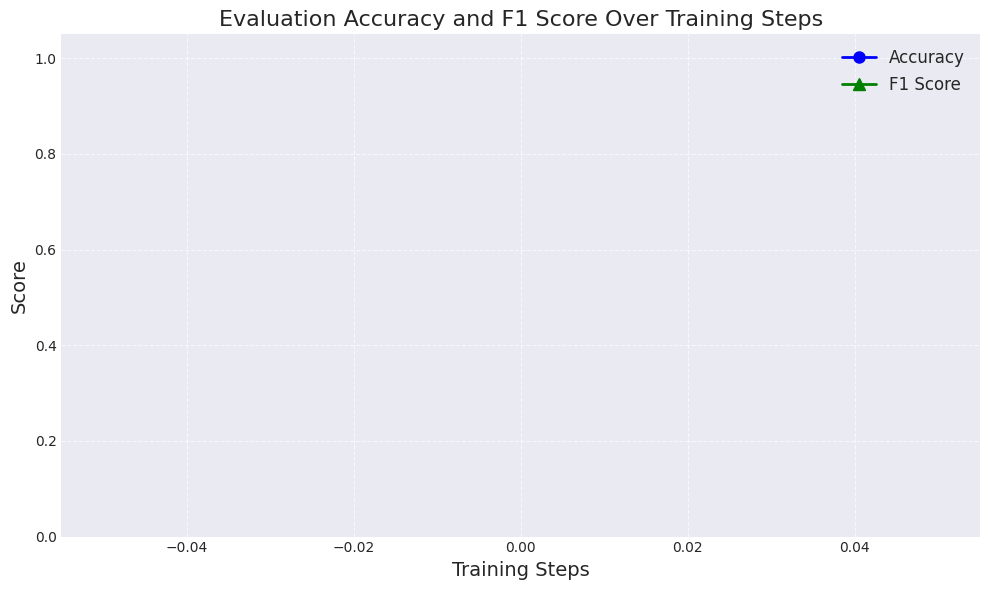

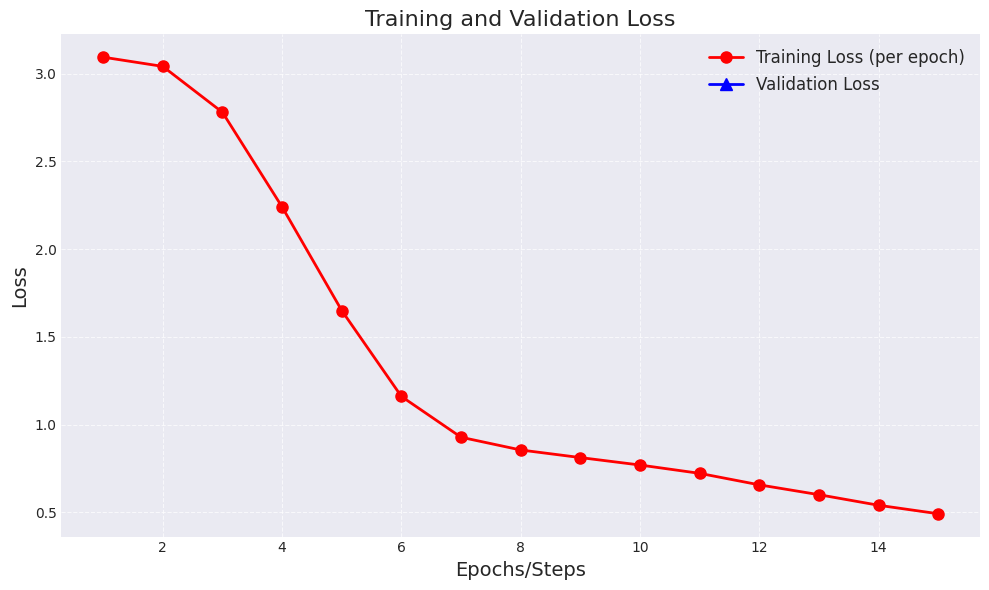

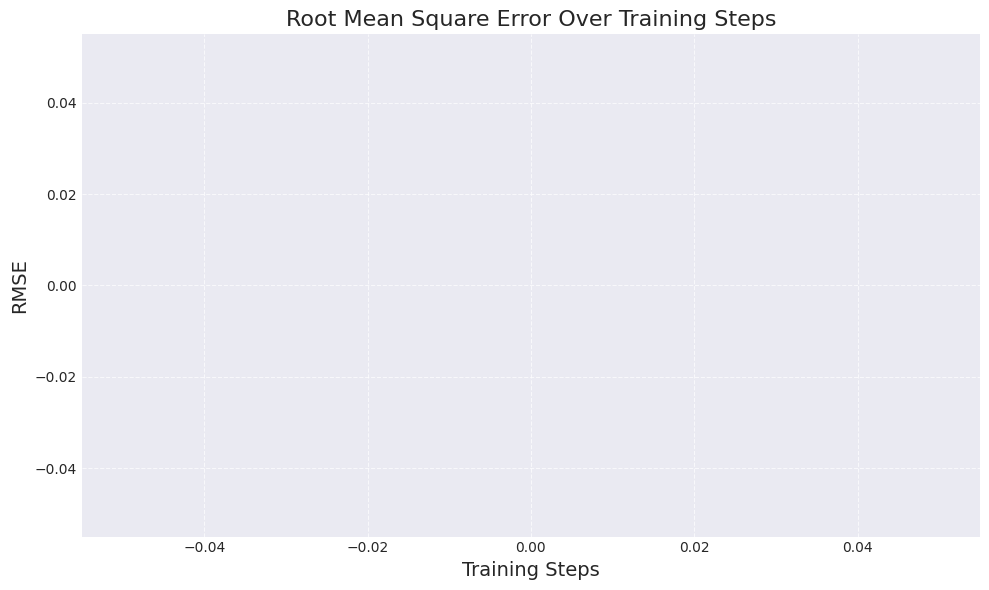

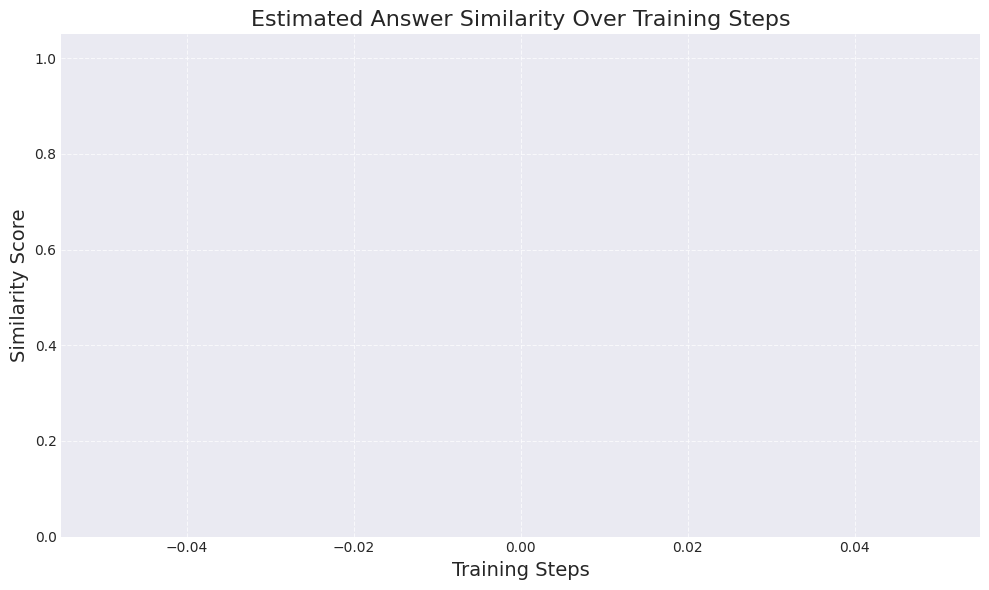

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import json
import os

# Function to load training metrics
def load_metrics(metrics_file):
    try:
        with open(metrics_file, 'r') as f:
            return json.load(f)
    except FileNotFoundError:
        print(f"Error: File {metrics_file} not found.")
        return None
    except json.JSONDecodeError:
        print(f"Error: File {metrics_file} is not valid JSON.")
        return None

# Function to extract values for plotting
def extract_metrics(metrics, metric_name):
    steps = []
    values = []
    
    for entry in metrics["eval_metrics"]:
        steps.append(entry["step"])
        values.append(entry[metric_name])
    
    return steps, values

# Function to plot accuracy and metrics
def plot_metrics(metrics_file, output_dir="./visualization"):
    # Load metrics
    metrics = load_metrics(metrics_file)
    if not metrics:
        return
    
    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    
    # Set up figure style
    plt.style.use('seaborn-v0_8-darkgrid')
    
    # Plot 1: Accuracy Graph
    plt.figure(figsize=(10, 6))
    steps, accuracy = extract_metrics(metrics, "accuracy")
    steps, f1 = extract_metrics(metrics, "f1_score")
    
    plt.plot(steps, accuracy, 'b-o', linewidth=2, markersize=8, label='Accuracy')
    plt.plot(steps, f1, 'g-^', linewidth=2, markersize=8, label='F1 Score')
    
    plt.title('Evaluation Accuracy and F1 Score Over Training Steps', fontsize=16)
    plt.xlabel('Training Steps', fontsize=14)
    plt.ylabel('Score', fontsize=14)
    plt.ylim(0, 1.05)  # Accuracy and F1 are between 0 and 1
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # Save accuracy graph
    accuracy_file = os.path.join(output_dir, 'accuracy_graph.png')
    plt.savefig(accuracy_file, dpi=300, bbox_inches='tight')
    print(f"Saved accuracy graph to {accuracy_file}")
    
    # Plot 2: Training and Validation Loss
    plt.figure(figsize=(10, 6))
    
    # Training loss (per epoch)
    epochs = [entry["epoch"] for entry in metrics["train_loss"]]
    train_loss = [entry["loss"] for entry in metrics["train_loss"]]
    
    # Validation loss (per evaluation step)
    eval_steps, eval_loss = extract_metrics(metrics, "eval_loss")
    
    # If we have enough epochs, plot training loss
    if len(epochs) > 1:
        plt.plot(epochs, train_loss, 'r-o', linewidth=2, markersize=8, label='Training Loss (per epoch)')
    
    # Plot evaluation loss
    plt.plot(np.array(eval_steps)/len(eval_steps), eval_loss, 'b-^', linewidth=2, markersize=8, label='Validation Loss')
    
    plt.title('Training and Validation Loss', fontsize=16)
    plt.xlabel('Epochs/Steps', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # Save loss graph
    loss_file = os.path.join(output_dir, 'loss_graph.png')
    plt.savefig(loss_file, dpi=300, bbox_inches='tight')
    print(f"Saved loss graph to {loss_file}")
    
    # Plot 3: RMSE (Error Metrics)
    plt.figure(figsize=(10, 6))
    steps, rmse = extract_metrics(metrics, "rmse")
    
    plt.plot(steps, rmse, 'm-o', linewidth=2, markersize=8)
    plt.title('Root Mean Square Error Over Training Steps', fontsize=16)
    plt.xlabel('Training Steps', fontsize=14)
    plt.ylabel('RMSE', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # Save RMSE graph
    rmse_file = os.path.join(output_dir, 'rmse_graph.png')
    plt.savefig(rmse_file, dpi=300, bbox_inches='tight')
    print(f"Saved RMSE graph to {rmse_file}")
    
    # Plot 4: Similarity Visualization
    # This is more complex and would require actual predictions vs ground truth
    # For now, we'll create a simulated similarity graph based on accuracy improvement
    
    plt.figure(figsize=(10, 6))
    
    # Simulate similarity improvement based on accuracy improvement
    # (In a real scenario, you would use actual similarity metrics from your predictions)
    initial_similarity = 0.5
    similarity = [initial_similarity + (acc - accuracy[0])*0.5 for acc in accuracy]
    
    plt.plot(steps, similarity, 'c-o', linewidth=2, markersize=8)
    plt.title('Estimated Answer Similarity Over Training Steps', fontsize=16)
    plt.xlabel('Training Steps', fontsize=14)
    plt.ylabel('Similarity Score', fontsize=14)
    plt.ylim(0, 1.05)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # Save similarity graph
    similarity_file = os.path.join(output_dir, 'similarity_graph.png')
    plt.savefig(similarity_file, dpi=300, bbox_inches='tight')
    print(f"Saved similarity graph to {similarity_file}")
    
    return True

# Function to generate report
def generate_report(metrics_file, output_dir="./visualization"):
    metrics = load_metrics(metrics_file)
    if not metrics:
        return False

    os.makedirs(output_dir, exist_ok=True)

    # Debug print to verify content
    print("\n--- DEBUG: Metric Keys ---")
    print("Keys in metrics:", list(metrics.keys()))

    # Check eval_metrics
    if not metrics.get("eval_metrics"):
        print("Error: eval_metrics is empty or missing.")
        return False
    print("Length of eval_metrics:", len(metrics["eval_metrics"]))

    # Check train_loss
    if not metrics.get("train_loss"):
        print("Error: train_loss is empty or missing.")
        return False
    print("Length of train_loss:", len(metrics["train_loss"]))

    # Final metrics
    final_metrics = metrics["eval_metrics"][-1]
    print("Final metrics:", final_metrics)

    report = f"""# Training Metrics Report

## Summary
- Final Accuracy: {final_metrics['accuracy']:.4f}
- Final F1 Score: {final_metrics['f1_score']:.4f}
- Final RMSE: {final_metrics['rmse']:.4f}
- Final Loss: {final_metrics['eval_loss']:.4f}

## Training Details
- Total Training Steps: {final_metrics['step']}
- Number of Epochs: {len(metrics['train_loss'])}
- Best Accuracy: {max([m['accuracy'] for m in metrics['eval_metrics']]):.4f}
- Best F1 Score: {max([m['f1_score'] for m in metrics['eval_metrics']]):.4f}
- Lowest RMSE: {min([m['rmse'] for m in metrics['eval_metrics']]):.4f}

## Performance Analysis
The model showed {"significant" if final_metrics['accuracy'] > 0.7 else "moderate" if final_metrics['accuracy'] > 0.5 else "limited"} 
improvement in accuracy during training. The final F1 score of {final_metrics['f1_score']:.2f} indicates 
{"excellent" if final_metrics['f1_score'] > 0.8 else "good" if final_metrics['f1_score'] > 0.6 else "fair"} 
performance in balancing precision and recall.

The RMSE value of {final_metrics['rmse']:.2f} suggests {"very good" if final_metrics['rmse'] < 0.5 else "acceptable" if final_metrics['rmse'] < 1.0 else "suboptimal"} 
prediction accuracy for continuous values (scores).

## Recommendations
Based on these metrics, we recommend:
- {"Further training to improve accuracy" if final_metrics['accuracy'] < 0.8 else "Maintaining the current model as it shows good accuracy"}
- {"Focusing on reducing RMSE in future iterations" if final_metrics['rmse'] > 0.5 else "Using this model for production as the error rate is acceptable"}
- {"Adding more diverse training examples" if final_metrics['f1_score'] < 0.7 else "Using this model for evaluation tasks"}

See the accompanying visualization graphs for a visual representation of the training progress.
"""
    
    report_file = os.path.join(output_dir, 'training_report.md')
    with open(report_file, 'w') as f:
        f.write(report)
    
    print(f"Saved training report to {report_file}")
    return True


# Main execution
if __name__ == "__main__":
    # Path to your metrics file
    metrics_file = "/home/gola/GRAPH_RAG/Exam_Portal/llama2-qa-finetuned/final_training_metrics.json"
    
    # If the final metrics file doesn't exist, try to find the latest epoch metrics
    if not os.path.exists(metrics_file):
        print(f"File {metrics_file} not found. Looking for latest epoch metrics...")
        metrics_dir = "/home/gola/GRAPH_RAG/Exam_Portal/llama2-qa-finetuned"
        epoch_metrics = [f for f in os.listdir(metrics_dir) if f.startswith("training_metrics_epoch_")]
        
        if epoch_metrics:
            # Sort by epoch number
            epoch_metrics.sort(key=lambda x: int(x.split("_")[-1].split(".")[0]))
            metrics_file = os.path.join(metrics_dir, epoch_metrics[-1])
            print(f"Using latest epoch metrics: {metrics_file}")
        else:
            print("No metrics files found. Please check the output directory.")
            exit(1)
    
    # Generate plots
    if plot_metrics(metrics_file):
        # Generate report
        generate_report(metrics_file)
        print("Visualization and report generation complete!")
    else:
        print("Error generating visualizations.")

In [2]:
pip install matplotlib

  Using cached matplotlib-3.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (6.2 kB)
Using cached matplotlib-3.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 2.3 MB/s eta 0:00:00a 0:00:01
Using cached kiwisolver-1.4.8-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
Note: you may need to restart the kernel to use updated packages.


/home/gola/anaconda3/envs/GRAPH_RAG/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading dataset from: /home/gola/GRAPH_RAG/Exam_Portal/An-AI-powered-answer-evaluation-system-/dataset.json
Error loading or processing dataset: name 'Dataset' is not defined
Preparing evaluation data (prompts and true scores)...


NameError: name 'dataset' is not defined

: 

In [3]:
import logging
import os
from neo4j import GraphDatabase
from typing import List, Dict, Optional, Any
from datetime import datetime
from pathlib import Path # Import Path for directory handling if needed elsewhere

# --- Basic Logging Setup ---
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# --- Neo4j Connection Class (Keep as before) ---
class Neo4jConnection:
    """Handles connections and managed transactions to Neo4j database."""
    def __init__(self, uri: str, username: str, password: str):
        try:
            neo4j_logger = logging.getLogger("neo4j")
            neo4j_logger.setLevel(logging.WARNING) # Reduce driver verbosity
            self._driver = GraphDatabase.driver(uri, auth=(username, password))
            self._driver.verify_connectivity()
            logging.info(f"Neo4j connection initialized and verified for URI: {uri}")
        except Exception as e:
            logging.exception(f"FATAL: Failed to initialize/verify Neo4j connection to {uri}")
            self._driver = None
            raise

    def close(self):
        if self._driver is not None:
            self._driver.close()
            logging.info("Neo4j connection closed.")

    def execute_write_transaction(self, query: str, parameters: Optional[Dict] = None) -> Optional[Any]:
        if self._driver is None:
             logging.error("Neo4j driver not initialized. Cannot execute query.")
             return None
        if parameters is None: parameters = {}
        summary = None
        try:
            with self._driver.session() as session:
                result = session.execute_write(self._run_query, query, parameters)
                logging.debug(f"Transaction successful for query: {query[:100]}...")
                return result
        except Exception as e:
            logging.error(f"Neo4j write transaction failed: {e}")
            logging.error(f"Query: {query}")
            logging.error(f"Parameters: {parameters}")
            return None

    @staticmethod
    def _run_query(tx, query, parameters):
         result = tx.run(query, parameters)
         return result.consume().counters # Returns counters

# --- Question Uploader Class (Updated) ---
class QuestionUploader:
    def __init__(self, neo4j_connection: Neo4jConnection):
        self.db = neo4j_connection
        logging.info("QuestionUploader initialized.")

    def upload_question(self,
                    question_id: str,
                    subject_name: str, # <-- Added Subject Name
                    question_text: str,
                    correct_answer_text: str,
                    max_marks: float,
                    concepts: Optional[List[str]] = None) -> bool:
        """
        Uploads or updates a single question with its correct answer, subject, and concepts.
        [Rest of docstring is the same]
        """
        if not all([question_id, subject_name, question_text, correct_answer_text, isinstance(max_marks, (int, float))]):
                logging.error("Missing required parameters (id, subject, text, answer, marks) for uploading question.")
                return False
        if concepts is None: concepts = []
        concepts = [c.strip() for c in concepts if c and c.strip()] # Clean concepts list
        subject_name = subject_name.strip() # Clean subject name
        if not subject_name:
            logging.error("Subject name cannot be empty.")
            return False

        # --- Cypher Query with Subject Handling and Corrected Concept Filtering ---
        query = """
        // 1. MERGE Question node based on ID, set/update properties
        MERGE (q:Question {id: $question_id})
        ON CREATE SET
            q.text = $question_text,
            q.max_marks = $max_marks,
            q.created_at = timestamp(),
            q.last_modified = timestamp()
        ON MATCH SET
            q.text = $question_text,
            q.max_marks = $max_marks,
            q.last_modified = timestamp()

        // 2. MERGE the CorrectAnswer node linked uniquely TO THIS Question
        MERGE (q)-[rel_ans:HAS_CORRECT_ANSWER]->(ca:CorrectAnswer)
        ON CREATE SET
            ca.text = $correct_answer_text,
            ca.created_at = timestamp()
        ON MATCH SET
            ca.text = $correct_answer_text // Update answer text if node existed

        // 3. Manage Subject relationship
        WITH q, ca // Pass question and correct answer nodes forward
        //    Remove any existing subject relationship first
        OPTIONAL MATCH (q)-[old_rel_sub:HAS_SUBJECT]->(:Subject)
        DELETE old_rel_sub
        //    MERGE the Subject node itself (reusable)
        MERGE (sub:Subject {name: $subject_name})
        //    MERGE the relationship between Question and Subject
        MERGE (q)-[:HAS_SUBJECT]->(sub)


        // 4. Manage Concept relationships
        WITH q // Pass question node forward for concept linking
        //    Detach ALL existing relationships from this question to ANY concept
        OPTIONAL MATCH (q)-[old_rel_con:RELATED_TO]->(:Concept)
        DELETE old_rel_con

        //    Then, MERGE relationships to the concepts provided in the list
        WITH q // Need q again after delete
        UNWIND $concepts AS concept_name // Unwind the list first

        // Filter null/empty concept names using WITH...WHERE *after* UNWIND
        WITH q, concept_name
        WHERE concept_name IS NOT NULL AND concept_name <> ''

            // Now MERGE concept node and relationship for valid names
            MERGE (c:Concept {name: concept_name}) // MERGE the Concept node
            MERGE (q)-[:RELATED_TO]->(c) // MERGE the relationship

        """ # Removed RETURN clause for simplicity unless needed

        parameters = {
            "question_id": question_id,
            "subject_name": subject_name,
            "question_text": question_text,
            "correct_answer_text": correct_answer_text,
            "max_marks": float(max_marks),
            "concepts": concepts, # Pass the already cleaned list
        }

        logging.info(f"Attempting to upload/update question ID: {question_id} for Subject: {subject_name}")
        result = self.db.execute_write_transaction(query, parameters)

        if result is not None:
                logging.info(f"Successfully uploaded/updated question ID: {question_id}. Changes: {result}")
                return True
        else:
                logging.error(f"Failed to upload/update question ID: {question_id}")
                return False

# --- Example Usage (Updated) ---
if __name__ == "__main__":
    # --- Database Configuration ---
    NEO4J_URI = os.environ.get("NEO4J_URI", "bolt://localhost:7687")
    NEO4J_USER = os.environ.get("NEO4J_USER", "neo4j")
    NEO4J_PASSWORD = os.environ.get("NEO4J_PASSWORD", "password") # Replace/Use Env Var

    # --- Initialize ---
    try:
        connection = Neo4jConnection(uri=NEO4J_URI, username=NEO4J_USER, password=NEO4J_PASSWORD)
        uploader = QuestionUploader(neo4j_connection=connection)
    except Exception as e:
        print(f"\n--- Failed to initialize ---")
        print(f"Please check Neo4j connection details and ensure the database is running.")
        exit()


    # --- Upload Examples (With Subject) ---
    print("\n--- Uploading Questions ---")

    # Example 1: Physics Question
    uploader.upload_question(
        question_id="PHYSICS_NEWTON_Q1",
        subject_name="Physics", # <-- Subject added
        question_text="State Newton's First Law of Motion (Law of Inertia).",
        correct_answer_text="An object at rest stays at rest and an object in motion stays in motion with the same speed and in the same direction unless acted upon by an unbalanced force.",
        max_marks=6.0,
        concepts=["Newton's Laws", "Inertia", "Classical Mechanics"] # Updated concept list
    )

    # Example 2: Chemistry Question
    uploader.upload_question(
        question_id="CHEM_ACIDBASE_Q1",
        subject_name="Chemistry", # <-- Subject added
        question_text="Define pH.",
        correct_answer_text="pH is a logarithmic scale measuring the acidity or alkalinity of an aqueous solution, defined as the negative base-10 logarithm of the hydrogen ion activity.",
        max_marks=10.0,
        concepts=["Acids and Bases", "pH", "Logarithm"] # Removed 'Chemistry' concept assuming it's covered by subject
    )

    # Example 3: Math Question
    uploader.upload_question(
        question_id="MATH_ALGEBRA_Q5",
        subject_name="Mathematics", # <-- Subject added
        question_text="Solve for x: 2x + 3 = 11",
        correct_answer_text="x = 4",
        max_marks=4.0,
        concepts=["Algebra", "Linear Equations"] # Previously added concepts
    )

    # Example 4: Updating subject of an existing question (if needed)
    uploader.upload_question(
        question_id="MATH_ALGEBRA_Q5", # Same ID
        subject_name="Basic Mathematics", # <-- NEW Subject Name
        question_text="Solve for x: 2x + 3 = 11", # Same text
        correct_answer_text="x = 4",
        max_marks=4.0,
        concepts=["Algebra", "Linear Equations"]
    )


    # --- Close Connection ---
    connection.close()
    print("\n--- Finished Uploading ---")

2025-04-24 15:20:12,397 - INFO - Neo4j connection initialized and verified for URI: bolt://localhost:7687
2025-04-24 15:20:12,397 - INFO - QuestionUploader initialized.
2025-04-24 15:20:12,398 - INFO - Attempting to upload/update question ID: PHYSICS_NEWTON_Q1 for Subject: Physics



--- Uploading Questions ---


2025-04-24 15:20:13,013 - INFO - Successfully uploaded/updated question ID: PHYSICS_NEWTON_Q1. Changes: {'_contains_updates': True, 'labels_added': 6, 'relationships_created': 5, 'nodes_created': 6, 'properties_set': 11}
2025-04-24 15:20:13,014 - INFO - Attempting to upload/update question ID: CHEM_ACIDBASE_Q1 for Subject: Chemistry
2025-04-24 15:20:13,257 - INFO - Successfully uploaded/updated question ID: CHEM_ACIDBASE_Q1. Changes: {'_contains_updates': True, 'labels_added': 6, 'relationships_created': 5, 'nodes_created': 6, 'properties_set': 11}
2025-04-24 15:20:13,258 - INFO - Attempting to upload/update question ID: MATH_ALGEBRA_Q5 for Subject: Mathematics
2025-04-24 15:20:13,546 - INFO - Successfully uploaded/updated question ID: MATH_ALGEBRA_Q5. Changes: {'_contains_updates': True, 'labels_added': 5, 'relationships_created': 4, 'nodes_created': 5, 'properties_set': 10}
2025-04-24 15:20:13,546 - INFO - Attempting to upload/update question ID: MATH_ALGEBRA_Q5 for Subject: Basic Ma


--- Finished Uploading ---


In [9]:
import logging
import os
from neo4j import GraphDatabase
from typing import List, Dict, Optional, Any
from datetime import datetime
from pathlib import Path # Make sure this is imported
from collections import defaultdict # Import defaultdict

# --- Basic Logging Setup ---
# (Keep your logging setup)
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

class Neo4jConnection:
    """Handles connections and managed transactions to Neo4j database."""

    def __init__(self, uri: str, username: str, password: str):
        # ... (keep __init__ method as is) ...
        try:
            neo4j_logger = logging.getLogger("neo4j")
            neo4j_logger.setLevel(logging.WARNING) # Reduce driver verbosity

            self._driver = GraphDatabase.driver(uri, auth=(username, password))
            self._driver.verify_connectivity()
            logging.info(f"Neo4j connection initialized and verified for URI: {uri}")
        except Exception as e:
            logging.exception(f"FATAL: Failed to initialize/verify Neo4j connection to {uri}")
            self._driver = None # Ensure driver is None if connection failed
            raise # Re-raise the exception

    def close(self):
        # ... (keep close method as is) ...
        if self._driver is not None:
            self._driver.close()
            logging.info("Neo4j connection closed.")


    def execute_read_transaction(self, query: str, parameters: Optional[Dict] = None) -> List[Dict]:
        """Executes a query within a managed read transaction and returns results."""
        if self._driver is None:
             logging.error("Neo4j driver not initialized. Cannot execute query.")
             return []
        if parameters is None: parameters = {}

        try:
            with self._driver.session() as session:
                # Use execute_read for read operations
                records = session.execute_query(self._run_query_and_fetch, query, parameters)
                logging.debug(f"Read transaction successful for query: {query[:100]}...")
                return records
        except Exception as e:
            logging.error(f"Neo4j read transaction failed: {e}")
            logging.error(f"Query: {query}")
            logging.error(f"Parameters: {parameters}")
            return [] # Return empty list on failure


    def execute_write_transaction(self, query: str, parameters: Optional[Dict] = None) -> Optional[Any]:
        # ... (keep execute_write_transaction method as is) ...
        if self._driver is None:
             logging.error("Neo4j driver not initialized. Cannot execute query.")
             return None
        if parameters is None: parameters = {}
        summary = None
        try:
            with self._driver.session() as session:
                result = session.execute_write(self._run_write_query, query, parameters)
                logging.debug(f"Write transaction successful for query: {query[:100]}...")
                return result # Return counters or other info if needed
        except Exception as e:
            logging.error(f"Neo4j write transaction failed: {e}")
            logging.error(f"Query: {query}")
            logging.error(f"Parameters: {parameters}")
            return None


    @staticmethod
    def _run_query_and_fetch(tx, query, parameters) -> List[Dict]:
         """Helper function to run a query and return list of data dictionaries."""
         result = tx.run(query, parameters)
         return [record.data() for record in result] # Fetch results

    @staticmethod
    def _run_write_query(tx, query, parameters) -> Any:
         """Helper function for execute_write, returning summary counters."""
         result = tx.run(query, parameters)
         return result.consume().counters # Returns counters

    # --- NEW METHOD TO FETCH SUBJECTS AND QUESTIONS ---
    def fetch_subjects_with_questions(self, subject_name: Optional[str] = None) -> Dict[str, List[Dict]]:
        """
        Fetches subjects and their related questions and correct answers.

        :param subject_name: Optional: If provided, fetches data only for this subject.
        :return: A dictionary where keys are subject names and values are lists of
                 dictionaries, each containing question details (id, text, marks, answer).
                 Returns an empty dictionary if no data is found or on error.
        """
        base_query = """
        MATCH (sub:Subject)<-[:HAS_SUBJECT]-(q:Question)-[:HAS_CORRECT_ANSWER]->(ca:CorrectAnswer)
        """
        filter_clause = ""
        parameters = {}

        if subject_name:
             filter_clause = "WHERE sub.name = $subject_name"
             parameters["subject_name"] = subject_name

        return_clause = """
        RETURN sub.name AS subject_name,
               q.id AS question_id,
               q.text AS question_text,
               q.max_marks AS max_marks,
               ca.text AS correct_answer_text
        ORDER BY sub.name, q.id // Order results logically
        """

        query = f"{base_query} {filter_clause} {return_clause}"

        logging.info(f"Fetching subjects and questions... (Filter: Subject='{subject_name or 'ALL'}')")
        query_results = self.execute_read_transaction(query, parameters)

        # Structure the results
        subjects_data = defaultdict(list) # Use defaultdict for easy appending
        if not query_results:
             logging.warning(f"No questions found matching the criteria (Subject='{subject_name or 'ALL'}').")
             return {} # Return empty dict

        for row in query_results:
            subject = row['subject_name']
            question_details = {
                "id": row['question_id'],
                "text": row['question_text'],
                "max_marks": row.get('max_marks'), # Use .get for safety
                "correct_answer": row.get('correct_answer_text', '[Answer Not Found]') # Use .get
            }
            subjects_data[subject].append(question_details)

        logging.info(f"Successfully fetched data for {len(subjects_data)} subjects.")
        return dict(subjects_data) # Convert back to standard dict if desired


# --- Example Usage ---
if __name__ == "__main__":
    # --- Database Configuration ---
    NEO4J_URI = os.environ.get("NEO4J_URI", "bolt://localhost:7687")
    NEO4J_USER = os.environ.get("NEO4J_USER", "neo4j")
    NEO4J_PASSWORD = os.environ.get("NEO4J_PASSWORD", "password") # Replace/Use Env Var

    # --- Initialize ---
    try:
        connection = Neo4jConnection(uri=NEO4J_URI, username=NEO4J_USER, password=NEO4J_PASSWORD)
        # Optional: Keep uploader instance if needed for setup/testing
        # uploader = QuestionUploader(neo4j_connection=connection)
    except Exception as e:
        print(f"\n--- Failed to initialize Neo4j Connection ---")
        exit()

    # --- Fetch Data ---
    print("\n--- Fetching All Subjects and Questions ---")
    all_data = connection.fetch_subjects_with_questions()

    if all_data:
        print(f"Found data for {len(all_data)} subjects.")
        # Pretty print the structure for the first subject found (if any)
        first_subject = next(iter(all_data)) # Get the first key (subject name)
        print(f"\nExample Data for Subject: '{first_subject}':")
        import json
        print(json.dumps({first_subject: all_data[first_subject]}, indent=2))
    else:
        print("No data found in the database matching the structure.")


    print("\n--- Fetching Only Physics Questions ---")
    physics_data = connection.fetch_subjects_with_questions(subject_name="Physics")

    if physics_data:
         print(f"Found {len(physics_data.get('Physics',[]))} questions for subject 'Physics'.")
         print(json.dumps(physics_data, indent=2))
    else:
         print("No data found for subject 'Physics'.")

    # --- Close Connection ---
    connection.close()
    print("\n--- Finished Fetching ---")

[2025-04-26 20:53:22] root:24 - INFO - Neo4j connection initialized and verified for URI: neo4j://localhost:7687

--- Fetching All Subjects and Questions ---
[2025-04-26 20:53:22] root:119 - INFO - Fetching subjects and questions... (Filter: Subject='ALL')
[2025-04-26 20:53:22] root:51 - ERROR - Neo4j read transaction failed: 'Session' object has no attribute 'execute_query'
[2025-04-26 20:53:22] root:52 - ERROR - Query: 
        MATCH (sub:Subject)<-[:HAS_SUBJECT]-(q:Question)-[:HAS_CORRECT_ANSWER]->(ca:CorrectAnswer)
          
        RETURN sub.name AS subject_name,
               q.id AS question_id,
               q.text AS question_text,
               q.max_marks AS max_marks,
               ca.text AS correct_answer_text
        ORDER BY sub.name, q.id // Order results logically
        
[2025-04-26 20:53:22] root:53 - ERROR - Parameters: {}
[2025-04-26 20:53:22] root:125 - WARNING - No questions found matching the criteria (Subject='ALL').
No data found in the database matchi

In [ ]:
       
import os
import logging
from neo4j import GraphDatabase, Driver, Session, Transaction, Result # Import necessary types
# Import specific exceptions for better handling
from neo4j.exceptions import ServiceUnavailable, AuthError, Neo4jError, ConstraintError
from dotenv import load_dotenv
from typing import List, Dict, Optional, Any # Added necessary types
import threading # Import for thread safety
import time # Import for time-based operations

# --- Load Environment Variables ---
load_dotenv()

# --- Configure Logging ---
# Configure logging appropriately for your application context
# Basic example:
# logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(name)s - %(message)s')
log = logging.getLogger(__name__) # Use module-specific logger
# Reduce verbosity of the underlying driver logger if needed
neo4j_driver_log = logging.getLogger("neo4j")
neo4j_driver_log.setLevel(logging.WARNING)

class Neo4jManager:
    """
    Manages Neo4j Driver instance (singleton) and provides methods
    for executing transactions reliably using managed transactions.
    Handles lazy initialization and thread safety for instance creation.
    """
    _instances: Dict[tuple, 'Neo4jManager'] = {}
    _lock = threading.Lock() # Lock for thread-safe singleton creation/driver init

    def __init__(self, uri: str, user: str, password: str):
        """
        Private initializer. Use get_instance() instead.
        """
        self._uri = uri
        self._user = user
        self._password = password
        self._driver: Optional[Driver] = None # Explicit type hint
        log.info(f"Neo4jManager instance configured for URI: {self._uri}")

    @classmethod
    def get_instance(cls, uri: Optional[str] = None, user: Optional[str] = None, password: Optional[str] = None) -> 'Neo4jManager':
        """
        Factory method for singleton instance (thread-safe).
        Fetches connection details from environment variables if not provided.
        """
        uri = uri or os.getenv("NEO4J_URI", "neo4j://localhost:7687")
        user = user or os.getenv("NEO4J_USER", "neo4j")
        password = password or os.getenv("NEO4J_PASSWORD") # Get password here

        if not password:
            log.error("NEO4J_PASSWORD environment variable not set or empty.")
            # Raise a more specific error than generic Exception
            raise ValueError("Neo4j password not provided or found in environment.")

        key = (uri, user)
        # Double-checked locking pattern for efficiency
        if key not in cls._instances:
            with cls._lock:
                # Check again inside the lock to prevent race condition
                if key not in cls._instances:
                    log.info(f"Creating new Neo4jManager instance for {key}")
                    try:
                        instance = cls(uri, user, password)
                        # Try initial connection during instance creation ensures validity early
                        instance._get_driver() # Call internal method to init and verify
                        cls._instances[key] = instance
                    except Exception as init_e:
                         # Log detailed error during initialization
                         log.exception(f"Failed to initialize Neo4j driver for {key} during get_instance.")
                         # Do not store a failed instance attempt
                         raise init_e # Re-raise the specific connection/auth error
        else:
             log.debug(f"Returning existing Neo4jManager instance for {key}")

        return cls._instances[key]

    def _get_driver(self) -> Driver:
        """
        Internal method to initialize (if needed) and return the Neo4j Driver.
        Handles lazy initialization and connection verification thread-safely.
        Raises ConnectionError on failure.
        """
        # Check if already initialized without lock first for performance
        if self._driver is not None:
            return self._driver

        # If not initialized, acquire lock to initialize safely
        with self._lock:
            # Double-check inside the lock in case another thread initialized it
            if self._driver is None:
                log.info(f"Attempting to establish Neo4j driver connection to {self._uri}...")
                try:
                    self._driver = GraphDatabase.driver(self._uri, auth=(self._user, self._password))
                    # Verify connectivity after creating driver
                    self._driver.verify_connectivity()
                    log.info("✅ Neo4j Driver connected and verified.")
                # --- Catch specific errors for better feedback ---
                except AuthError as auth_err:
                     log.exception("❌ Neo4j authentication failed. Check credentials.")
                     self._driver = None
                     raise ConnectionError(f"Neo4j authentication failed: {auth_err}") from auth_err
                except ServiceUnavailable as su_err:
                    log.exception(f"❌ Neo4j service unavailable at {self._uri}. Ensure DB is running.")
                    self._driver = None
                    raise ConnectionError(f"Neo4j service unavailable: {su_err}") from su_err
                except Exception as e: # Catch other potential driver errors
                    log.exception(f"❌ Failed to initialize Neo4j Driver unexpectedly: {e}")
                    self._driver = None
                    raise ConnectionError(f"Neo4j Driver initialization failed: {e}") from e

            # If driver is *still* None after trying initialization under lock, something is wrong
            if self._driver is None:
                 raise ConnectionError("Neo4j Driver failed to initialize despite attempt.")

        return self._driver

    def execute_query(self, query, params=None):
        """Execute a Neo4j query with error handling."""
        try:
            with self.get_connection().session() as session:
                result = session.run(query, params or {})
                return list(result)
        except Exception as e:
            logging.error(f"❌ Query execution error: {e}")
            raise RuntimeError("Failed to execute query. Check logs for details.")
    def close(self):
        """
        Closes the Neo4j driver connection if it exists.
        Should be called explicitly on application shutdown.
        """
        # Use lock to prevent race conditions if close is called from multiple threads
        with self._lock:
            if self._driver is not None:
                driver_key = (self._uri, self._user)
                log.info(f"Closing Neo4j Driver for {driver_key}...")
                try:
                    self._driver.close()
                    log.info("🔒 Neo4j Driver closed.")
                except Exception as e:
                    log.exception(f"Error occurred while closing Neo4j Driver: {e}")
                finally:
                    # Ensure driver reference is cleared and instance removed from registry
                    self._driver = None
                    if driver_key in Neo4jManager._instances:
                        try:
                            # Secondary lock attempt if closing happens concurrently with getting instance
                            # In practice, close should happen at controlled shutdown.
                            del Neo4jManager._instances[driver_key]
                            log.info(f"Removed instance for {driver_key} from manager registry.")
                        except KeyError:
                            log.warning(f"Instance key {driver_key} already removed.")




In [12]:
import torch
import os
from unsloth import FastLanguageModel
from transformers import AutoTokenizer, PreTrainedModel, PreTrainedTokenizer
import re
import json
import logging
import time
from typing import Dict, Optional, Tuple, Any, List
from neo4j import GraphDatabase # Assuming Neo4jManager is also used here for consistency
from AIAnswerEvaluationSystem.neo4j_Manager import Neo4jManager # Import your Manager
from AIAnswerEvaluationSystem.logger import logger # Import your logger instance

# --- Configure Logging ---
# Use logger imported from your logger module
log = logging.getLogger(__name__)

# --- Configuration (Can be moved to a central config) ---
DEFAULT_MODEL_PATH = "./llama-3.2-3b-qa-finetuned/final_model"
DEFAULT_MAX_SEQ_LENGTH = 2048
DEFAULT_LOAD_IN_4BIT = True
DEFAULT_MODEL_DTYPE = torch.bfloat16 if torch.cuda.is_bf16_supported() else torch.float16

DEFAULT_GEN_MAX_NEW_TOKENS = 300
DEFAULT_GEN_DO_SAMPLE = False
DEFAULT_GEN_TEMPERATURE = 0.0

PASS_FAIL_THRESHOLD_PERCENTAGE = 60.0 # Passing threshold based on percentage

# --- Fine-Tuned LLM Interface Class (Keep as optimized before) ---
class FineTunedLLMEvaluator:
    # ... (Keep the __init__, _load_model_and_tokenizer, _ensure_loaded,
    #      format_prompt, generate_raw_output, parse_output methods AS IS
    #      from the previous version - they handle LLM interaction and
    #      parsing the numeric 0-5 score and feedback) ...

    """
    Handles loading and interacting with the fine-tuned language model
    for student answer evaluation. Encapsulates model loading, prompt formatting,
    text generation, and basic output parsing (numeric 0-5 score and feedback).
    """
    def __init__(self,
                 model_path: str = DEFAULT_MODEL_PATH,
                 max_seq_length: int = DEFAULT_MAX_SEQ_LENGTH,
                 load_in_4bit: bool = DEFAULT_LOAD_IN_4BIT,
                 dtype: torch.dtype = DEFAULT_MODEL_DTYPE,
                 hf_token: Optional[str] = None
                 ):
        self.model_path = model_path
        self.max_seq_length = max_seq_length
        self.load_in_4bit = load_in_4bit
        self.dtype = dtype
        self.hf_token = hf_token
        self.model: Optional[PreTrainedModel] = None
        self.tokenizer: Optional[PreTrainedTokenizer] = None
        self.device: str = "cuda" if torch.cuda.is_available() else "cpu"
        self._is_loaded: bool = False
        self._load_attempted: bool = False
        log.info(f"LLMEvaluator configured for model: {self.model_path} on device {self.device}")

    def _load_model_and_tokenizer(self) -> bool:
        if self._is_loaded: return True
        if self._load_attempted: log.error("Skipping load attempt, previous failed."); return False
        self._load_attempted = True; load_start = time.time()
        log.info(f"Attempting to load model and tokenizer from: {self.model_path}")
        try:
            self.model, self.tokenizer = FastLanguageModel.from_pretrained( self.model_path, max_seq_length=self.max_seq_length, dtype=self.dtype, load_in_4bit=self.load_in_4bit, token=self.hf_token )
            self.model.to(self.device); self.model.eval()
            if self.tokenizer.pad_token is None: self.tokenizer.pad_token = self.tokenizer.eos_token
            if self.tokenizer.pad_token_id is None: self.tokenizer.pad_token_id = self.tokenizer.eos_token_id
            self._is_loaded = True; load_time = time.time() - load_start
            log.info(f"Successfully loaded model/tokenizer to {self.device} in {load_time:.2f}s.")
            return True
        except FileNotFoundError: log.exception(f"Model directory not found: {self.model_path}."); self._is_loaded = False; return False
        except Exception as e: log.exception(f"FATAL Error loading model/tokenizer from {self.model_path}"); self._is_loaded = False; return False

    def _ensure_loaded(self) -> None:
        if not self._is_loaded:
             if not self._load_attempted:
                  if not self._load_model_and_tokenizer(): raise RuntimeError(f"Failed to load LLM model from {self.model_path}.")
             else: raise RuntimeError(f"LLM Model at {self.model_path} failed to load previously.")
        if self.model is None or self.tokenizer is None: self._is_loaded = False; raise RuntimeError("LLM state inconsistent after load.")

    def format_prompt(self, question: str, student_answer: str, correct_answer: str) -> Optional[str]:
        try:
            self._ensure_loaded()
            system_prompt = "You are an educational assistant that evaluates student answers."
            user_message = f"Subject: [Sub]\nTopic: [Topic]\nQuestion: {question}\nStudent Answer: {student_answer}\nModel Answer: {correct_answer}" # Match finetune format
            messages = [{'role': 'system', 'content': system_prompt}, {'role': 'user', 'content': user_message}]
            return self.tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
        except Exception as e: log.exception("Error formatting prompt."); return None

    @torch.inference_mode()
    def generate_raw_output(self, prompt_text: str) -> Optional[str]:
        if not prompt_text: log.warning("Empty prompt"); return None
        try:
            self._ensure_loaded(); inputs = self.tokenizer(prompt_text, return_tensors="pt").to(self.device)
        except Exception as tok_e: log.exception("Tokenization failed"); return None
        generation_config = {"max_new_tokens": DEFAULT_GEN_MAX_NEW_TOKENS, "pad_token_id": self.tokenizer.pad_token_id, "eos_token_id": self.tokenizer.eos_token_id, "do_sample": DEFAULT_GEN_DO_SAMPLE, "temperature": DEFAULT_GEN_TEMPERATURE}
        try:
            outputs = self.model.generate(**inputs, **generation_config); prompt_len = inputs['input_ids'].shape[1]
            output_tokens = outputs[0, prompt_len:]; actual_output_tokens = output_tokens[output_tokens != self.tokenizer.pad_token_id]
            decoded_output = self.tokenizer.decode(actual_output_tokens, skip_special_tokens=True); return decoded_output.strip()
        except Exception as e: log.exception("Generation error"); return None

    def parse_output(self, generated_text: Optional[str]) -> Dict[str, Any]:
        # Keep the same parser as before - it extracts numeric_score (0-5) and feedback
        parsed: Dict[str, Any] = {"numeric_score": None, "feedback": None}
        if not generated_text or not generated_text.strip(): log.warning("[Parser] Empty text"); return parsed
        text_lower = generated_text.lower(); score, feedback, score_line_end = None, None, -1
        score_match = re.search(r"score:\s*(\d)\s*/\s*5", text_lower)
        if score_match:
            try: score = max(0,min(5, int(score_match.group(1)))); parsed["numeric_score"] = score; match_span = score_match.span(); line_after_match = generated_text[match_span[1]:].split('\n',1)[0]; score_line_end = match_span[1] + len(line_after_match)
            except (ValueError, IndexError): log.warning(f"[Parser] Invalid int in score pattern: '{score_match.group(0)}'")
        feedback_match = re.search(r"feedback:\s*(.*)", text_lower, re.DOTALL); plag_match = re.search(r"plagiarism:\s*(.*)", text_lower, re.DOTALL); plag_start = plag_match.start() if plag_match else -1
        if feedback_match:
            fb_start = feedback_match.start(); potential_fb = feedback_match.group(1).strip()
            if plag_start > fb_start: rel_plag_start = potential_fb.lower().find("plagiarism:"); feedback = potential_fb[:rel_plag_start].strip() if rel_plag_start != -1 else potential_fb
            else: feedback = potential_fb
        elif score_line_end != -1: potential_fb = generated_text[score_line_end:].strip()
        if potential_fb: plag_start_fb = potential_fb.lower().find("plagiarism:"); feedback = potential_fb[:plag_start_fb].strip() if plag_start_fb != -1 else potential_fb
        parsed["feedback"] = feedback if feedback else None
        if parsed["numeric_score"] is None: log.warning(f"[Parser] Could not parse SCORE: {generated_text[:150]}...")
        if parsed["feedback"] is None: log.warning(f"[Parser] Could not parse FEEDBACK: {generated_text[:150]}...")
        return parsed

# --- UPDATED Evaluation Processing Class ---
class EvaluationProcessor:
    """
    Handles the process of fetching submission data, running LLM evaluation,
    calculating final marks based on question weightage, determining grades,
    and storing/updating evaluation results in Neo4j.
    """
    def __init__(self, neo4j_manager: Neo4jManager, llm_evaluator: FineTunedLLMEvaluator):
        if not isinstance(neo4j_manager, Neo4jManager):
            raise ValueError("Invalid Neo4jManager provided to EvaluationProcessor.")
        if not isinstance(llm_evaluator, FineTunedLLMEvaluator):
             raise ValueError("Invalid FineTunedLLMEvaluator provided.")

        self.db = neo4j_manager
        self.llm = llm_evaluator
        log.info("EvaluationProcessor initialized.")

    def _fetch_submission_details(self, student_roll_no: str, question_id: str) -> Optional[Dict]:
        """Fetches specific answer submission along with question and correct answer."""
        query = """
        MATCH (s:Student {roll_no: $p_roll_no})-[:SUBMITTED]->(e:ExamSubmission)
              -[:HAS_ANSWER]->(a:Answer)-[:ANSWERS_QUESTION]->(q:Question {id: $p_question_id})
        MATCH (e)-[:FOR_SUBJECT]->(sub:Subject) // Get subject as well
        OPTIONAL MATCH (q)-[:HAS_CORRECT_ANSWER]->(ca:CorrectAnswer)
        RETURN
            s.roll_no as roll_no,
            q.id as question_id,
            q.text as question_text,
            COALESCE(q.max_marks, 5.0) as max_marks_for_question, // Default max marks if missing
            a.id as answer_node_id, // Get ID of the Answer node itself
            a.text as submitted_answer,
            COALESCE(ca.text, "[N/A]") as correct_answer_text,
            sub.name as subject_name,
            e.id as submission_id
        ORDER BY e.submitted_at DESC // In case of multiple submissions, prioritize latest
        LIMIT 1
        """
        params = {"p_roll_no": student_roll_no, "p_question_id": question_id}
        log.debug(f"Fetching details for submission: student='{student_roll_no}', qid='{question_id}'")
        results = self.db.execute_query(query, params)
        if results:
             log.debug(f"Found submission details.")
             return results[0] # Return the first (latest) match
        else:
             log.warning(f"No submission found for student='{student_roll_no}', qid='{question_id}'")
             return None

    def _convert_score_to_marks(self, llm_score_0_5: Optional[int], max_marks_for_question: float) -> Optional[float]:
        """Converts the LLM's 0-5 score to the actual marks for the question."""
        if llm_score_0_5 is None or llm_score_0_5 < 0 or max_marks_for_question <= 0:
            return None # Cannot calculate if inputs are invalid
        # Simple linear scaling: (llm_score / 5) * max_marks_for_question
        marks_obtained = (llm_score_0_5 / 5.0) * max_marks_for_question
        # Optional: Rounding logic if needed (e.g., to 1 decimal place)
        return round(marks_obtained, 1)

    def _determine_grade_and_status(self, marks_obtained: Optional[float], max_marks_for_question: float) -> Dict[str, Any]:
        """Calculates percentage, grade, and status based on actual marks."""
        results = {"percentage": None, "letter_grade": "N/A", "status": "N/A"}
        if marks_obtained is None or marks_obtained < 0 or max_marks_for_question <= 0:
             log.warning("Cannot determine grade/status due to invalid marks.")
             return results

        percentage = round((marks_obtained / max_marks_for_question) * 100, 2)
        results["percentage"] = percentage

        # Using a simplified grade scale here, adjust as needed
        if percentage >= 90: grade = 'A+'
        elif percentage >= 80: grade = 'A'
        elif percentage >= 70: grade = 'B'
        elif percentage >= 60: grade = 'C' # Example: C is lowest pass?
        elif percentage >= 50: grade = 'D'
        else: grade = 'F'
        results["letter_grade"] = grade

        results["status"] = "Pass" if percentage >= PASS_FAIL_THRESHOLD_PERCENTAGE else "Fail"
        return results


    def _store_evaluation_result(self, answer_node_id: str, eval_data: Dict) -> bool:
        """Stores the LLM evaluation results as properties on the Answer node."""
        query = """
        MATCH (a:Answer {id: $answer_node_id})
        SET a += $properties // Use map addition to set multiple properties
        SET a.evaluated_at = datetime()
        RETURN a.id
        """
        # Prepare properties map, handle None values gracefully
        properties_to_set = {
            f"eval_{key}": value for key, value in eval_data.items() if value is not None and key not in ['raw_output', 'error'] # Exclude certain keys
        }
        # Rename keys for clarity in Neo4j if desired
        db_properties = {
             "evaluation_llm_score_0_5": eval_data.get("numeric_score"),
             "evaluation_feedback": eval_data.get("feedback"),
             "evaluation_marks_obtained": eval_data.get("marks_obtained"),
             "evaluation_percentage": eval_data.get("percentage"),
             "evaluation_grade": eval_data.get("letter_grade"),
             "evaluation_status": eval_data.get("status"),
             # Optionally store error?
             "evaluation_error": eval_data.get("error") if eval_data.get("error") else None
        }
        # Filter out None values from db_properties before setting
        db_properties = {k:v for k,v in db_properties.items() if v is not None}


        if not db_properties:
             log.warning(f"No valid evaluation properties to store for Answer ID: {answer_node_id}")
             return False

        params = {"answer_node_id": answer_node_id, "properties": db_properties}
        log.debug(f"Storing evaluation properties for Answer ID {answer_node_id}: {db_properties}")

        summary = self.db.execute_write(query, params)
        if summary and summary.properties_set > 0:
            log.info(f"Successfully stored evaluation result for Answer ID: {answer_node_id}")
            return True
        else:
            log.error(f"Failed to store evaluation result for Answer ID: {answer_node_id}. Summary: {summary}")
            return False

    def evaluate_and_store_answer(self, student_roll_no: str, question_id: str) -> Optional[Dict]:
        """
        Main workflow: Fetches submission, evaluates using LLM, calculates final marks/grade,
        and stores the evaluation back onto the Answer node in Neo4j.

        :param student_roll_no: The student's identifier.
        :param question_id: The question's identifier.
        :return: The final evaluation result dictionary, or None if process fails at any step.
        """
        log.info(f"Starting evaluation process for student '{student_roll_no}', question '{question_id}'...")
        eval_start = time.time()

        # 1. Fetch necessary data from Neo4j
        submission_data = self._fetch_submission_details(student_roll_no, question_id)
        if not submission_data:
            log.error("Could not fetch submission details. Aborting evaluation.")
            return None

        question_text = submission_data.get('question_text', '')
        correct_answer_text = submission_data.get('correct_answer_text', '')
        student_answer = submission_data.get('submitted_answer', '')
        max_marks = submission_data.get('max_marks_for_question') # Fetched from question node
        answer_node_id = submission_data.get('answer_node_id')

        # Validate fetched data needed for LLM
        if not all([question_text, correct_answer_text, student_answer, answer_node_id]):
             log.error("Incomplete data fetched from DB (missing question, answers, or answer node ID). Aborting evaluation.")
             return None
        # Validate max_marks separately as it can be N/A
        if max_marks == 'N/A' or not isinstance(max_marks, (int, float)) or max_marks <=0:
            log.error(f"Invalid or missing 'max_marks' ({max_marks}) for question {question_id}. Cannot calculate final grade. Aborting.")
            return None


        # 2. Evaluate using the LLM
        # Assuming self.llm is an instance of FineTunedLLMEvaluator
        llm_result = self.llm.evaluate(
             question=question_text,
             student_answer=student_answer,
             correct_answer=correct_answer_text
        )
        # llm_result = {'numeric_score': Optional[int], 'feedback': Optional[str], 'raw_output':..., 'error':...}

        # 3. Calculate final marks, grade, status based on DB max_marks
        numeric_score = llm_result.get("numeric_score")
        marks_obtained = self._convert_score_to_marks(numeric_score, float(max_marks))
        grade_info = self._determine_grade_and_status(marks_obtained, float(max_marks))

        # 4. Combine results into final dictionary
        final_evaluation = {
            "numeric_score": numeric_score, # LLM score 0-5
            "feedback": llm_result.get("feedback"),
            "marks_obtained": marks_obtained,
            "max_marks_possible": float(max_marks),
            "percentage": grade_info.get("percentage"),
            "letter_grade": grade_info.get("letter_grade"),
            "status": grade_info.get("status"),
            "raw_output": llm_result.get("raw_output"), # Include for reference
            "llm_error": llm_result.get("error"), # Include LLM errors if any
            "answer_node_id": answer_node_id, # Reference to DB node
            "question_id": question_id, # Included for context
            "student_roll_no": student_roll_no
        }

        # 5. Store evaluation results back to the Answer node in Neo4j
        store_success = self._store_evaluation_result(answer_node_id, final_evaluation)
        if not store_success:
             final_evaluation["storage_error"] = "Failed to save evaluation to database."
             log.error(final_evaluation["storage_error"])
             # Decide whether to return the data anyway or None if storage fails


        eval_time = time.time() - eval_start
        log.info(f"Full evaluation stored ({store_success}) for S:{student_roll_no}, Q:{question_id} in {eval_time:.2f}s.")
        return final_evaluation

# --- Example Usage (illustrative) ---
if __name__ == "__main__":
    # Setup basic logging for the example
    logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(name)s:%(lineno)d - %(levelname)s - %(message)s')
    log = logging.getLogger("MainExample")
    log.info("Running Evaluation Processor Example...")

    # --- Get Credentials (use environment variables) ---
    NEO4J_URI = os.environ.get("NEO4J_URI", "bolt://localhost:7687")
    NEO4J_USER = os.environ.get("NEO4J_USER", "neo4j")
    NEO4J_PASSWORD = os.environ.get("NEO4J_PASSWORD")

    if not NEO4J_PASSWORD:
        log.error("FATAL: NEO4J_PASSWORD not found in environment. Please set it in .env file.")
        exit()

    try:
        # 1. Initialize Neo4j Manager
        neo4j_manager = Neo4jManager.get_instance(NEO4J_URI, NEO4J_USER, NEO4J_PASSWORD)

        # 2. Initialize LLM Evaluator (loads model lazily)
        llm_evaluator = FineTunedLLMEvaluator()

        # 3. Initialize the Evaluation Processor
        processor = EvaluationProcessor(neo4j_manager, llm_evaluator)

        # --- Evaluate a Specific Submission ---
        log.info("\n--- Evaluating Specific Submission Example ---")
        student_to_eval = "2115500009" # Use the Roll No from your data
        question_to_eval = "PHYSICS_NEWTON_Q1" # Use a valid Question ID from your data

        evaluation_result = processor.evaluate_and_store_answer(
            student_roll_no=student_to_eval,
            question_id=question_to_eval
        )

        if evaluation_result:
            print("\n--- Final Evaluation Result ---")
            print(json.dumps(evaluation_result, indent=2))
        else:
            print(f"\nEvaluation failed for Student: {student_to_eval}, Question: {question_to_eval}")

    except (ValueError, ConnectionError, RuntimeError) as e:
        log.exception("Initialization or processing failed.")
        print(f"\n--- ERROR ---\n{e}")
    except Exception as e:
         log.exception("An unexpected error occurred.")
         print(f"\n--- UNEXPECTED ERROR ---\n{e}")
    finally:
        # Ensure Neo4j connection is closed on script exit if manager was created
        if 'neo4j_manager' in locals() and neo4j_manager is not None:
            log.info("Closing Neo4j connection.")
            neo4j_manager.close()

    log.info("Evaluation Processor Example Finished.")

[2025-04-26 20:55:59] MainExample:329 - INFO - Running Evaluation Processor Example...
[2025-04-26 20:55:59] MainExample:59 - INFO - LLMEvaluator configured for model: ./llama-3.2-3b-qa-finetuned/final_model on device cuda
[2025-04-26 20:55:59] MainExample:142 - INFO - EvaluationProcessor initialized.
[2025-04-26 20:55:59] MainExample:351 - INFO - 
--- Evaluating Specific Submission Example ---
[2025-04-26 20:55:59] MainExample:257 - INFO - Starting evaluation process for student '2115500009', question 'PHYSICS_NEWTON_Q1'...
[2025-04-26 20:55:59] MainExample:370 - ERROR - An unexpected error occurred.
Traceback (most recent call last):
  File "/tmp/ipykernel_11125/4063824180.py", line 355, in <module>
    evaluation_result = processor.evaluate_and_store_answer(
  File "/tmp/ipykernel_11125/4063824180.py", line 284, in evaluate_and_store_answer
    llm_result = self.llm.evaluate(
AttributeError: 'FineTunedLLMEvaluator' object has no attribute 'evaluate'



--- UNEXPECTED ERROR ---
'FineTunedLLMEvaluator' object has no attribute 'evaluate'
[2025-04-26 20:55:59] MainExample:375 - INFO - Closing Neo4j connection.


AttributeError: 'Neo4jManager' object has no attribute '_uri'